# Problem Statement: E-Commerce Data

The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.


# Data Dictionary

<b>CustomerID</b> - Unique customer ID<br> 
<b>Churn</b> - Churn Flag<br>  
<b>Tenure</b> - Tenure of customer in organization<br> 
<b>PreferredLoginDevice</b> - Preferred login device of customer<br>
<b>CityTier</b> - City tier<br>
<b>WarehouseToHome</b> - Distance in between warehouse to home of customer<br>
<b>PreferredPaymentMode</b> - Preferred payment method of customer<br> 
<b>Gender</b> - Gender of customer<br>
<b>HourSpendOnApp</b> - Number of hours spend on mobile application or website<br>
<b>NumberOfDeviceRegistered</b> - Total number of deceives is registered on particular customer<br> 
<b>PreferedOrderCat</b> - Preferred order category of customer in last month<br>  
<b>SatisfactionScore</b> - Satisfactory score of customer on service<br>
<b>MaritalStatus</b> - Marital status of customer<br>
<b>NumberOfAddress</b> - Total number of added added on particular customer<br>
<b>Complain</b> - Any complaint has been raised in last month<br>
<b>OrderAmountHikeFromlastYear</b> - Percentage increases in order from last year<br>
<b>CouponUsed</b> - Total number of coupon has been used in last month<br>
<b>OrderCount</b> - Total number of orders has been places in last month<br>
<b>DaySinceLastOrder</b> -Day Since last order by customer<br>
<b>CashbackAmount</b> - Average cashback in last month

### Load library and import data

In [1971]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import sweetviz as sv
import eli5
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve

import warnings
warnings.filterwarnings("ignore")

In [1972]:
churn=pd.read_excel("E_Commerce_Dataset.xlsx",sheet_name="E Comm")

### Inspect the data

In [1973]:
churn.shape

(5630, 20)

In [1974]:
churn.head(2)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90

In [1975]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

# EDA

### Checking for Duplicates

In [1976]:
# Are there any duplicates ?
dups = churn.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
churn[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [CustomerID, Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

There are no Duplicates

### Removing unwanted variables

In [1977]:
# remove the variables and check the data for the 10 rows 
churn = churn.drop(['CustomerID'], axis=1)
churn.head(10)

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0         Mobile Phone         3              6.0   
1      1     NaN                Phone         1              8.0   
2      1     NaN                Phone         1             30.0   
3      1     0.0                Phone         3             15.0   
4      1     0.0                Phone         1             12.0   
5      1     0.0             Computer         1             22.0   
6      1     NaN                Phone         3             11.0   
7      1     NaN                Phone         1              6.0   
8      1    13.0                Phone         3              9.0   
9      1     NaN                Phone         1             31.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   
5           Debit Card  Female             3.0                         5   
6     Cash on Delivery    Male             2.0                         3   
7                   CC    Male             3.0                         3   
8             E wallet    Male             NaN                         4   
9           Debit Card    Male             2.0                         5   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   
5        Mobile Phone                  5        Single                2   
6  Laptop & Accessory                  2      Divorced                4   
7              Mobile                  2      Divorced                3   
8              Mobile                  3      Divorced                2   
9              Mobile                  3        Single                2   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   
5         1                         22.0         4.0         6.0   
6         0                         14.0         0.0         1.0   
7         1                         16.0         2.0         2.0   
8         1                         14.0         0.0         1.0   
9         0                         12.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60  
5                7.0          139.19  
6                0.0          120.86  
7                0.0          122.93  
8                2.0          126.83  
9                1.0          122.93

Checking dimensions after removing unwanted variables,

### Summary

In [1978]:
churn.describe(include="all").T

count unique                 top  freq      mean  \
Churn                        5630    NaN                 NaN   NaN  0.168384   
Tenure                       5366    NaN                 NaN   NaN   10.1899   
PreferredLoginDevice         5630      3        Mobile Phone  2765       NaN   
CityTier                     5630    NaN                 NaN   NaN   1.65471   
WarehouseToHome              5379    NaN                 NaN   NaN   15.6399   
PreferredPaymentMode         5630      7          Debit Card  2314       NaN   
Gender                       5630      2                Male  3384       NaN   
HourSpendOnApp               5375    NaN                 NaN   NaN   2.93153   
NumberOfDeviceRegistered     5630    NaN                 NaN   NaN   3.68899   
PreferedOrderCat             5630      6  Laptop & Accessory  2050       NaN   
SatisfactionScore            5630    NaN                 NaN   NaN   3.06679   
MaritalStatus                5630      3             Married  2986       NaN   
NumberOfAddress              5630    NaN                 NaN   NaN   4.21403   
Complain                     5630    NaN                 NaN   NaN  0.284902   
OrderAmountHikeFromlastYear  5365    NaN                 NaN   NaN   15.7079   
CouponUsed                   5374    NaN                 NaN   NaN   1.75102   
OrderCount                   5372    NaN                 NaN   NaN     3.008   
DaySinceLastOrder            5323    NaN                 NaN   NaN   4.54349   
CashbackAmount               5630    NaN                 NaN   NaN   177.223   

                                  std  min     25%     50%      75%     max  
Churn                         0.37424    0       0       0        0       1  
Tenure                        8.55724    0       2       9       16      61  
PreferredLoginDevice              NaN  NaN     NaN     NaN      NaN     NaN  
CityTier                     0.915389    1       1       1        3       3  
WarehouseToHome               8.53148    5       9      14       20     127  
PreferredPaymentMode              NaN  NaN     NaN     NaN      NaN     NaN  
Gender                            NaN  NaN     NaN     NaN      NaN     NaN  
HourSpendOnApp               0.721926    0       2       3        3       5  
NumberOfDeviceRegistered        1.024    1       3       4        4       6  
PreferedOrderCat                  NaN  NaN     NaN     NaN      NaN     NaN  
SatisfactionScore             1.38019    1       2       3        4       5  
MaritalStatus                     NaN  NaN     NaN     NaN      NaN     NaN  
NumberOfAddress               2.58359    1       2       3        6      22  
Complain                     0.451408    0       0       0        1       1  
OrderAmountHikeFromlastYear   3.67549   11      13      15       18      26  
CouponUsed                    1.89462    0       1       1        2      16  
OrderCount                    2.93968    1       1       2        3      16  
DaySinceLastOrder             3.65443    0       2       3        7      46  
CashbackAmount                 49.207    0  145.77  163.28  196.393  324.99

In [1979]:
churn.shape

(5630, 19)

### unique values for categorical variables

In [1980]:
for column in churn.columns:
    if churn[column].dtype == 'object':
        print(column.upper(),': ',churn[column].nunique())
        print(churn[column].value_counts().sort_values())
        print('\n')

PREFERREDLOGINDEVICE :  3
Phone           1231
Computer        1634
Mobile Phone    2765
Name: PreferredLoginDevice, dtype: int64


PREFERREDPAYMENTMODE :  7
Cash on Delivery     149
CC                   273
COD                  365
UPI                  414
E wallet             614
Credit Card         1501
Debit Card          2314
Name: PreferredPaymentMode, dtype: int64


GENDER :  2
Female    2246
Male      3384
Name: Gender, dtype: int64


PREFEREDORDERCAT :  6
Others                 264
Grocery                410
Mobile                 809
Fashion                826
Mobile Phone          1271
Laptop & Accessory    2050
Name: PreferedOrderCat, dtype: int64


MARITALSTATUS :  3
Divorced     848
Single      1796
Married     2986
Name: MaritalStatus, dtype: int64




### Checking for Possible columns which are categorical by nature but are having data type "int" or "float"

In [1981]:
for column in churn.columns:
    if churn[column].dtype == 'int64' or churn[column].dtype == 'float64':
        print(column.upper(),': ',churn[column].nunique())
        print(churn[column].value_counts().sort_values())
        print('\n')

CHURN :  2
1     948
0    4682
Name: Churn, dtype: int64


TENURE :  36
51.0      1
60.0      1
50.0      1
61.0      1
31.0     49
29.0     55
25.0     59
26.0     60
27.0     66
30.0     66
28.0     70
24.0     75
22.0     76
21.0     84
23.0     89
17.0    106
20.0    109
18.0    123
19.0    140
16.0    149
15.0    159
2.0     167
14.0    176
13.0    181
12.0    182
6.0     183
11.0    194
3.0     195
4.0     203
5.0     204
10.0    213
7.0     221
9.0     247
8.0     263
0.0     508
1.0     690
Name: Tenure, dtype: int64


CITYTIER :  3
2     242
3    1722
1    3666
Name: CityTier, dtype: int64


WAREHOUSETOHOME :  34
127.0      1
126.0      1
5.0        8
36.0      51
34.0      63
33.0      67
28.0      71
20.0      74
19.0      75
29.0      81
27.0      81
21.0      85
24.0      85
25.0      86
26.0      89
18.0      89
35.0      93
32.0      94
30.0      94
23.0      96
31.0     101
22.0     104
17.0     217
12.0     221
11.0     233
13.0     249
10.0     274
15.0     288
6.0   

### Change the data types of these 6 features 

In [1982]:
cat=["Churn","CityTier","SatisfactionScore","Complain","HourSpendOnApp","NumberOfDeviceRegistered"]

In [1983]:
for i in cat:
    churn[i]=churn[i].astype("object")

In [1984]:
churn['CityTier'] = churn['CityTier'].replace(['1',1], 'Tier 1')
churn['CityTier'] = churn['CityTier'].replace(['2',2], 'Tier 2')
churn['CityTier'] = churn['CityTier'].replace(['3',3], 'Tier 3')

In [1985]:
churn['CityTier'].value_counts()

Tier 1    3666
Tier 3    1722
Tier 2     242
Name: CityTier, dtype: int64

In [1986]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   object 
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   object 
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   object 
 8   NumberOfDeviceRegistered     5630 non-null   object 
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   object 
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

### Making different list for categorical columns and numerical columns

In [1987]:
cat=[]
num=[]
for i in churn.columns:
    if churn[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']
['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


### Describe for numerical and categorical columns

In [1988]:
churn[num].describe().T

count        mean        std   min     25%  \
Tenure                       5366.0   10.189899   8.557241   0.0    2.00   
WarehouseToHome              5379.0   15.639896   8.531475   5.0    9.00   
NumberOfAddress              5630.0    4.214032   2.583586   1.0    2.00   
OrderAmountHikeFromlastYear  5365.0   15.707922   3.675485  11.0   13.00   
CouponUsed                   5374.0    1.751023   1.894621   0.0    1.00   
OrderCount                   5372.0    3.008004   2.939680   1.0    1.00   
DaySinceLastOrder            5323.0    4.543491   3.654433   0.0    2.00   
CashbackAmount               5630.0  177.223030  49.207036   0.0  145.77   

                                50%       75%     max  
Tenure                         9.00   16.0000   61.00  
WarehouseToHome               14.00   20.0000  127.00  
NumberOfAddress                3.00    6.0000   22.00  
OrderAmountHikeFromlastYear   15.00   18.0000   26.00  
CouponUsed                     1.00    2.0000   16.00  
OrderCount                     2.00    3.0000   16.00  
DaySinceLastOrder              3.00    7.0000   46.00  
CashbackAmount               163.28  196.3925  324.99

In [1989]:
churn[cat].describe().T

count unique                 top  freq
Churn                     5630      2                   0  4682
PreferredLoginDevice      5630      3        Mobile Phone  2765
CityTier                  5630      3              Tier 1  3666
PreferredPaymentMode      5630      7          Debit Card  2314
Gender                    5630      2                Male  3384
HourSpendOnApp            5375      6                   3  2687
NumberOfDeviceRegistered  5630      6                   4  2377
PreferedOrderCat          5630      6  Laptop & Accessory  2050
SatisfactionScore         5630      5                   3  1698
MaritalStatus             5630      3             Married  2986
Complain                  5630      2                   0  4026

### Checking for Missing values

In [1990]:
# Are there any missing values ?
churn.isnull().sum()/len(churn)

Churn                          0.000000
Tenure                         0.046892
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                0.044583
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 0.045293
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    0.047069
CouponUsed                     0.045471
OrderCount                     0.045826
DaySinceLastOrder              0.054529
CashbackAmount                 0.000000
dtype: float64

There are some missing values in the following columns :<br>
Tenure<br>
WareHouseToHome<br>
HoursSpendOnApp<br>
OrderAmountHikeFromlastYear <br>
CouponUsed<br>
OrderCount<br>
DaySinceLastOrder

### Proportion of observations in Target classes

In [1991]:
# Get the proportions
churn['Churn'].value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

### Checking for Outliers

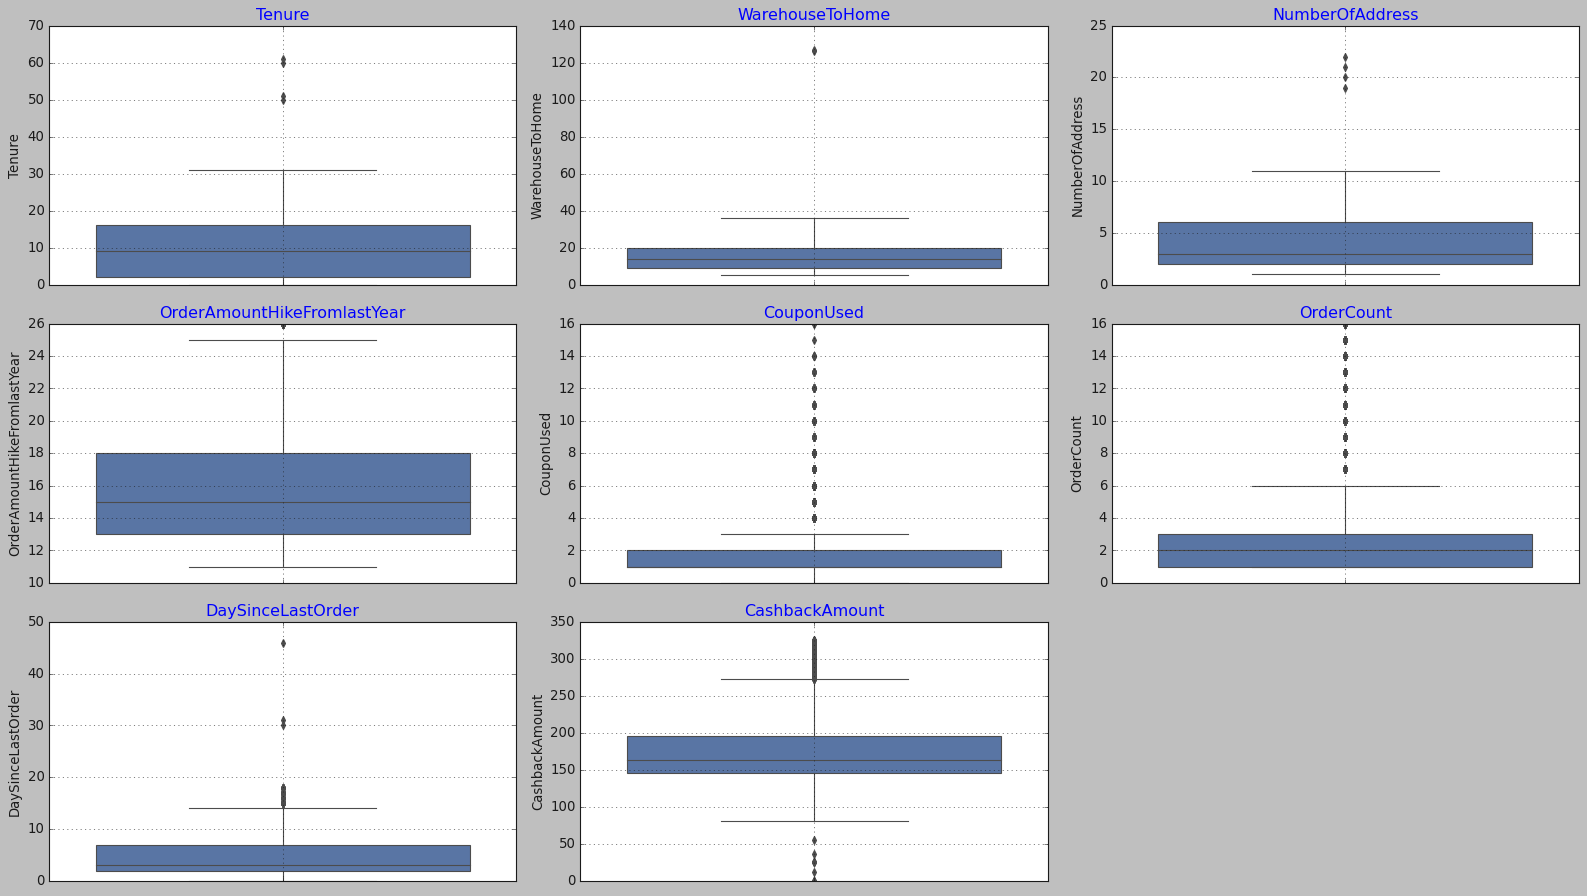

In [1992]:
data_plot=churn[num]
fig=plt.figure(figsize=(20,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,3,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Blue')
    plt.grid()
plt.tight_layout()

There are not many outliers but there are a few in all variables.

### Imputing missing values

In [1993]:
churn['Tenure'] = churn['Tenure'].replace(['0', 0], np.nan)

In [1994]:
churn['HourSpendOnApp'] = churn['HourSpendOnApp'].replace(['0', 0], np.nan)

Since all 10 numerical variables ahve outliers I will be trateing the outliers using median 

In [1995]:
churn.isnull().sum()/len(churn)

Churn                          0.000000
Tenure                         0.137123
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                0.044583
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 0.045826
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    0.047069
CouponUsed                     0.045471
OrderCount                     0.045826
DaySinceLastOrder              0.054529
CashbackAmount                 0.000000
dtype: float64

In [1996]:
churn.isnull().sum()

Churn                            0
Tenure                         772
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 258
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [1997]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
my_imputer.fit(churn[['Tenure']])
churn['Tenure']=my_imputer.transform(churn[["Tenure"]]).ravel()

In [1998]:
churn.dropna(inplace = True)

In [1999]:
churn.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

### Outliers Treatment

In [2000]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    #print(col)
    #print(Q1)
    #print(Q3)
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [2001]:
for feature in data_plot: 
    #print("Feature",feature)
    lr,ur=treat_outlier(churn[feature])
    #print("lr",lr)
    #print("ur",ur)
    churn[feature]=np.where(churn[feature]>ur,np.round_(ur),churn[feature])
    churn[feature]=np.where(churn[feature]<lr,np.round_(lr),churn[feature])

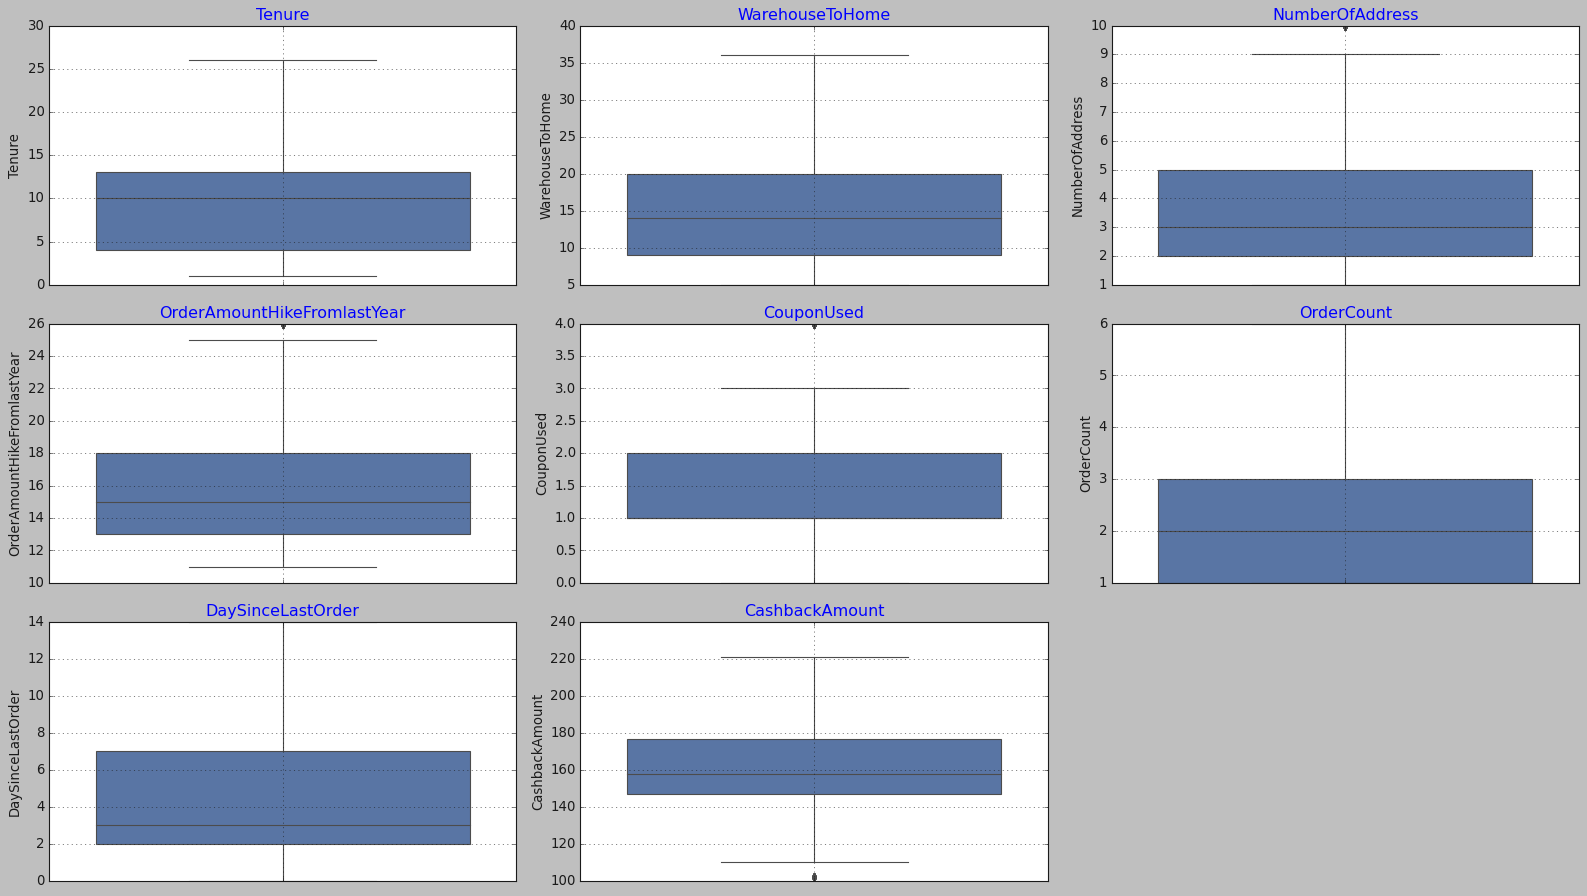

In [2002]:
data_plot=churn[num]
fig=plt.figure(figsize=(20,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,3,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Blue')
    plt.grid()
plt.tight_layout()

All the outliers are treated now

### Data Cleanining

In [2003]:
churn.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [2004]:
churn["PreferredLoginDevice"].replace({"Phone": "Mobile Phone"}, inplace=True)

In [2005]:
churn.PreferredLoginDevice.value_counts()

Mobile Phone    2845
Computer        1192
Name: PreferredLoginDevice, dtype: int64

In [2006]:
churn["PreferedOrderCat"].replace({"Mobile Phone": "Mobile"}, inplace=True)

In [2007]:
churn.PreferedOrderCat.value_counts()

Laptop & Accessory    1971
Mobile                1599
Fashion                443
Others                  18
Grocery                  6
Name: PreferedOrderCat, dtype: int64

In [2008]:
churn.PreferredPaymentMode.value_counts()

Debit Card          1643
Credit Card         1132
E wallet             456
COD                  311
UPI                  308
CC                   115
Cash on Delivery      72
Name: PreferredPaymentMode, dtype: int64

In [2009]:
churn["PreferredPaymentMode"].replace({"Cash on Delivery": "COD","Credit Card":"CC"}, inplace=True)

In [2010]:
churn.PreferredPaymentMode.value_counts()

Debit Card    1643
CC            1247
E wallet       456
COD            383
UPI            308
Name: PreferredPaymentMode, dtype: int64

In [2011]:
churn.SatisfactionScore.value_counts()

3    1221
1     837
5     799
4     765
2     415
Name: SatisfactionScore, dtype: int64

In [2012]:
churn.CouponUsed.value_counts()

1.0    1643
2.0    1028
0.0     733
4.0     401
3.0     232
Name: CouponUsed, dtype: int64

### Univariate Analysis

In [2013]:
churn.skew()

Churn                          1.698889
Tenure                         0.701011
WarehouseToHome                0.890269
HourSpendOnApp                -0.017799
NumberOfDeviceRegistered      -0.372651
SatisfactionScore             -0.143233
NumberOfAddress                0.979950
Complain                       0.972620
OrderAmountHikeFromlastYear    0.814040
CouponUsed                     0.768223
OrderCount                     1.247462
DaySinceLastOrder              0.707823
CashbackAmount                 0.207467
dtype: float64

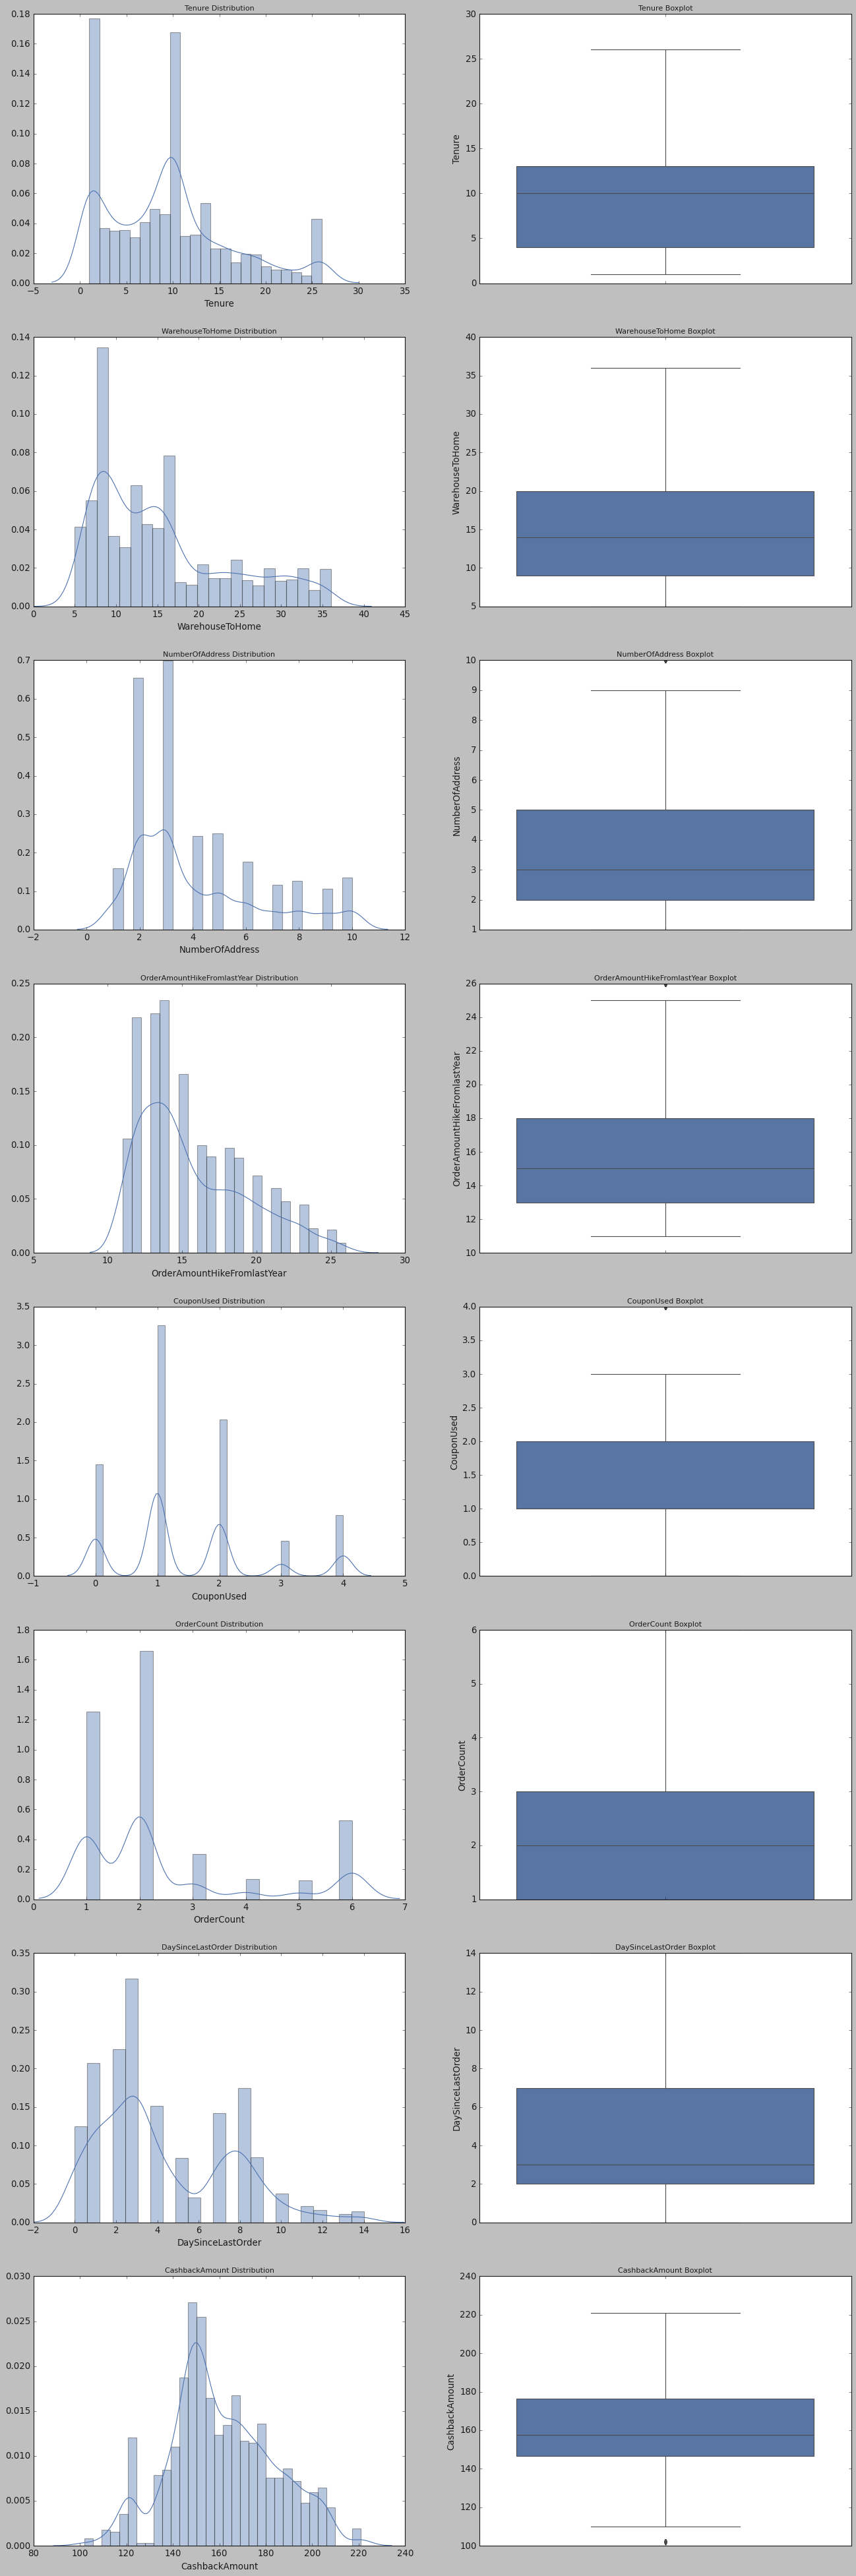

In [2014]:
fig, axes = plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(20,60)

a = sns.distplot(churn['Tenure'] , ax=axes[0][0])
a.set_title("Tenure Distribution",fontsize=10)

a = sns.boxplot(churn['Tenure'] , orient = "v" , ax=axes[0][1])
a.set_title("Tenure Boxplot",fontsize=10)

a = sns.distplot(churn['WarehouseToHome'] , ax=axes[1][0])
a.set_title("WarehouseToHome Distribution",fontsize=10)

a = sns.boxplot(churn['WarehouseToHome'] , orient = "v" , ax=axes[1][1])
a.set_title("WarehouseToHome Boxplot",fontsize=10)

a = sns.distplot(churn['NumberOfAddress'] , ax=axes[2][0])
a.set_title("NumberOfAddress Distribution",fontsize=10)

a = sns.boxplot(churn['NumberOfAddress'] , orient = "v" , ax=axes[2][1])
a.set_title("NumberOfAddress Boxplot",fontsize=10)

a = sns.distplot(churn['OrderAmountHikeFromlastYear'] , ax=axes[3][0])
a.set_title("OrderAmountHikeFromlastYear Distribution",fontsize=10)

a = sns.boxplot(churn['OrderAmountHikeFromlastYear'] , orient = "v" , ax=axes[3][1])
a.set_title("OrderAmountHikeFromlastYear Boxplot",fontsize=10)

a = sns.distplot(churn['CouponUsed'] , ax=axes[4][0])
a.set_title("CouponUsed Distribution",fontsize=10)

a = sns.boxplot(churn['CouponUsed'] , orient = "v" , ax=axes[4][1])
a.set_title("CouponUsed Boxplot",fontsize=10)


a = sns.distplot(churn['OrderCount'] , ax=axes[5][0])
a.set_title("OrderCount Distribution",fontsize=10)

a = sns.boxplot(churn['OrderCount'] , orient = "v" , ax=axes[5][1])
a.set_title("OrderCount Boxplot",fontsize=10)


a = sns.distplot(churn['DaySinceLastOrder'] , ax=axes[6][0])
a.set_title("DaySinceLastOrder Distribution",fontsize=10)

a = sns.boxplot(churn['DaySinceLastOrder'] , orient = "v" , ax=axes[6][1])
a.set_title("DaySinceLastOrder Boxplot",fontsize=10)

a = sns.distplot(churn['CashbackAmount'] , ax=axes[7][0])
a.set_title("CashbackAmount Distribution",fontsize=10)

a = sns.boxplot(churn['CashbackAmount'] , orient = "v" , ax=axes[7][1])
a.set_title("CashbackAmount Boxplot",fontsize=10)

plt.show()

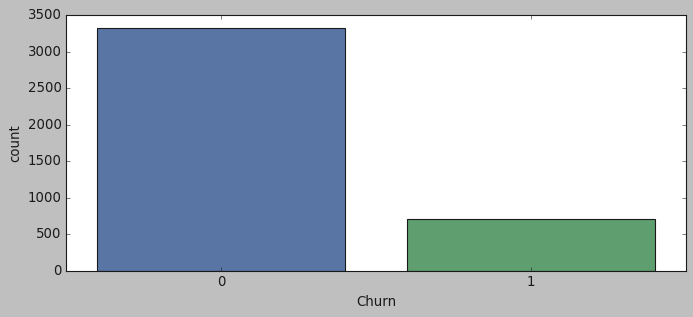

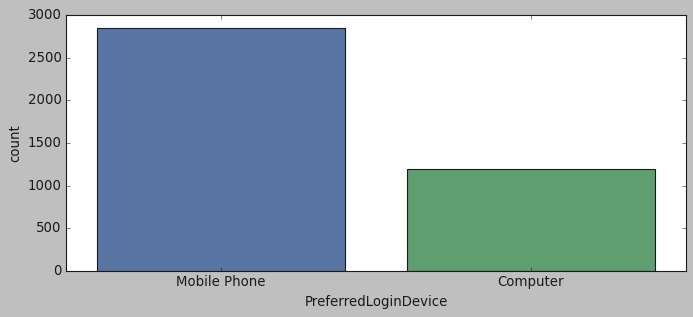

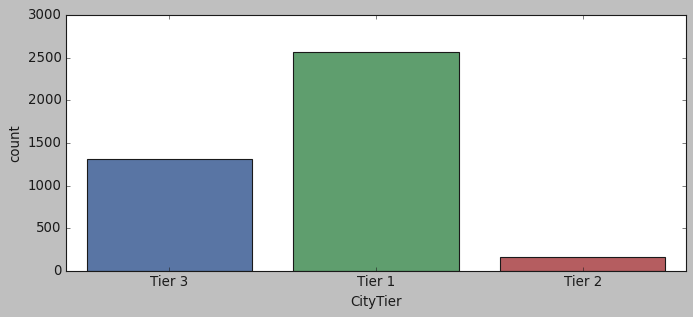

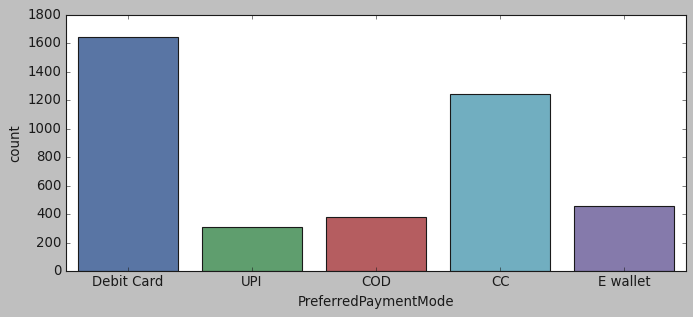

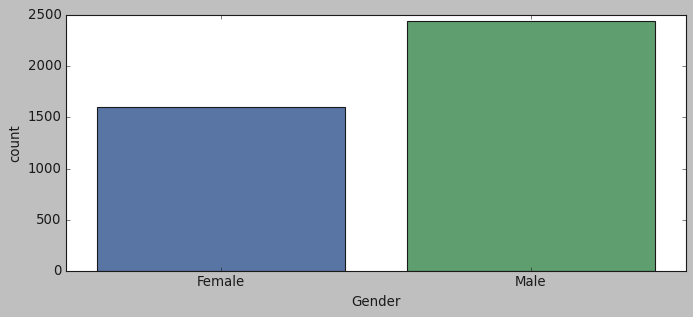

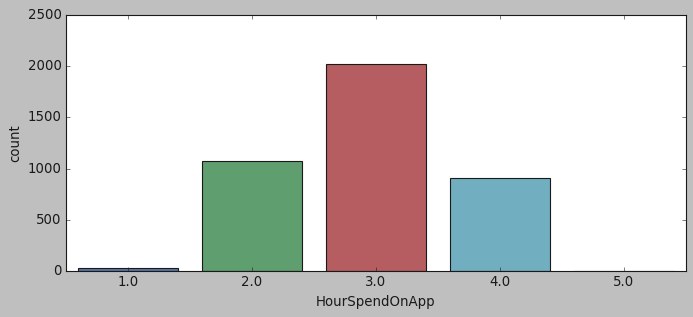

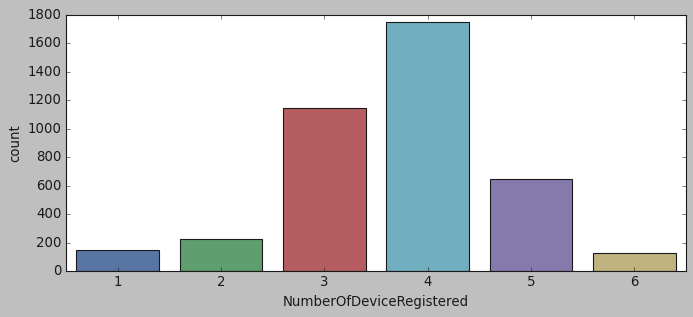

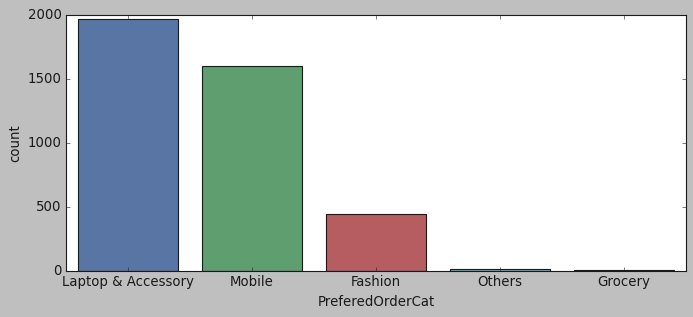

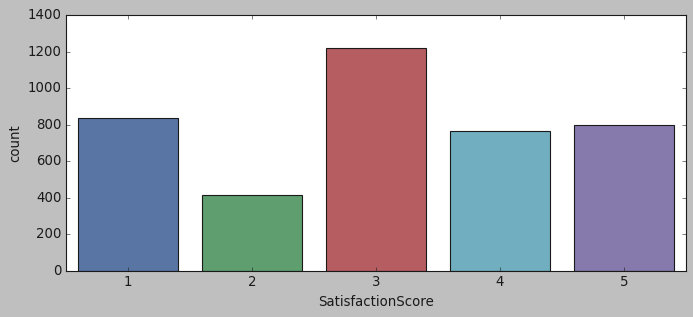

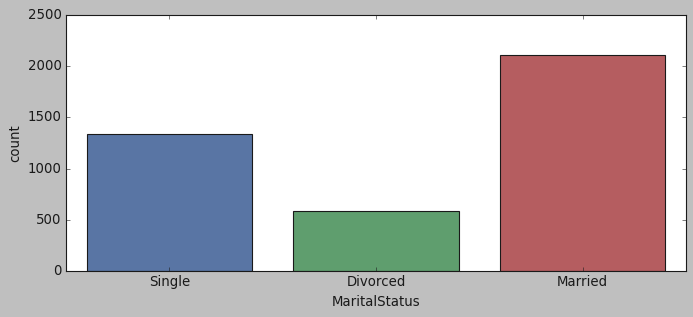

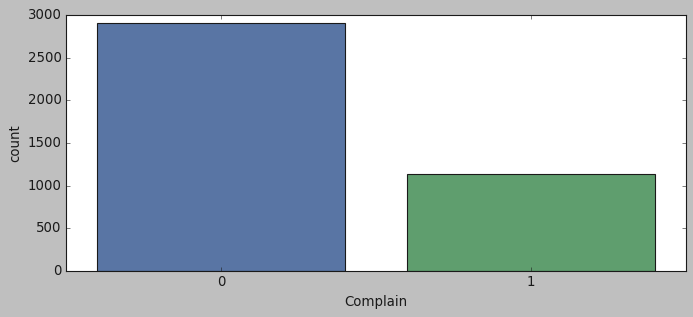

In [2018]:
for column in churn[cat].columns:
    plt.figure(figsize=(10,4))
    sns.countplot(churn[column])
    plt.show()

### Bivariate Analysis

### Continous Variable with Target Variable

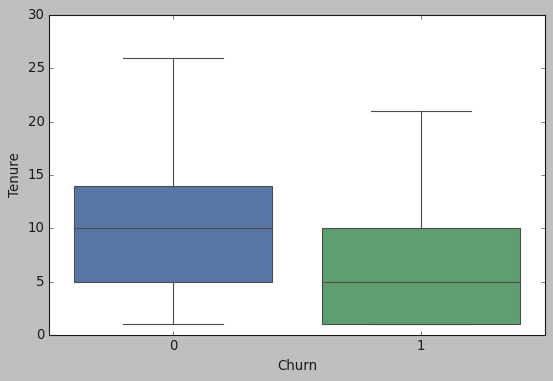

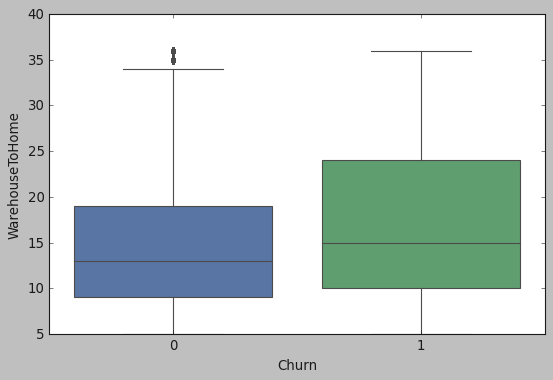

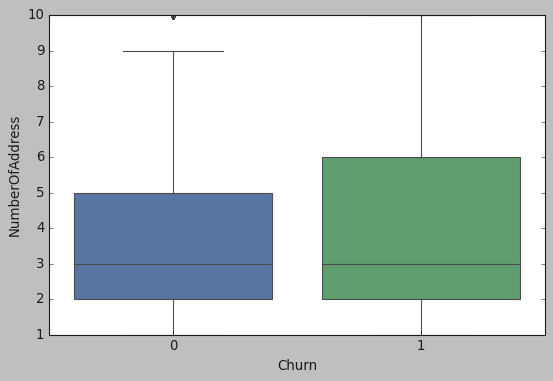

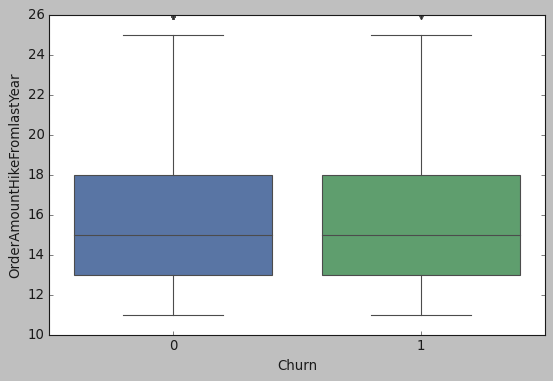

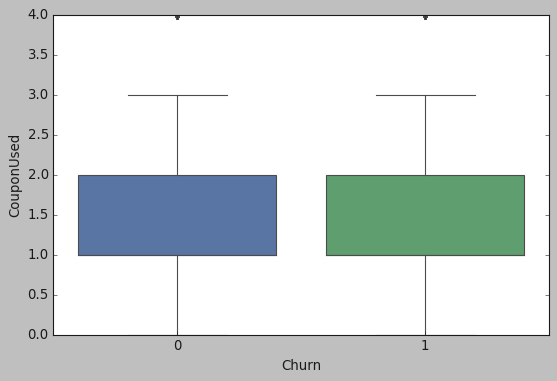

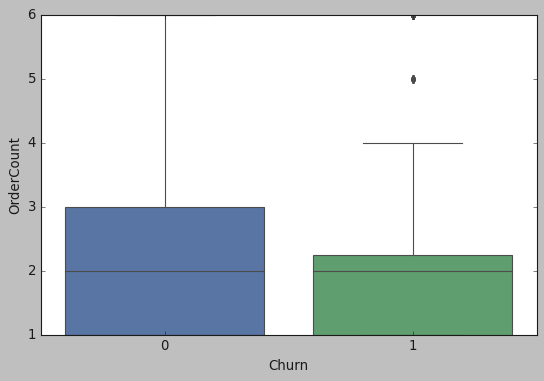

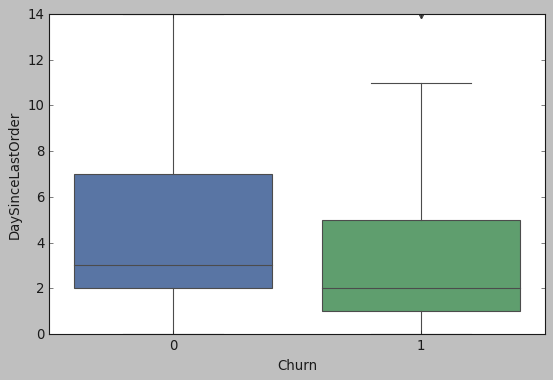

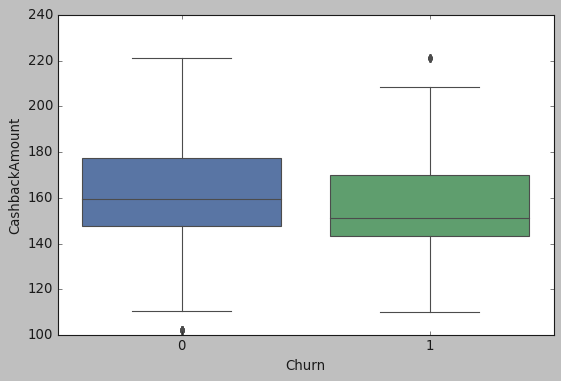

In [1322]:
for column in churn[num].columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(churn["Churn"], churn[column]) 
    plt.show()

### Categorical Variable with Target Variable

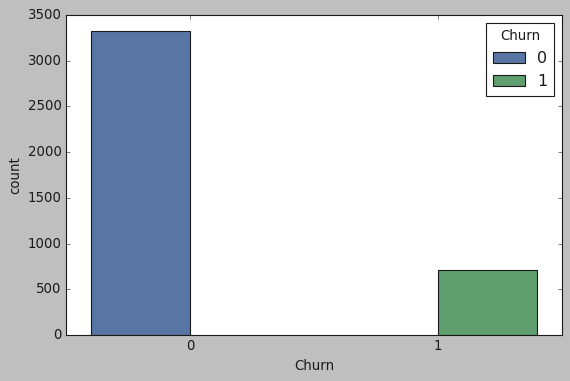

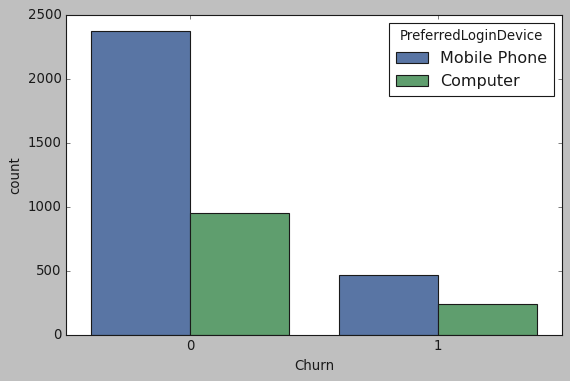

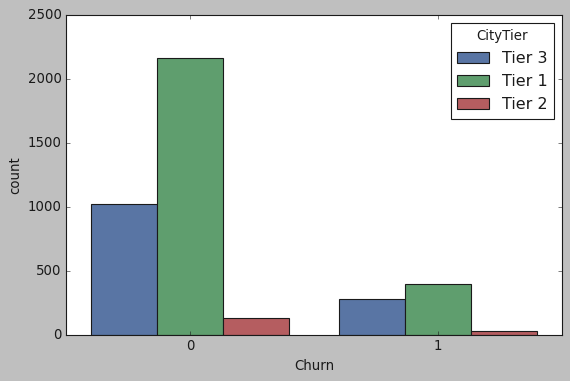

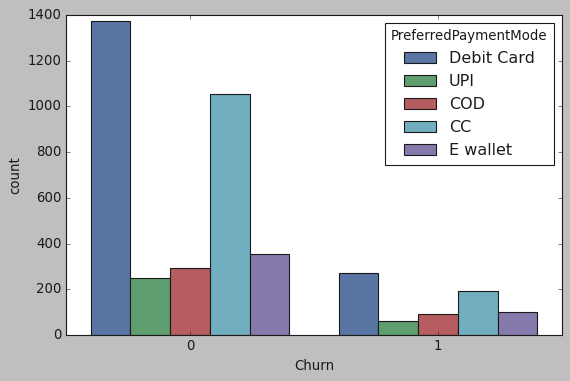

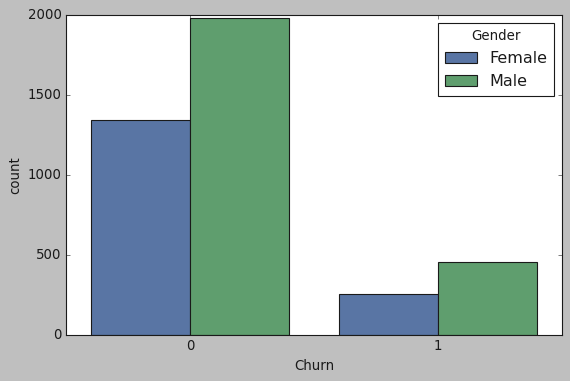

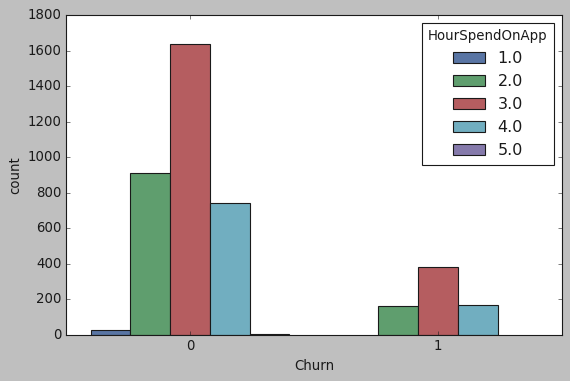

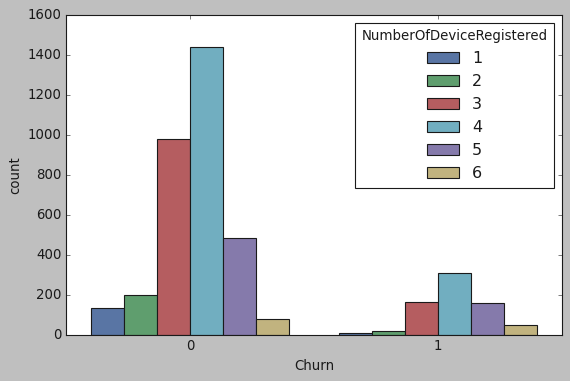

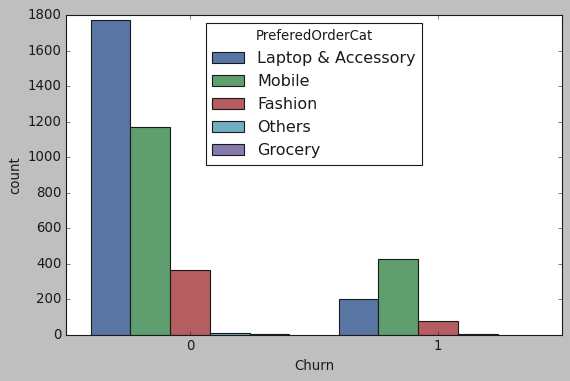

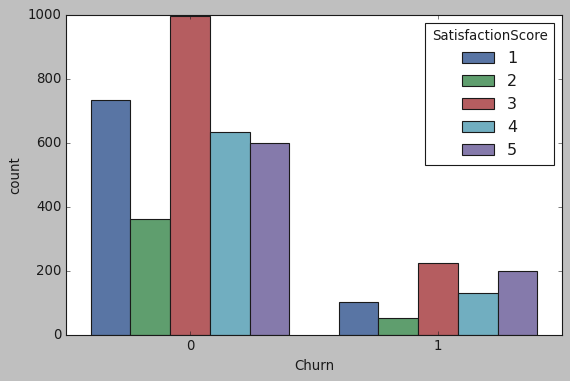

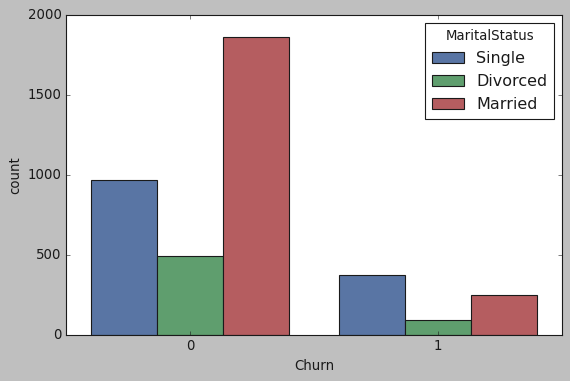

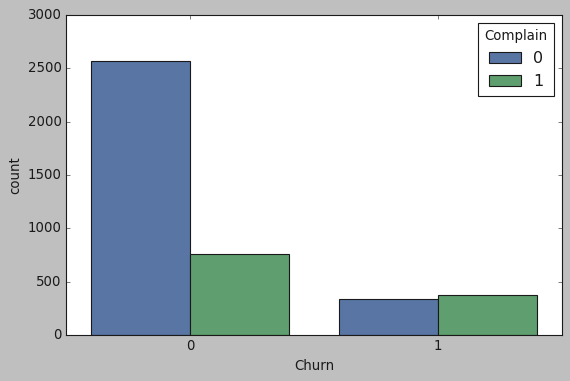

In [1323]:
for column in churn[cat].columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x="Churn", hue=churn[column], data=churn)
    plt.show()

### Between Two Continous Variables

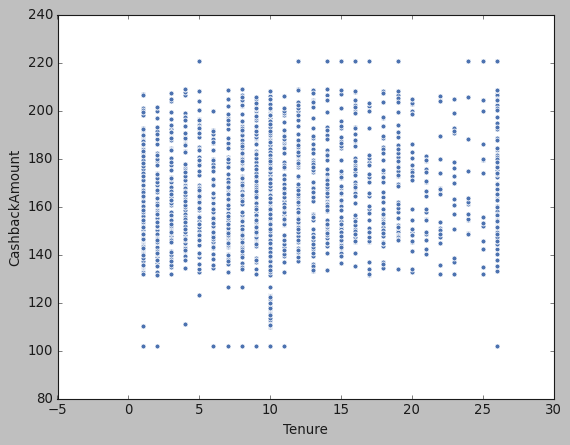

In [1324]:
sns.scatterplot(data=churn, x="Tenure", y="CashbackAmount")

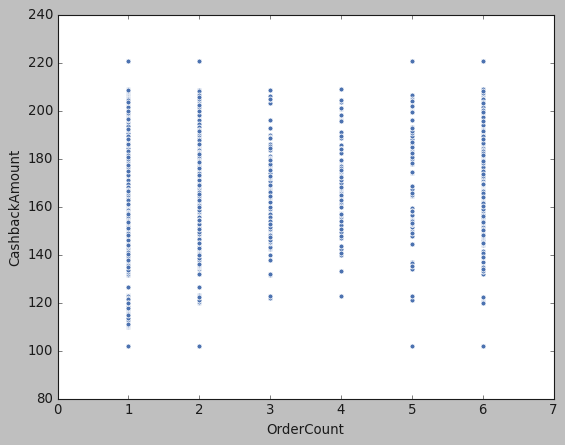

In [1325]:
sns.scatterplot(data=churn, x="OrderCount", y="CashbackAmount")

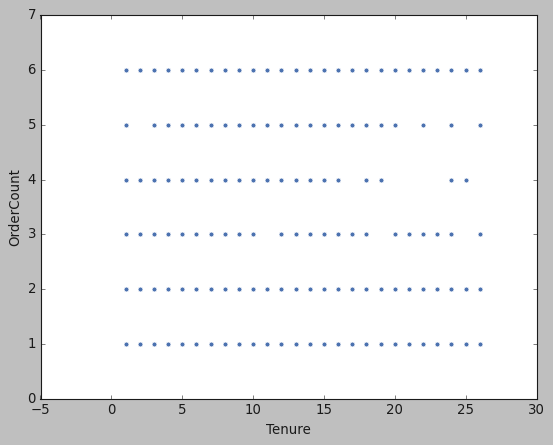

In [1326]:
sns.scatterplot(data=churn, x="Tenure", y="OrderCount")

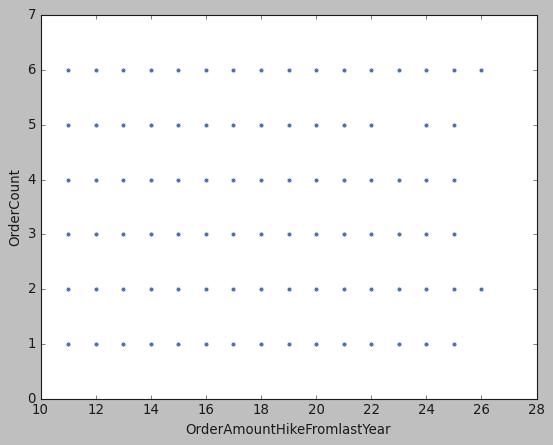

In [1327]:
sns.scatterplot(data=churn, x="OrderAmountHikeFromlastYear", y="OrderCount")

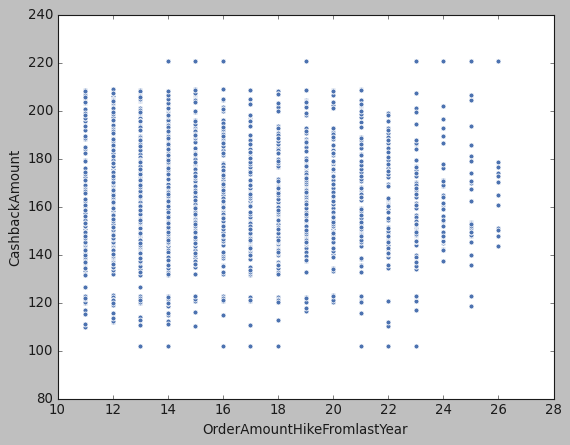

In [1328]:
sns.scatterplot(data=churn, x="OrderAmountHikeFromlastYear", y="CashbackAmount")

### Between Categorical and Continous Variable

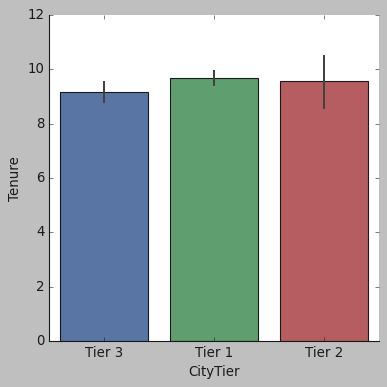

In [1329]:
sns.catplot(x="CityTier", y="Tenure", data=churn,kind="bar")

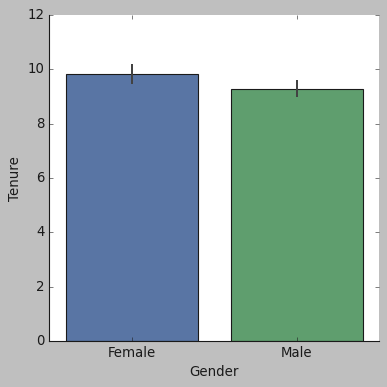

In [1330]:
sns.catplot(x="Gender", y="Tenure", data=churn,kind="bar")

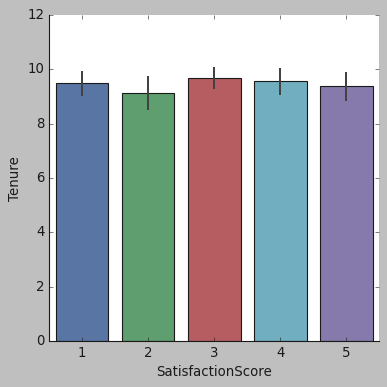

In [1331]:
sns.catplot(x="SatisfactionScore", y="Tenure", data=churn,kind="bar")

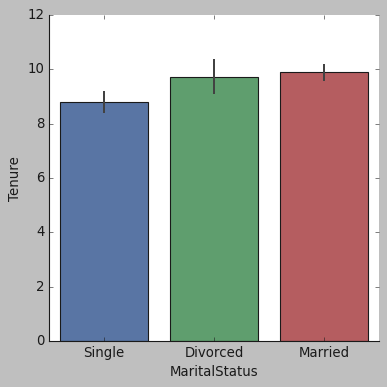

In [1332]:
sns.catplot(x="MaritalStatus", y="Tenure", data=churn,kind="bar")

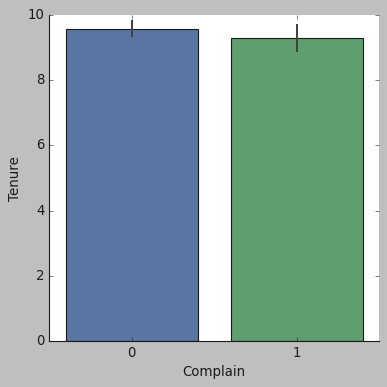

In [1333]:
sns.catplot(x="Complain", y="Tenure", data=churn,kind="bar")

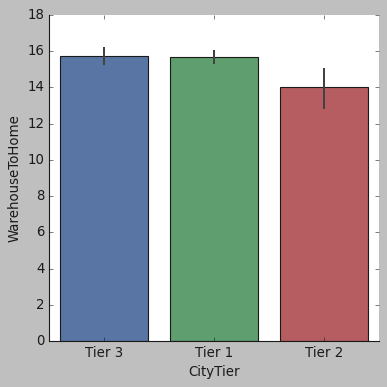

In [1334]:
sns.catplot(x="CityTier", y="WarehouseToHome", data=churn,kind="bar")

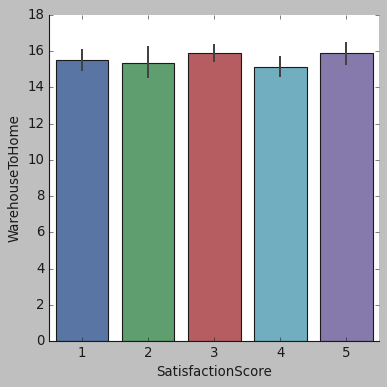

In [1335]:
sns.catplot(x="SatisfactionScore", y="WarehouseToHome", data=churn,kind="bar")

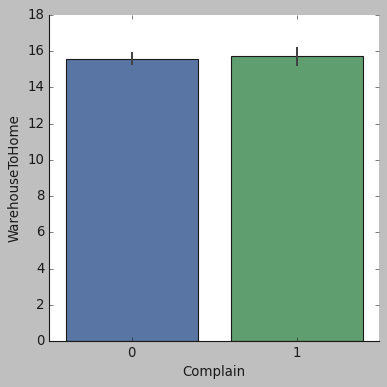

In [1336]:
sns.catplot(x="Complain", y="WarehouseToHome", data=churn,kind="bar")

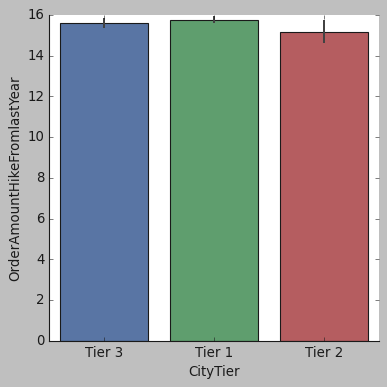

In [1337]:
sns.catplot(x="CityTier", y="OrderAmountHikeFromlastYear", data=churn,kind="bar")

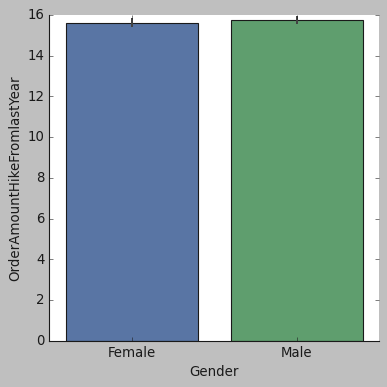

In [1338]:
sns.catplot(x="Gender", y="OrderAmountHikeFromlastYear", data=churn,kind="bar")

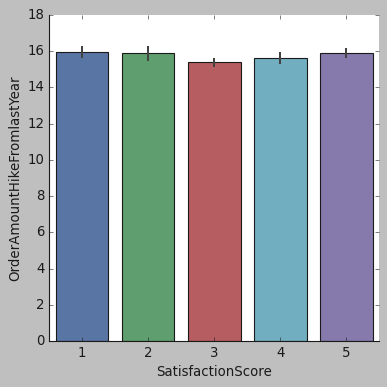

In [1339]:
sns.catplot(x="SatisfactionScore", y="OrderAmountHikeFromlastYear", data=churn,kind="bar")

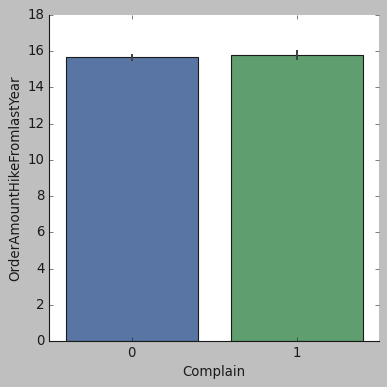

In [1340]:
sns.catplot(x="Complain", y="OrderAmountHikeFromlastYear", data=churn,kind="bar")

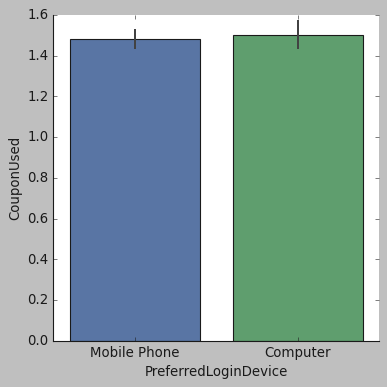

In [1341]:
sns.catplot(x="PreferredLoginDevice", y="CouponUsed", data=churn,kind="bar")

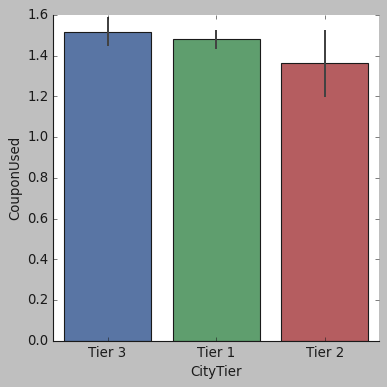

In [1342]:
sns.catplot(x="CityTier", y="CouponUsed", data=churn,kind="bar")

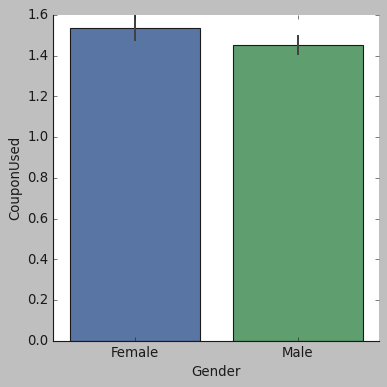

In [1343]:
sns.catplot(x="Gender", y="CouponUsed", data=churn,kind="bar")

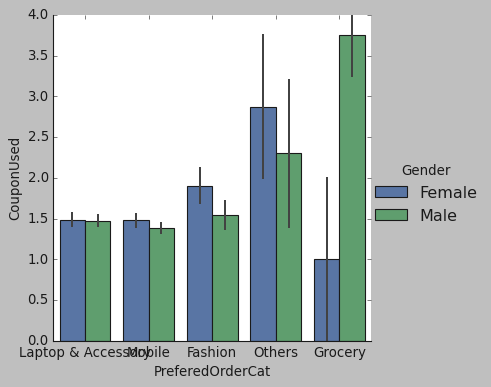

In [1344]:
sns.catplot(x="PreferedOrderCat", y="CouponUsed", data=churn,kind="bar", hue="Gender")

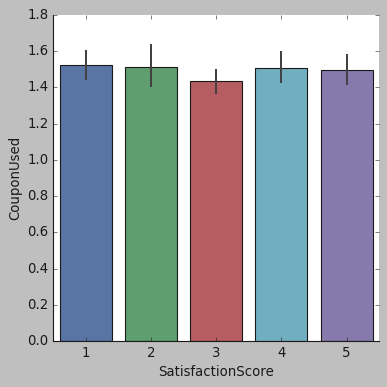

In [1345]:
sns.catplot(x="SatisfactionScore", y="CouponUsed", data=churn,kind="bar")

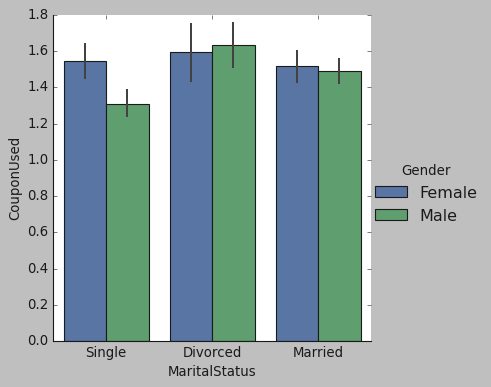

In [1346]:
sns.catplot(x="MaritalStatus", y="CouponUsed", data=churn,kind="bar",hue="Gender")

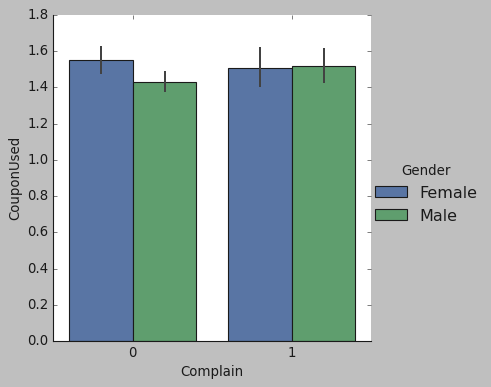

In [1347]:
sns.catplot(x="Complain", y="CouponUsed", data=churn,kind="bar",hue="Gender")

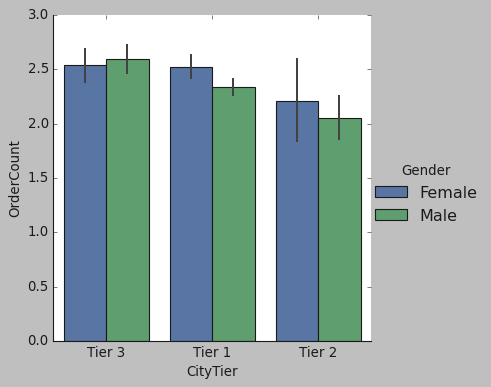

In [1348]:
sns.catplot(x="CityTier", y="OrderCount", data=churn,kind="bar",hue="Gender")

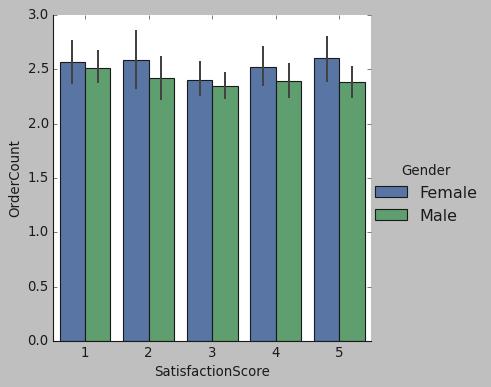

In [1349]:
sns.catplot(x="SatisfactionScore", y="OrderCount", data=churn,kind="bar",hue="Gender")

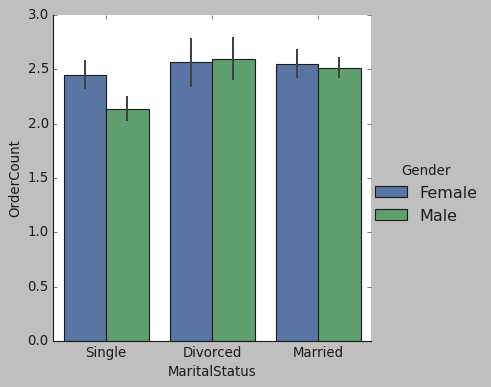

In [1350]:
sns.catplot(x="MaritalStatus", y="OrderCount", data=churn,kind="bar",hue="Gender")

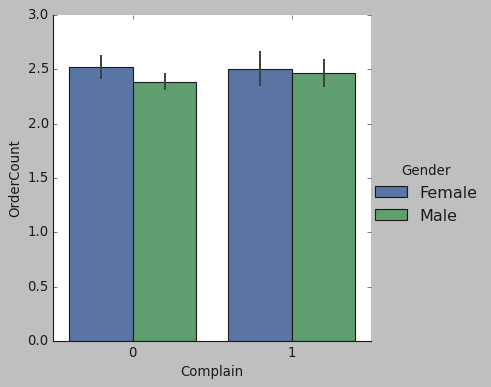

In [1351]:
sns.catplot(x="Complain", y="OrderCount", data=churn,kind="bar",hue="Gender")

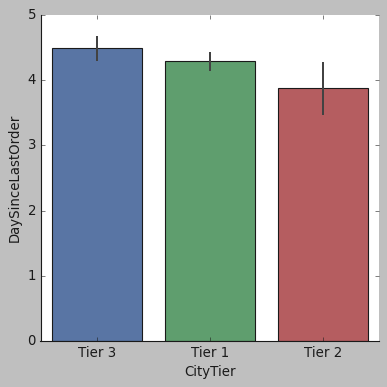

In [1352]:
sns.catplot(x="CityTier", y="DaySinceLastOrder", data=churn,kind="bar")

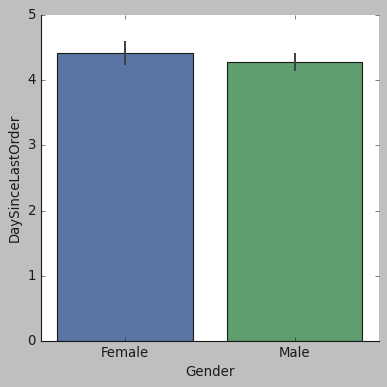

In [1353]:
sns.catplot(x="Gender", y="DaySinceLastOrder", data=churn,kind="bar")

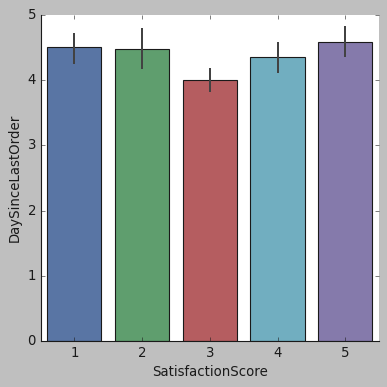

In [1354]:
sns.catplot(x="SatisfactionScore", y="DaySinceLastOrder", data=churn,kind="bar")

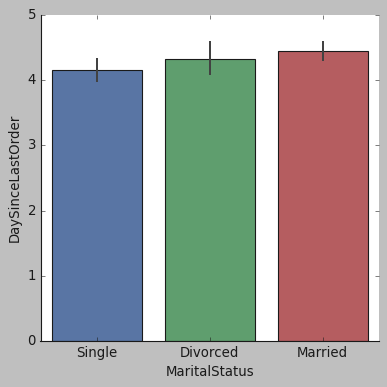

In [1355]:
sns.catplot(x="MaritalStatus", y="DaySinceLastOrder", data=churn,kind="bar")

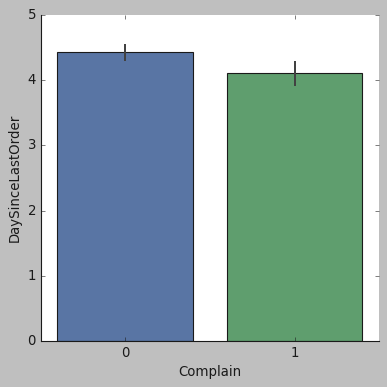

In [1356]:
sns.catplot(x="Complain", y="DaySinceLastOrder", data=churn,kind="bar")

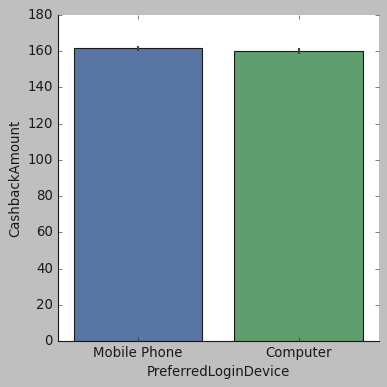

In [1357]:
sns.catplot(x="PreferredLoginDevice", y="CashbackAmount", data=churn,kind="bar")

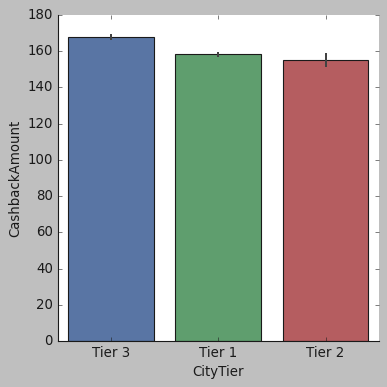

In [1358]:
sns.catplot(x="CityTier", y="CashbackAmount", data=churn,kind="bar")

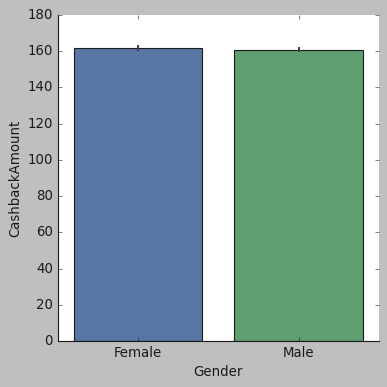

In [1359]:
sns.catplot(x="Gender", y="CashbackAmount", data=churn,kind="bar")

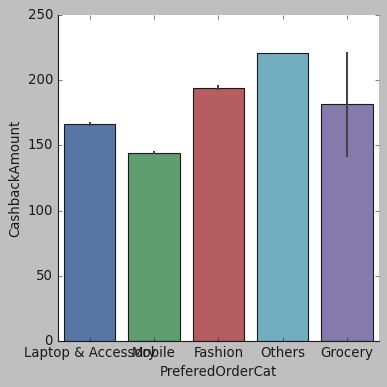

In [1360]:
sns.catplot(x="PreferedOrderCat", y="CashbackAmount", data=churn,kind="bar")

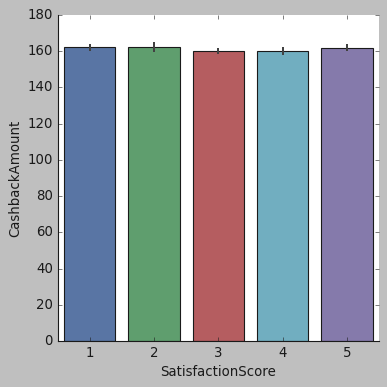

In [1361]:
sns.catplot(x="SatisfactionScore", y="CashbackAmount", data=churn,kind="bar")

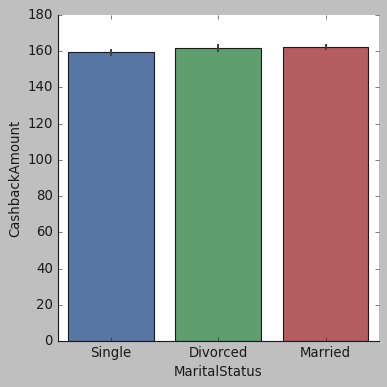

In [1362]:
sns.catplot(x="MaritalStatus", y="CashbackAmount", data=churn,kind="bar")

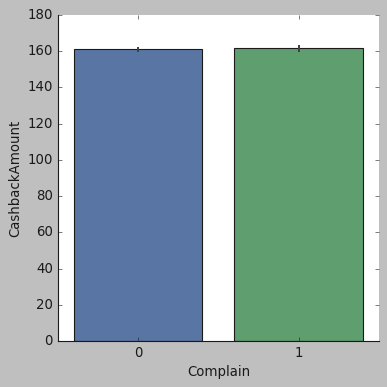

In [1363]:
sns.catplot(x="Complain", y="CashbackAmount", data=churn,kind="bar")

### Between Two Categorical Variables

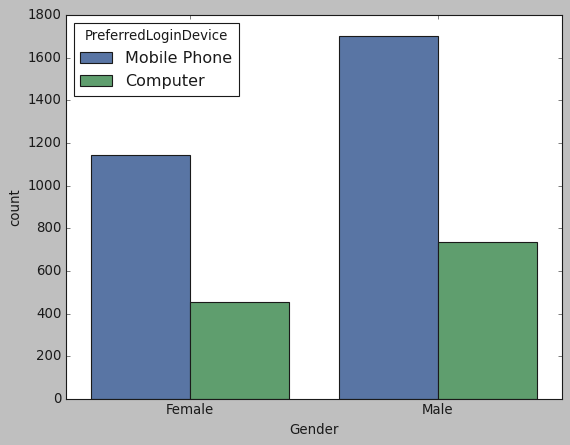

In [1364]:
sns.countplot(x="Gender", hue="PreferredLoginDevice", data=churn)

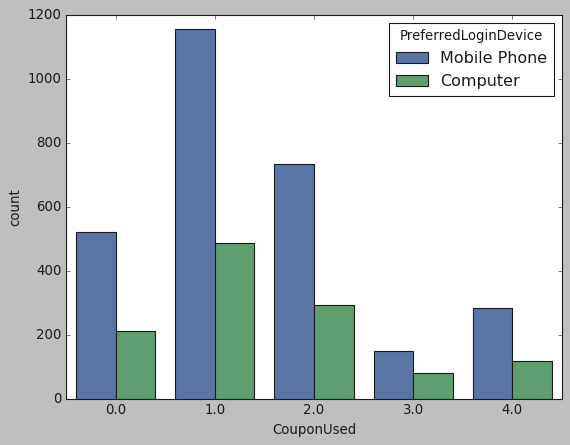

In [1365]:
sns.countplot(x="CouponUsed", hue="PreferredLoginDevice", data=churn)

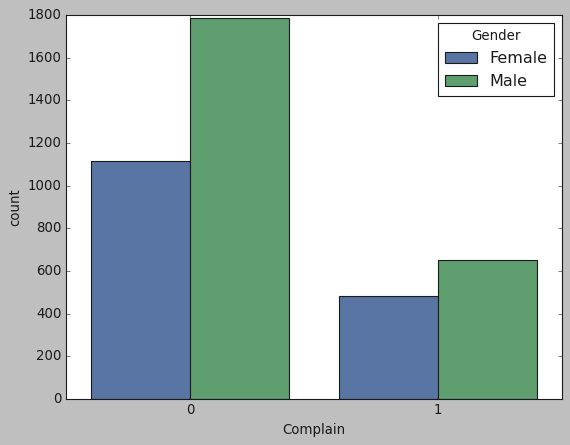

In [1366]:
sns.countplot(x="Complain", hue="Gender", data=churn)

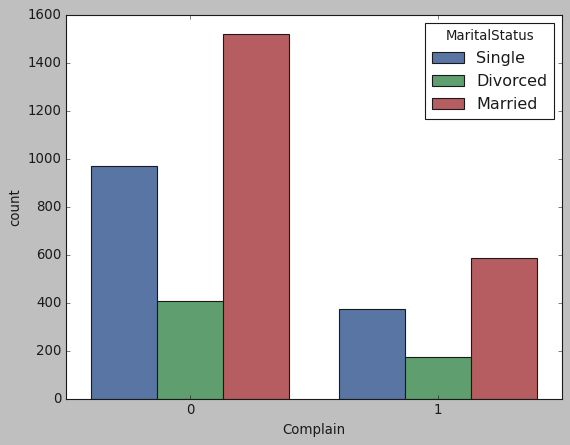

In [1367]:
sns.countplot(x="Complain", hue="MaritalStatus", data=churn)

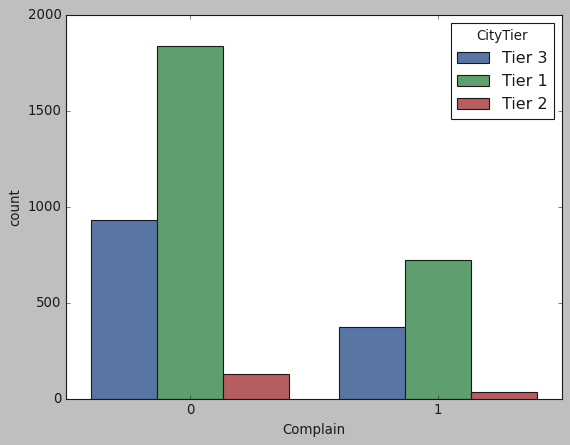

In [1368]:
sns.countplot(x="Complain", hue="CityTier", data=churn)

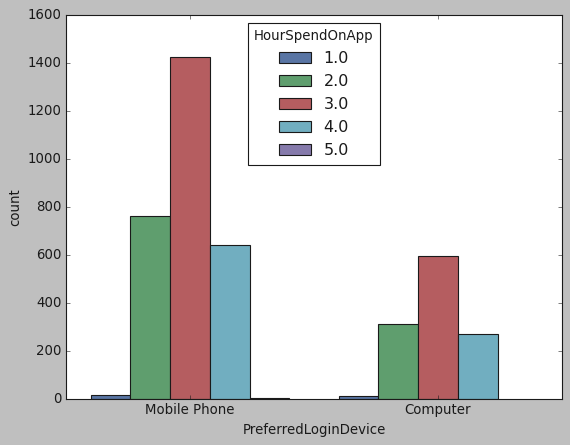

In [1369]:
sns.countplot(x="PreferredLoginDevice", hue="HourSpendOnApp", data=churn)

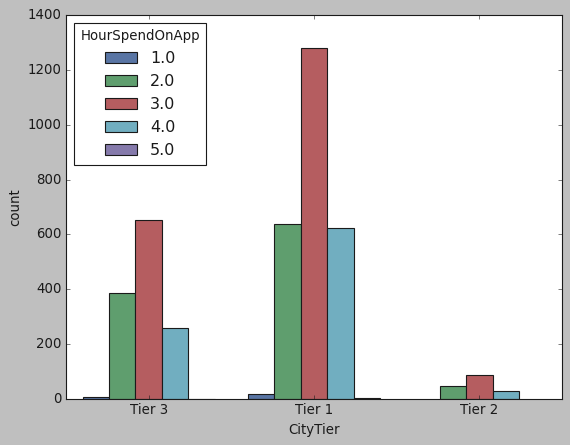

In [1370]:
sns.countplot(x="CityTier", hue="HourSpendOnApp", data=churn)

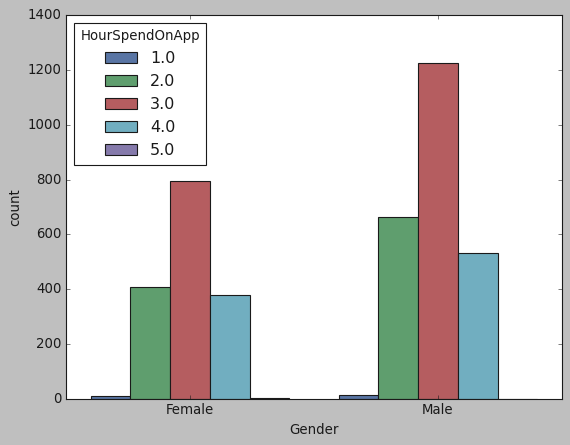

In [1371]:
sns.countplot(x="Gender", hue="HourSpendOnApp", data=churn)

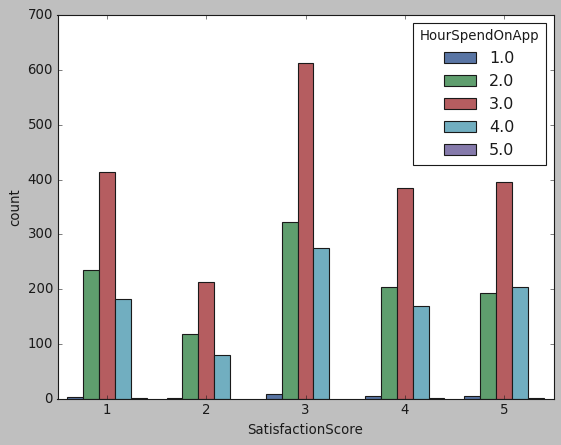

In [1372]:
sns.countplot(x="SatisfactionScore", hue="HourSpendOnApp", data=churn)

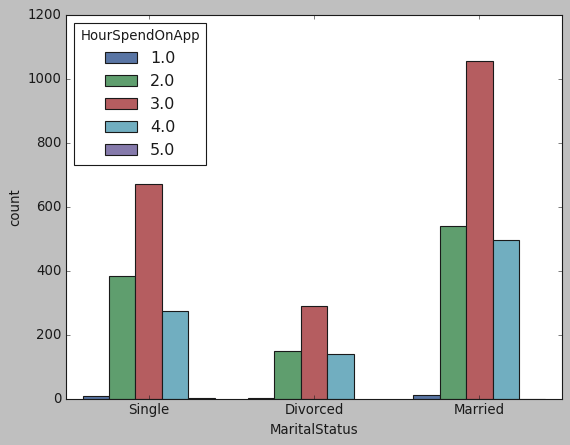

In [1373]:
sns.countplot(x="MaritalStatus", hue="HourSpendOnApp", data=churn)

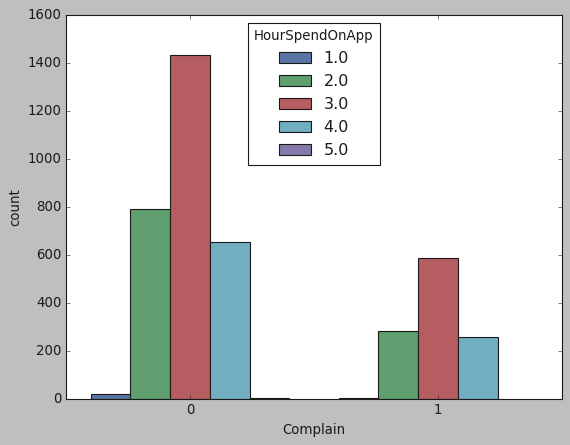

In [1374]:
sns.countplot(x="Complain", hue="HourSpendOnApp", data=churn)

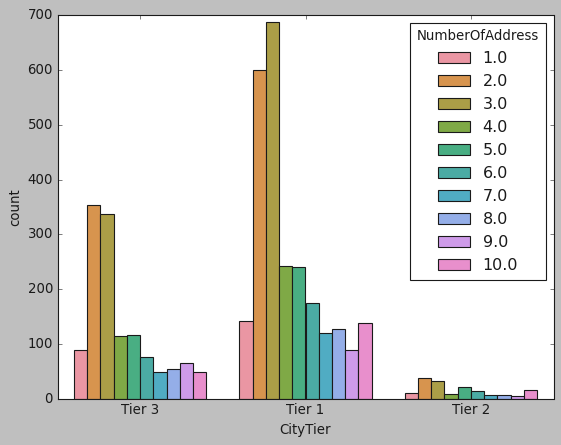

In [1375]:
sns.countplot(x="CityTier", hue="NumberOfAddress", data=churn)

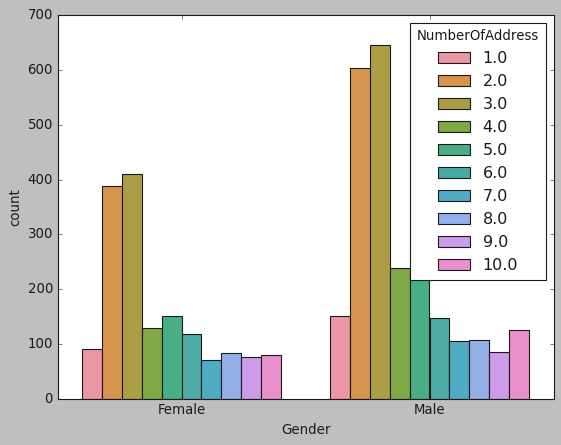

In [1376]:
sns.countplot(x="Gender", hue="NumberOfAddress", data=churn)

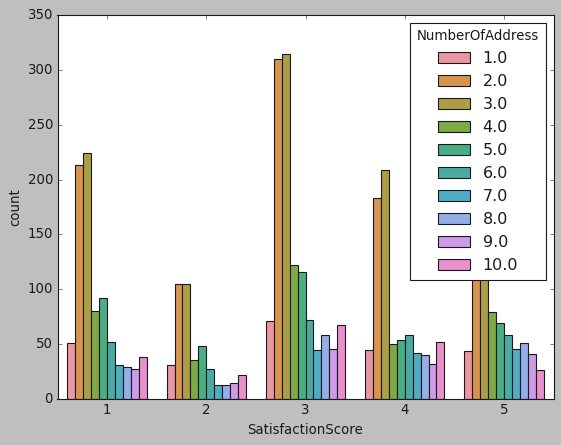

In [1377]:
sns.countplot(x="SatisfactionScore", hue="NumberOfAddress", data=churn)

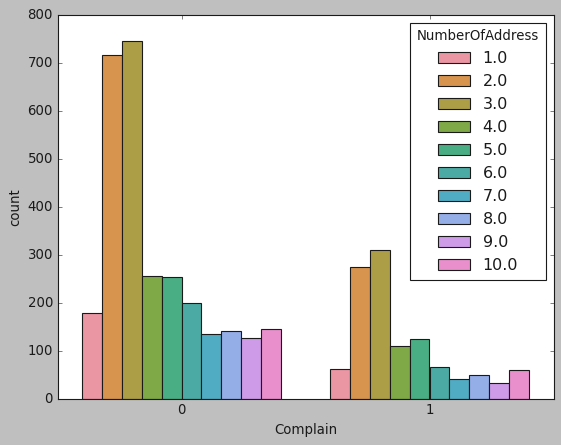

In [1378]:
sns.countplot(x="Complain", hue="NumberOfAddress", data=churn)

### Feature Creation 

In [1379]:
def get_category(x):
    val = ""
    if x < 6:
        val = "New Customer"
    else: 
        val = "Old Customer"
    return val

In [1380]:
churn['Customer_Category'] = churn['Tenure'].apply(lambda x:get_category(x))

In [1381]:
churn['Customer_Category'].value_counts()

Old Customer    2789
New Customer    1248
Name: Customer_Category, dtype: int64

In [1382]:
def get_distance(x):
    val = ""
    if x < 10:
        val = "Near"
    else: 
        val = "Far"
    return val

In [1383]:
churn['WarehouseToHome'] = churn['WarehouseToHome'].apply(lambda x:get_distance(x))

In [1384]:
churn['WarehouseToHome'].value_counts()

Far     2780
Near    1257
Name: WarehouseToHome, dtype: int64

In [1385]:
def get_time(x):
    val = ""
    if x >= 4:
        val = "High"
    elif x >=2 and x <= 3:
        val = "Medium"
    else: 
        val = "Low"
    return val

In [1386]:
churn['HourSpendOnApp'] = churn['HourSpendOnApp'].apply(lambda x:get_time(x))

In [1387]:
churn['HourSpendOnApp'].value_counts()

Medium    3094
High       916
Low         27
Name: HourSpendOnApp, dtype: int64

In [1388]:
def get_device(x):
    val = ""
    if x == 1:
        val = "Single"
    else: 
        val = "Multiple"
    return val

In [1389]:
churn['NumberOfDeviceRegistered'] = churn['NumberOfDeviceRegistered'].apply(lambda x:get_device(x))

In [1390]:
churn['NumberOfDeviceRegistered'].value_counts()

Multiple    3890
Single       147
Name: NumberOfDeviceRegistered, dtype: int64

In [1391]:
def get_addresses(x):
    val = ""
    if x == 1:
        val = "Single"
    else: 
        val = "Multiple"
    return val

In [1392]:
churn['NumberOfAddress'] = churn['NumberOfAddress'].apply(lambda x:get_addresses(x))

In [1393]:
churn['NumberOfAddress'].value_counts()

Multiple    3795
Single       242
Name: NumberOfAddress, dtype: int64

In [1394]:
def get_coupons(x):
    val = ""
    if x > 0:
        val = "Yes"
    else: 
        val = "No"
    return val

In [1395]:
churn['CouponUsed'] = churn['CouponUsed'].apply(lambda x:get_coupons(x))

In [1396]:
churn['CouponUsed'].value_counts()

Yes    3304
No      733
Name: CouponUsed, dtype: int64

In [1397]:
def get_activity(x):
    val = ""
    if x > 10:
        val = "Inactive"
    elif x <= 10 and x >= 5:
        val = "Active"
    else: 
        val = "Very Active"
    return val

In [1398]:
churn['User_Activity'] = churn['DaySinceLastOrder'].apply(lambda x:get_activity(x))

In [1399]:
churn['User_Activity'].value_counts()

Very Active    2521
Active         1363
Inactive        153
Name: User_Activity, dtype: int64

In [1400]:
churn.OrderCount.value_counts()

2.0    1673
1.0    1267
6.0     532
3.0     304
4.0     136
5.0     125
Name: OrderCount, dtype: int64

In [1401]:
def get_order_vol(x):
    val = ""
    if x >= 5 and x <= 6:
        val = "High"
    elif x >= 3 and x <= 4:
        val = "Medium"
    else: 
        val = "Low"
    return val

In [1402]:
churn['Order_Volume'] = churn['OrderCount'].apply(lambda x:get_order_vol(x))

In [1403]:
churn['Order_Volume'].value_counts()

Low       2940
High       657
Medium     440
Name: Order_Volume, dtype: int64

In [1404]:
churn = churn.drop(['Tenure','DaySinceLastOrder','OrderCount'],axis=1)

In [1405]:
churn.head(5)

Churn PreferredLoginDevice CityTier WarehouseToHome PreferredPaymentMode  \
0     1         Mobile Phone   Tier 3            Near           Debit Card   
1     1         Mobile Phone   Tier 1            Near                  UPI   
2     1         Mobile Phone   Tier 1             Far           Debit Card   
3     1         Mobile Phone   Tier 3             Far           Debit Card   
5     1             Computer   Tier 1             Far           Debit Card   

   Gender HourSpendOnApp NumberOfDeviceRegistered    PreferedOrderCat  \
0  Female         Medium                 Multiple  Laptop & Accessory   
1    Male         Medium                 Multiple              Mobile   
2    Male         Medium                 Multiple              Mobile   
3    Male         Medium                 Multiple  Laptop & Accessory   
5  Female         Medium                 Multiple              Mobile   

  SatisfactionScore MaritalStatus NumberOfAddress Complain  \
0                 2        Single        Multiple        1   
1                 3        Single        Multiple        1   
2                 3        Single        Multiple        1   
3                 5        Single        Multiple        0   
5                 5        Single        Multiple        1   

   OrderAmountHikeFromlastYear CouponUsed  CashbackAmount Customer_Category  \
0                         11.0        Yes          159.93      New Customer   
1                         15.0         No          120.90      Old Customer   
2                         14.0         No          120.28      Old Customer   
3                         23.0         No          134.07      Old Customer   
5                         22.0        Yes          139.19      Old Customer   

  User_Activity Order_Volume  
0        Active          Low  
1   Very Active          Low  
2   Very Active          Low  
3   Very Active          Low  
5        Active         High

In [1406]:
cat=[]
num=[]
for i in churn.columns:
    if churn[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Churn', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'CouponUsed', 'Customer_Category', 'User_Activity', 'Order_Volume']
['OrderAmountHikeFromlastYear', 'CashbackAmount']


In [1407]:
churn[cat].describe().T

count unique                 top  freq
Churn                     4037      2                   0  3325
PreferredLoginDevice      4037      2        Mobile Phone  2845
CityTier                  4037      3              Tier 1  2563
WarehouseToHome           4037      2                 Far  2780
PreferredPaymentMode      4037      5          Debit Card  1643
Gender                    4037      2                Male  2437
HourSpendOnApp            4037      3              Medium  3094
NumberOfDeviceRegistered  4037      2            Multiple  3890
PreferedOrderCat          4037      5  Laptop & Accessory  1971
SatisfactionScore         4037      5                   3  1221
MaritalStatus             4037      3             Married  2111
NumberOfAddress           4037      2            Multiple  3795
Complain                  4037      2                   0  2901
CouponUsed                4037      2                 Yes  3304
Customer_Category         4037      2        Old Customer  2789
User_Activity             4037      3         Very Active  2521
Order_Volume              4037      3                 Low  2940

In [1408]:
churn[num].describe().T

count        mean        std    min     25%  \
OrderAmountHikeFromlastYear  4037.0   15.689621   3.629868   11.0   13.00   
CashbackAmount               4037.0  161.078098  22.499844  102.0  146.77   

                                50%     75%    max  
OrderAmountHikeFromlastYear   15.00   18.00   26.0  
CashbackAmount               157.62  176.54  221.0

In [1409]:
#This DF will be used for cluster analysis later
churn_cluster_df = churn.copy()
churn_cluster_df.shape

(4037, 19)

In [1410]:
churn_cluster_df.head(2)

Churn PreferredLoginDevice CityTier WarehouseToHome PreferredPaymentMode  \
0     1         Mobile Phone   Tier 3            Near           Debit Card   
1     1         Mobile Phone   Tier 1            Near                  UPI   

   Gender HourSpendOnApp NumberOfDeviceRegistered    PreferedOrderCat  \
0  Female         Medium                 Multiple  Laptop & Accessory   
1    Male         Medium                 Multiple              Mobile   

  SatisfactionScore MaritalStatus NumberOfAddress Complain  \
0                 2        Single        Multiple        1   
1                 3        Single        Multiple        1   

   OrderAmountHikeFromlastYear CouponUsed  CashbackAmount Customer_Category  \
0                         11.0        Yes          159.93      New Customer   
1                         15.0         No          120.90      Old Customer   

  User_Activity Order_Volume  
0        Active          Low  
1   Very Active          Low

In [1411]:
churn_cluster_df.to_excel('clustered_data.xlsx',index=False)

### Insights

1. Which gender and marital status is churning more?<br>
A. Males and singles are churning more. 

2. Which City tier has the more churn?<br>
A. Teir 1 cities have more churn than any other tier.

3. Are customers with less tenure churning more?<br>
A. Yes, majority of the churned customers have relatively less tenure than those who have not churned.

4. Did the churned customers had complaints?<br>
A. There does not seem to be any relation with complaints as there are customers who have not churned but had complaint likewise most of the churned customers 
   did not have complaints.

5. What was the preferred order category for the poeple who churned?<br>
A. Most of the churned customers had mobile as their prefered order category followed by laptop and accessories

6. What was the satisfaction score for the customers who churned?<br>
A. Most of the churned customers had a satisfaction score of 3,4 and 5. That makes me beleive that 1 and 2 are the best scores.

7. Had the churned customers used any coupons?<br>
A. Yes, most of them had used 1 - 2 coupons and there is no trend with respect to coupons as customers who had not churned also used the same number of coupons.

8. What was the order count for the churned customers?<br>
A. With respect to order count also we do not see any particular difference between churned and customers who have not churned.

9. How long were the churned customers inactive?<br>
A. Majority of the customers were active so there does not seem to be an impact.

10. Was there any cashback for the churned customers?<br>
A.	Chruned customers had a lower cashback compared to the customers who did not churn.

11. Was there any significant pattern with oderhike from the last year for the churned customer?<br>
A. No, there is not any significant pattern.

12. How many address did the churned customer had?<br>
A. Most of the churned customers had more addresses registered than the customers who did not churn.

13.IS there a significant pattern with device registered for churned customers?<br>
A. Most of the churned customers had 3,4 and 5 device registered.

14. What is the warehousetohome distance for churned customers?<br>
A. Warehouse to home distance has been more for the churned customers than the customers who did not churn.

15. What has been the prefered login device for the churned customers?<br>
A. Mobile phones has been the prefered login device for the churned customers.

16. What has been the prefered payment mode for chruned customers?<br>
A. Debit card and credit card has been the prefered payment mode for the churned customers.

17. What is the trend seen with respect to tenure?<br>
A. Tenure seems to be a little higher in females than males.Tier 2 companies have a little highers tenure than others. Singles seem to have a shorter tenure.

18. What are the trends seen with respect to warehousetohome distance?<br>
A. Tier 2 companies have slightly less warehousetohome distance than others.

19. Are there any trends from the hoursspendonapp?<br>
A. There does not seem to be any pattern with hoursspendonapp.

20. What trends do we see with Numberofaddress?<br>
A. Tier 3 customers seem to have less number of adresses as compared to tier 1 and tier 2. Females seem to have more number of address registerd. Customers with 
complaints had less number of addresses.

21. What trends do we see with respect to orderamounthikefromlastyear and coupons used?<br>
A. Tier 1 city seems to have higher hike from last year whereas tier 3 customers were the ones who have used higher number of coupons. Females seem to be using
more coupons than males.Coupons have been used more for fashion category. Single males seem to use lesser number of coupons.

22. What trends do we see with order count?<br>
A. For tier 2 females have a lesser order count. Single males have lesser order count.

23. What treds do we see with activity levels of customer?<br>
A. Tier 1 and 3  customers see a lesser recent activity. Females ahve a higher inactivity time as compared to males. Singles are more active than married
and divorsed.

24. What trends do we see from the cashback amounts?<br>
A. Mobile phones ahve got a higher cashbacks.Tier 3 customers have got a higher cashback.Females ahve got a higher cashback.Grocery and others have got a higher 
cashback. Singles ahve got a lesser cashback.

25. What are the some other trends observed?<br>
1. Mobile phones ahve been the prefered login device irrespective of gender. 
2. Coupons have been used more on mobile device.Male customers have made more complaints than females.
3. Tier 1 cities had more complaints follwoed by Tier 3. 
4. Married customers seem to have more complaints.
5. Cmparitivley customers using computer are spending less time on app.

### Encoding Categorical Variables

In [1412]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
churn.SatisfactionScore = le.fit_transform(churn.SatisfactionScore)
churn.WarehouseToHome =   le.fit_transform(churn.WarehouseToHome)
churn.HourSpendOnApp = le.fit_transform(churn.HourSpendOnApp)
churn.NumberOfDeviceRegistered = le.fit_transform(churn.NumberOfDeviceRegistered)
churn.NumberOfAddress = le.fit_transform(churn.NumberOfAddress)
churn.CouponUsed = le.fit_transform(churn.CouponUsed)
churn.Customer_Category = le.fit_transform(churn.Customer_Category)
churn.User_Activity = le.fit_transform(churn.User_Activity)
churn.Order_Volume = le.fit_transform(churn.Order_Volume)
churn.Complain = le.fit_transform(churn.Complain)

In [1413]:
PreferredLoginDevice = pd.get_dummies(churn.PreferredLoginDevice,drop_first=True)
PreferredPaymentMode = pd.get_dummies(churn.PreferredPaymentMode,drop_first=True)
PreferedOrderCat = pd.get_dummies(churn.PreferedOrderCat,drop_first=True)
MaritalStatus = pd.get_dummies(churn.MaritalStatus,drop_first=True)
Gender = pd.get_dummies(churn.Gender,drop_first=True)
CityTier = pd.get_dummies(churn.CityTier,drop_first=True)

In [1414]:
churn = churn.drop(['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender','CityTier'],axis=1)

In [1415]:
churn = pd.concat((churn,PreferredLoginDevice),axis=1)
churn = pd.concat((churn,PreferredPaymentMode),axis=1)
churn = pd.concat((churn,PreferedOrderCat),axis=1)
churn = pd.concat((churn,MaritalStatus),axis=1)
churn = pd.concat((churn,Gender),axis=1)
churn = pd.concat((churn,CityTier),axis=1)

In [1416]:
churn.columns

Index(['Churn', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed',
       'CashbackAmount', 'Customer_Category', 'User_Activity', 'Order_Volume',
       'Mobile Phone', 'COD', 'Debit Card', 'E wallet', 'UPI', 'Grocery',
       'Laptop & Accessory', 'Mobile', 'Others', 'Married', 'Single', 'Male',
       'Tier 2', 'Tier 3'],
      dtype='object')

In [1417]:
churn["Churn"] = churn["Churn"].astype(int)

In [1418]:
churn.columns = churn.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and').str.replace('[', '_').str.replace(']', '').str.replace('-', '_').str.replace('.', '')

In [1419]:
churn.head()

Churn  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0      1                1               2                         0   
1      1                1               2                         0   
2      1                0               2                         0   
3      1                0               2                         0   
5      1                0               2                         0   

   SatisfactionScore  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0                  1                0         1                         11.0   
1                  2                0         1                         15.0   
2                  2                0         1                         14.0   
3                  4                0         0                         23.0   
5                  4                0         1                         22.0   

   CouponUsed  CashbackAmount  ...  UPI  Grocery  Laptop_and_Accessory  \
0           1          159.93  ...    0        0                     1   
1           0          120.90  ...    1        0                     0   
2           0          120.28  ...    0        0                     0   
3           0          134.07  ...    0        0                     1   
5           1          139.19  ...    0        0                     0   

   Mobile  Others  Married  Single  Male  Tier_2  Tier_3  
0       0       0        0       1     0       0       1  
1       1       0        0       1     1       0       0  
2       1       0        0       1     1       0       0  
3       0       0        0       1     1       0       1  
5       1       0        0       1     0       0       0  

[5 rows x 27 columns]

In [1420]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 5629
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        4037 non-null   int32  
 1   WarehouseToHome              4037 non-null   int32  
 2   HourSpendOnApp               4037 non-null   int32  
 3   NumberOfDeviceRegistered     4037 non-null   int32  
 4   SatisfactionScore            4037 non-null   int32  
 5   NumberOfAddress              4037 non-null   int32  
 6   Complain                     4037 non-null   int32  
 7   OrderAmountHikeFromlastYear  4037 non-null   float64
 8   CouponUsed                   4037 non-null   int32  
 9   CashbackAmount               4037 non-null   float64
 10  Customer_Category            4037 non-null   int32  
 11  User_Activity                4037 non-null   int32  
 12  Order_Volume                 4037 non-null   int32  
 13  Mobile_Phone      

### Clustering

In [1421]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
churn_std = scaler.fit_transform(churn)

1 : 108999.00000000028
2 : 99427.23332218885
3 : 94682.3611906485
4 : 90486.0354687675
5 : 88005.44436745961
6 : 84122.9988655962
7 : 79317.97408667223
8 : 77119.6934662031
9 : 76294.53649709736
10 : 70996.09557233991
11 : 69427.43981533329
12 : 69302.90760380028
13 : 64616.40856294752
14 : 65014.902025069416
15 : 63993.48063281208
16 : 61786.393224321255
17 : 61575.37926173393
18 : 60548.19157527015
19 : 59985.464942301114


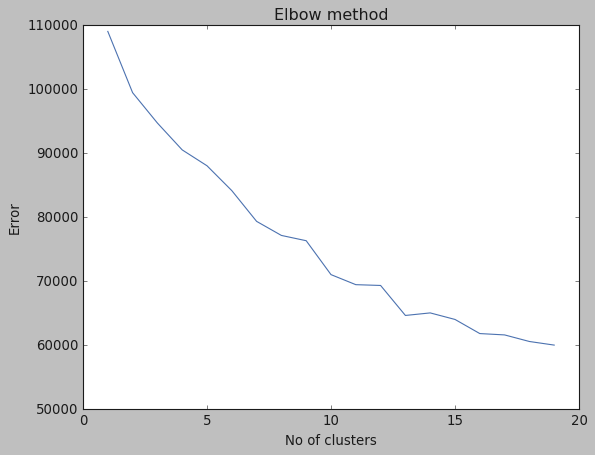

In [1422]:
from sklearn.cluster import KMeans
Error =[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i).fit(churn_std)
    kmeans.fit(churn_std)
    print("{} : {}".format(i,kmeans.inertia_))
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 20), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [1423]:
clt = KMeans(n_clusters=2, random_state=0, n_jobs=-1)
model = clt.fit_predict(churn_std)

In [1424]:
len(model)

4037

In [1425]:
churn_cluster_df['clusterNo'] = model

In [1426]:
churn_cluster_df.head()

Churn PreferredLoginDevice CityTier WarehouseToHome PreferredPaymentMode  \
0     1         Mobile Phone   Tier 3            Near           Debit Card   
1     1         Mobile Phone   Tier 1            Near                  UPI   
2     1         Mobile Phone   Tier 1             Far           Debit Card   
3     1         Mobile Phone   Tier 3             Far           Debit Card   
5     1             Computer   Tier 1             Far           Debit Card   

   Gender HourSpendOnApp NumberOfDeviceRegistered    PreferedOrderCat  \
0  Female         Medium                 Multiple  Laptop & Accessory   
1    Male         Medium                 Multiple              Mobile   
2    Male         Medium                 Multiple              Mobile   
3    Male         Medium                 Multiple  Laptop & Accessory   
5  Female         Medium                 Multiple              Mobile   

  SatisfactionScore MaritalStatus NumberOfAddress Complain  \
0                 2        Single        Multiple        1   
1                 3        Single        Multiple        1   
2                 3        Single        Multiple        1   
3                 5        Single        Multiple        0   
5                 5        Single        Multiple        1   

   OrderAmountHikeFromlastYear CouponUsed  CashbackAmount Customer_Category  \
0                         11.0        Yes          159.93      New Customer   
1                         15.0         No          120.90      Old Customer   
2                         14.0         No          120.28      Old Customer   
3                         23.0         No          134.07      Old Customer   
5                         22.0        Yes          139.19      Old Customer   

  User_Activity Order_Volume  clusterNo  
0        Active          Low          1  
1   Very Active          Low          0  
2   Very Active          Low          0  
3   Very Active          Low          1  
5        Active         High          0

In [1427]:
churn_cluster_df.to_excel('clustered_data.xlsx',index=False)

### Cluster Profiling

In [1428]:
churn_cluster_df.groupby('clusterNo')['PreferredLoginDevice'].value_counts().sort_index()

clusterNo  PreferredLoginDevice
0          Computer                 453
           Mobile Phone            1151
1          Computer                 739
           Mobile Phone            1694
Name: PreferredLoginDevice, dtype: int64

In [1429]:
churn_cluster_df.groupby('clusterNo')['CityTier'].value_counts().sort_index()

clusterNo  CityTier
0          Tier 1      1288
           Tier 2       103
           Tier 3       213
1          Tier 1      1275
           Tier 2        62
           Tier 3      1096
Name: CityTier, dtype: int64

In [1430]:
churn_cluster_df.groupby('clusterNo')['WarehouseToHome'].value_counts().sort_index()

clusterNo  WarehouseToHome
0          Far                1078
           Near                526
1          Far                1702
           Near                731
Name: WarehouseToHome, dtype: int64

In [1431]:
churn_cluster_df.groupby('clusterNo')['PreferredPaymentMode'].value_counts().sort_index()

clusterNo  PreferredPaymentMode
0          CC                      571
           COD                     190
           Debit Card              658
           E wallet                 54
           UPI                     131
1          CC                      676
           COD                     193
           Debit Card              985
           E wallet                402
           UPI                     177
Name: PreferredPaymentMode, dtype: int64

In [1432]:
churn_cluster_df.groupby('clusterNo')['Gender'].value_counts().sort_index()

clusterNo  Gender
0          Female     586
           Male      1018
1          Female    1014
           Male      1419
Name: Gender, dtype: int64

In [1433]:
churn_cluster_df.groupby('clusterNo')['HourSpendOnApp'].value_counts().sort_index()

clusterNo  HourSpendOnApp
0          High               457
           Low                  6
           Medium            1141
1          High               459
           Low                 21
           Medium            1953
Name: HourSpendOnApp, dtype: int64

In [1434]:
churn_cluster_df.groupby('clusterNo')['NumberOfDeviceRegistered'].value_counts().sort_index()

clusterNo  NumberOfDeviceRegistered
0          Multiple                    1558
           Single                        46
1          Multiple                    2332
           Single                       101
Name: NumberOfDeviceRegistered, dtype: int64

In [1435]:
churn_cluster_df.groupby('clusterNo')['PreferedOrderCat'].value_counts().sort_index()

clusterNo  PreferedOrderCat  
0          Fashion                  5
           Laptop & Accessory       1
           Mobile                1598
1          Fashion                438
           Grocery                  6
           Laptop & Accessory    1970
           Mobile                   1
           Others                  18
Name: PreferedOrderCat, dtype: int64

In [1436]:
churn_cluster_df.groupby('clusterNo')['SatisfactionScore'].value_counts().sort_index()

clusterNo  SatisfactionScore
0          1                    313
           2                    163
           3                    489
           4                    328
           5                    311
1          1                    524
           2                    252
           3                    732
           4                    437
           5                    488
Name: SatisfactionScore, dtype: int64

In [1437]:
churn_cluster_df.groupby('clusterNo')['MaritalStatus'].value_counts().sort_index()

clusterNo  MaritalStatus
0          Divorced          229
           Married           767
           Single            608
1          Divorced          355
           Married          1344
           Single            734
Name: MaritalStatus, dtype: int64

In [1438]:
churn_cluster_df.groupby('clusterNo')['NumberOfAddress'].value_counts().sort_index()

clusterNo  NumberOfAddress
0          Multiple           1529
           Single               75
1          Multiple           2266
           Single              167
Name: NumberOfAddress, dtype: int64

In [1439]:
churn_cluster_df.groupby('clusterNo')['Complain'].value_counts().sort_index()

clusterNo  Complain
0          0           1139
           1            465
1          0           1762
           1            671
Name: Complain, dtype: int64

In [1440]:
churn_cluster_df.groupby('clusterNo')['CouponUsed'].value_counts().sort_index()

clusterNo  CouponUsed
0          No             236
           Yes           1368
1          No             497
           Yes           1936
Name: CouponUsed, dtype: int64

In [1441]:
churn_cluster_df.groupby('clusterNo')['Customer_Category'].value_counts().sort_index()

clusterNo  Customer_Category
0          New Customer          668
           Old Customer          936
1          New Customer          580
           Old Customer         1853
Name: Customer_Category, dtype: int64

In [1442]:
churn_cluster_df.groupby('clusterNo')['User_Activity'].value_counts().sort_index()

clusterNo  User_Activity
0          Active            288
           Inactive           22
           Very Active      1294
1          Active           1075
           Inactive          131
           Very Active      1227
Name: User_Activity, dtype: int64

In [1443]:
churn_cluster_df.groupby('clusterNo')['Order_Volume'].value_counts().sort_index()

clusterNo  Order_Volume
0          High             129
           Low             1280
           Medium           195
1          High             528
           Low             1660
           Medium           245
Name: Order_Volume, dtype: int64

In [1444]:
churn_cluster_df.clusterNo.value_counts().sort_index()

0    1604
1    2433
Name: clusterNo, dtype: int64

In [1445]:
clust_profile=churn_cluster_df.groupby('clusterNo').mean()
clust_profile['freq']=churn_cluster_df.clusterNo.value_counts().sort_index()
clust_profile

OrderAmountHikeFromlastYear  CashbackAmount  freq
clusterNo                                                   
0                            15.859102      144.460767  1604
1                            15.577887      172.033379  2433

### Checking for Correlations

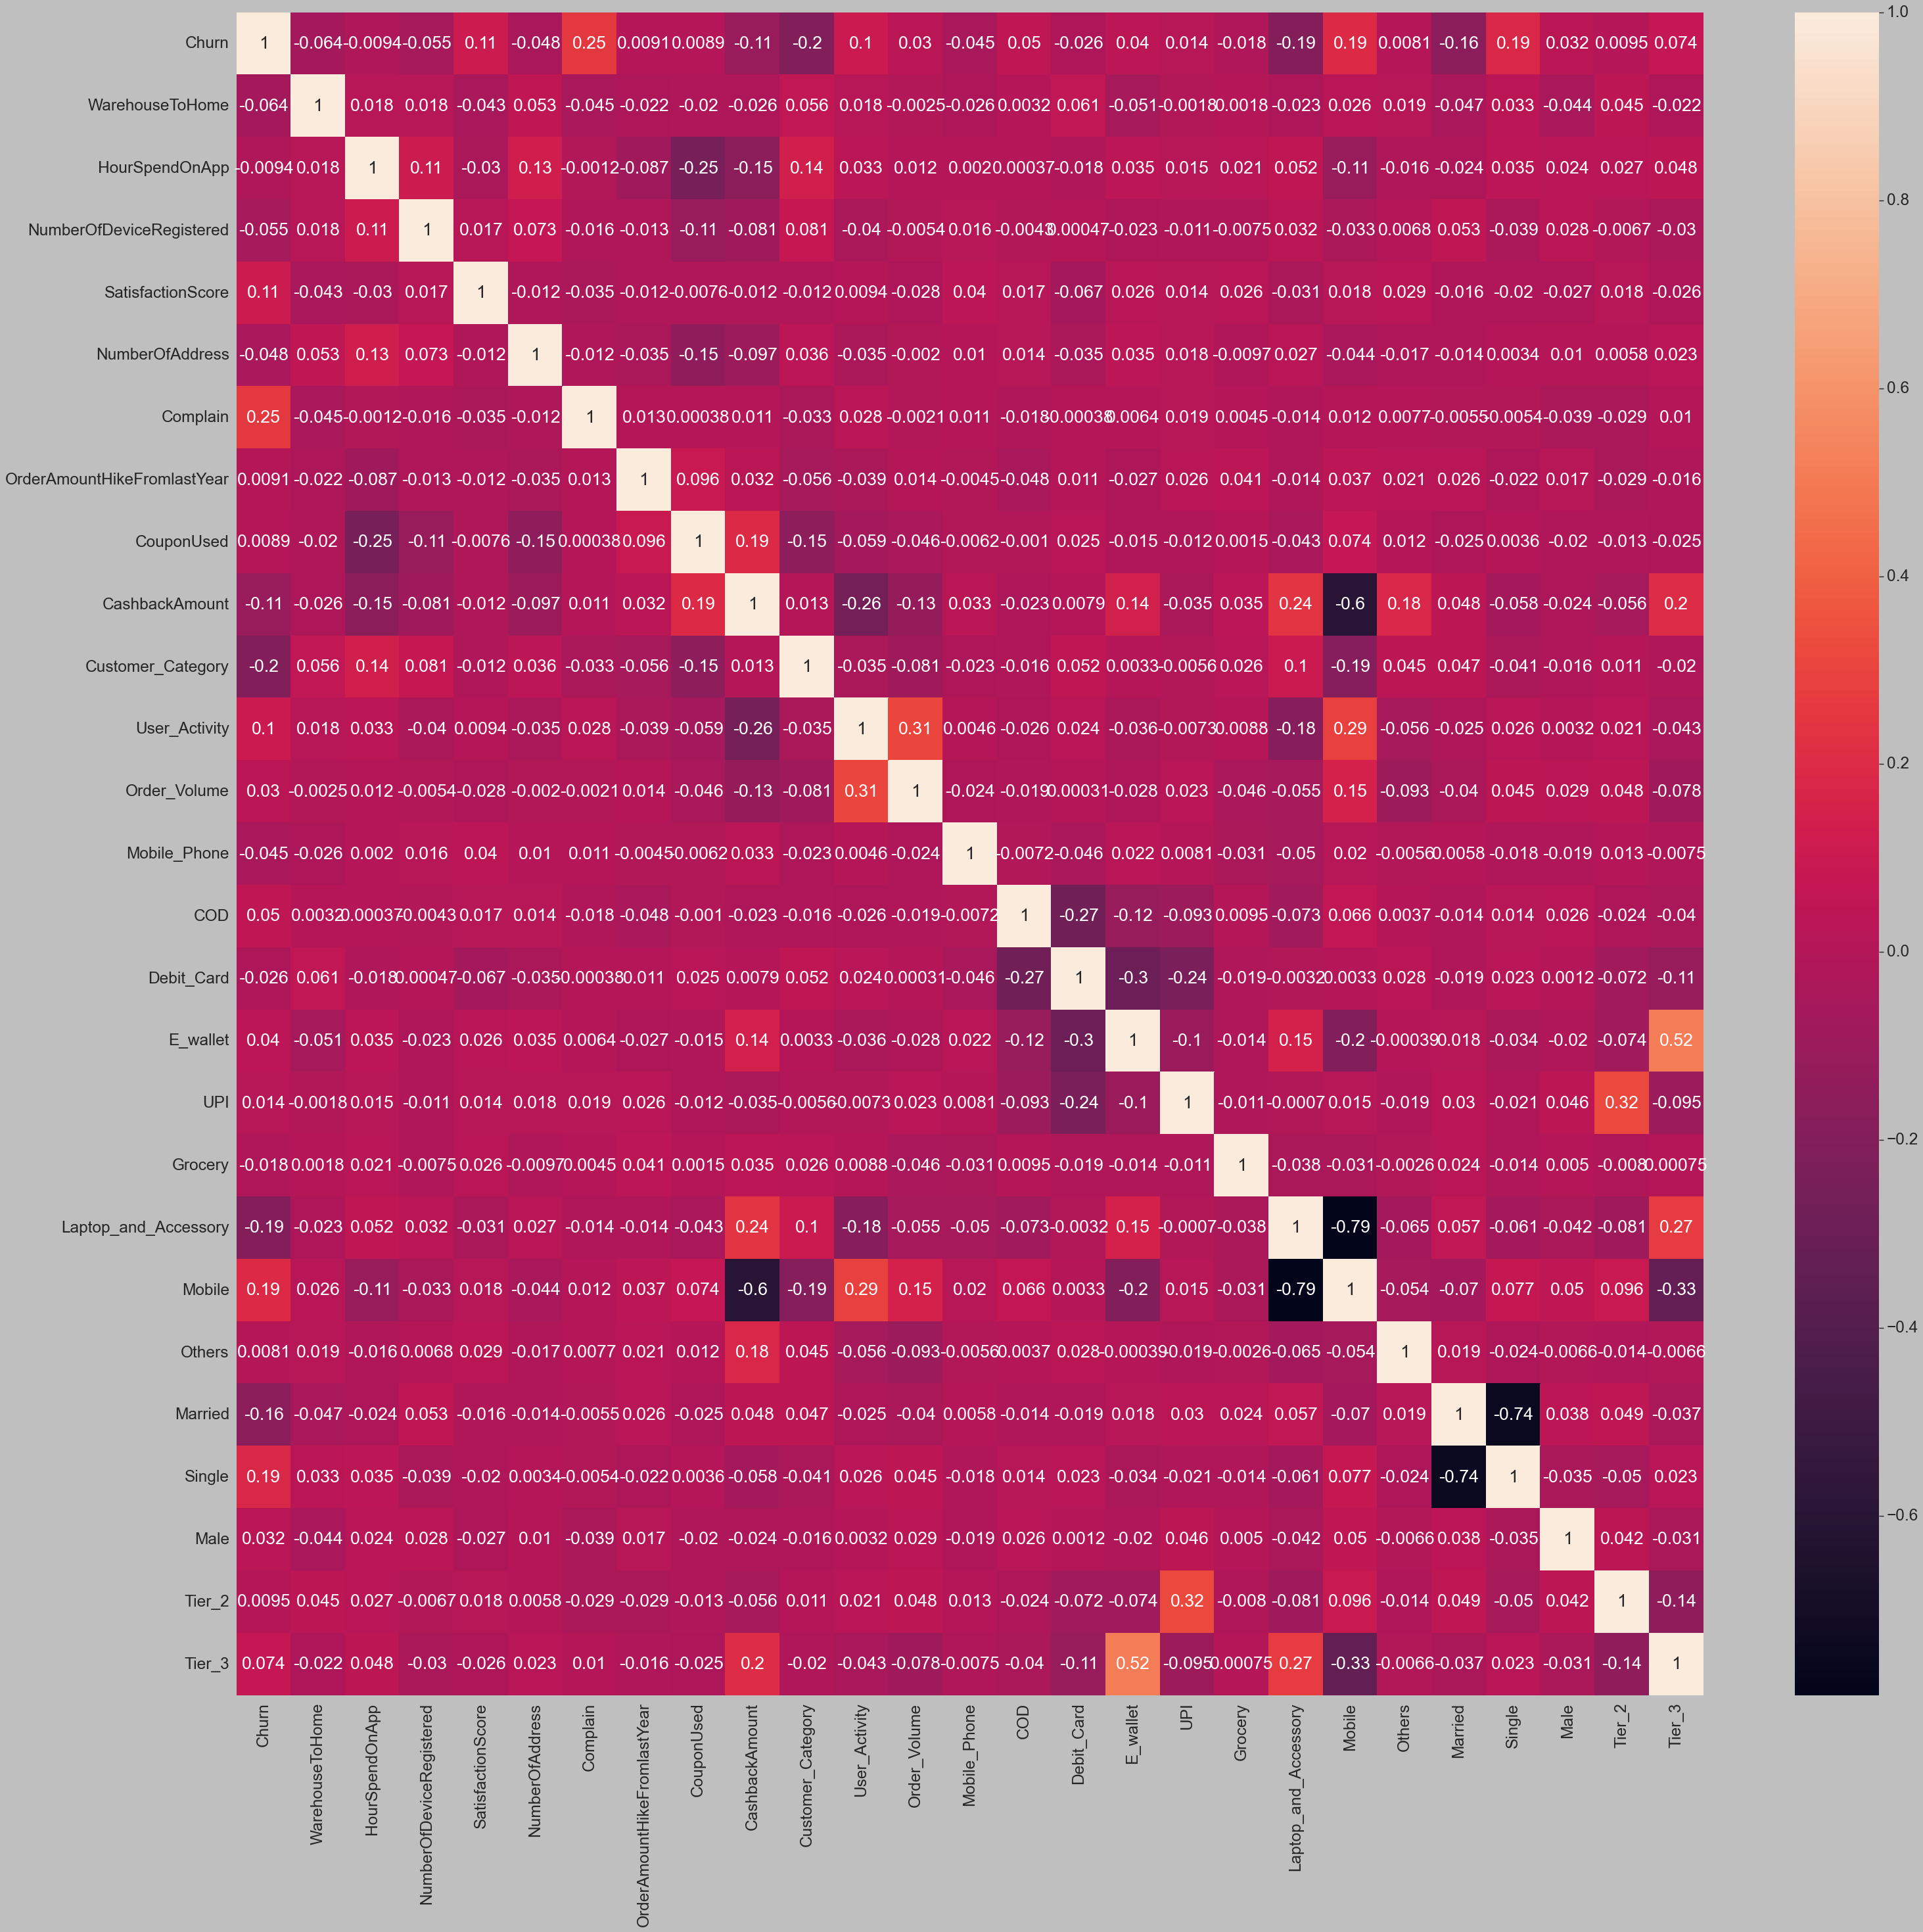

In [1446]:
# construct heatmap with only continuous variables
plt.figure(figsize=(45,40))
sns.set(font_scale=2)
sns.heatmap(churn.corr(), annot=True)

In [1447]:
results_path = 'results.png'
#print(results_path)
plt.savefig(results_path, dpi=400)

<Figure size 640x480 with 0 Axes>

There is hardly any correlation between the variables

### Train Test Split

In [1448]:
from sklearn.model_selection import train_test_split

In [1449]:
#Extract x and y
y = churn['Churn']
X = churn.drop(['Churn'], axis=1)

In [1450]:
X.head()

WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0                1               2                         0   
1                1               2                         0   
2                0               2                         0   
3                0               2                         0   
5                0               2                         0   

   SatisfactionScore  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0                  1                0         1                         11.0   
1                  2                0         1                         15.0   
2                  2                0         1                         14.0   
3                  4                0         0                         23.0   
5                  4                0         1                         22.0   

   CouponUsed  CashbackAmount  Customer_Category  ...  UPI  Grocery  \
0           1          159.93                  0  ...    0        0   
1           0          120.90                  1  ...    1        0   
2           0          120.28                  1  ...    0        0   
3           0          134.07                  1  ...    0        0   
5           1          139.19                  1  ...    0        0   

   Laptop_and_Accessory  Mobile  Others  Married  Single  Male  Tier_2  Tier_3  
0                     1       0       0        0       1     0       0       1  
1                     0       1       0        0       1     1       0       0  
2                     0       1       0        0       1     1       0       0  
3                     1       0       0        0       1     1       0       1  
5                     0       1       0        0       1     0       0       0  

[5 rows x 26 columns]

In [1451]:
y.head()

0    1
1    1
2    1
3    1
5    1
Name: Churn, dtype: int32

In [1452]:
# Encode for string labels
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder().fit(y)
y = pd.DataFrame(label_encoder.transform(y),columns = ["Churn"])

In [1453]:
#split data into 70% training and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state=0)

In [1454]:
# Checking dimensions on the train and test data
print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)
print('X_test: ',X_test.shape)
print('y_test: ',y_test.shape)

X_train:  (2825, 26)
y_train:  (2825, 1)
X_test:  (1212, 26)
y_test:  (1212, 1)


### Balancing The DataSet

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train)

# Get the proportions
y_train['Churn'].value_counts(normalize=True)

### Scaling the variables

In [1455]:
from sklearn.preprocessing import StandardScaler

In [1456]:
#Initialize an object for StandardScaler
sc = StandardScaler()

In [1457]:
#Scale the training data
X_train = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)

In [1458]:
X_train

WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0            1.489141        0.548324                 -0.177196   
1           -0.671528        0.548324                 -0.177196   
2           -0.671528       -1.838449                 -0.177196   
3            1.489141       -1.838449                 -0.177196   
4            1.489141        0.548324                 -0.177196   
...               ...             ...                       ...   
2820        -0.671528        0.548324                 -0.177196   
2821        -0.671528       -1.838449                 -0.177196   
2822        -0.671528        0.548324                  5.643477   
2823        -0.671528       -1.838449                 -0.177196   
2824         1.489141        0.548324                 -0.177196   

      SatisfactionScore  NumberOfAddress  Complain  \
0              1.417236        -0.255409 -0.620873   
1             -0.031540        -0.255409 -0.620873   
2             -0.031540        -0.255409 -0.620873   
3              0.692848        -0.255409 -0.620873   
4              0.692848        -0.255409 -0.620873   
...                 ...              ...       ...   
2820          -0.031540        -0.255409 -0.620873   
2821          -1.480315        -0.255409 -0.620873   
2822          -0.031540        -0.255409 -0.620873   
2823          -0.031540        -0.255409  1.610636   
2824           0.692848        -0.255409 -0.620873   

      OrderAmountHikeFromlastYear  CouponUsed  CashbackAmount  \
0                        0.931920   -2.110372       -0.801065   
1                       -0.179968   -2.110372       -0.555219   
2                        0.931920    0.473850        0.572910   
3                       -0.735913    0.473850        0.325283   
4                        1.765836    0.473850       -2.626202   
...                           ...         ...             ...   
2820                     0.931920   -2.110372       -0.160619   
2821                    -0.735913    0.473850        0.775110   
2822                     0.375976    0.473850       -1.197892   
2823                     0.653948    0.473850        1.243196   
2824                     0.098004    0.473850        1.397741   

      Customer_Category  ...       UPI    Grocery  Laptop_and_Accessory  \
0              0.679864  ... -0.304008  -0.037656              1.012467   
1              0.679864  ... -0.304008  -0.037656              1.012467   
2             -1.470882  ... -0.304008  -0.037656              1.012467   
3              0.679864  ... -0.304008  -0.037656              1.012467   
4              0.679864  ... -0.304008  26.556543             -0.987686   
...                 ...  ...       ...        ...                   ...   
2820           0.679864  ... -0.304008  -0.037656              1.012467   
2821           0.679864  ... -0.304008  -0.037656              1.012467   
2822           0.679864  ... -0.304008  -0.037656              1.012467   
2823           0.679864  ... -0.304008  -0.037656              1.012467   
2824          -1.470882  ... -0.304008  -0.037656              1.012467   

        Mobile    Others   Married    Single      Male    Tier_2    Tier_3  
0    -0.809889 -0.065314 -1.050476 -0.703918  0.808691 -0.210624 -0.698863  
1    -0.809889 -0.065314 -1.050476  1.420620 -1.236566 -0.210624  1.430897  
2    -0.809889 -0.065314  0.951949 -0.703918  0.808691 -0.210624 -0.698863  
3    -0.809889 -0.065314 -1.050476 -0.703918  0.808691 -0.210624  1.430897  
4    -0.809889 -0.065314  0.951949 -0.703918  0.808691 -0.210624  1.430897  
...        ...       ...       ...       ...       ...       ...       ...  
2820 -0.809889 -0.065314  0.951949 -0.703918 -1.236566 -0.210624  1.430897  
2821 -0.809889 -0.065314 -1.050476  1.420620  0.808691 -0.210624  1.430897  
2822 -0.809889 -0.065314  0.951949 -0.703918  0.808691 -0.210624 -0.698863  
2823 -0.809889 -0.065314 -1.050476  1.420620  0.808691 -0.210624 -0.698863  
2824 -0.809889 -0.06531

In [1459]:
# Apply the transformation on the test data
X_test = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [1460]:
X_test

WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0            1.489141        0.548324                 -0.177196   
1            1.489141        0.548324                 -0.177196   
2           -0.671528        0.548324                 -0.177196   
3           -0.671528       -1.838449                 -0.177196   
4           -0.671528       -1.838449                 -0.177196   
...               ...             ...                       ...   
1207         1.489141        0.548324                 -0.177196   
1208        -0.671528        0.548324                 -0.177196   
1209        -0.671528        0.548324                 -0.177196   
1210        -0.671528        0.548324                 -0.177196   
1211        -0.671528       -1.838449                 -0.177196   

      SatisfactionScore  NumberOfAddress  Complain  \
0             -1.480315        -0.255409 -0.620873   
1             -0.755927        -0.255409  1.610636   
2             -1.480315        -0.255409 -0.620873   
3             -1.480315        -0.255409 -0.620873   
4              0.692848        -0.255409 -0.620873   
...                 ...              ...       ...   
1207           0.692848        -0.255409 -0.620873   
1208          -0.031540        -0.255409  1.610636   
1209          -1.480315        -0.255409 -0.620873   
1210           0.692848        -0.255409 -0.620873   
1211           1.417236        -0.255409 -0.620873   

      OrderAmountHikeFromlastYear  CouponUsed  CashbackAmount  \
0                        0.375976   -2.110372       -0.272853   
1                       -0.735913    0.473850        0.216167   
2                       -1.291857   -2.110372       -0.335650   
3                       -0.457940    0.473850        0.034009   
4                        0.931920    0.473850        0.833008   
...                           ...         ...             ...   
1207                     2.043808    0.473850       -0.515135   
1208                    -0.457940   -2.110372        0.311477   
1209                    -1.291857   -2.110372       -0.276416   
1210                    -1.013885    0.473850        0.148915   
1211                    -0.735913    0.473850        1.126063   

      Customer_Category  ...       UPI   Grocery  Laptop_and_Accessory  \
0              0.679864  ... -0.304008 -0.037656              1.012467   
1             -1.470882  ... -0.304008 -0.037656              1.012467   
2              0.679864  ... -0.304008 -0.037656              1.012467   
3              0.679864  ... -0.304008 -0.037656             -0.987686   
4              0.679864  ... -0.304008 -0.037656              1.012467   
...                 ...  ...       ...       ...                   ...   
1207           0.679864  ... -0.304008 -0.037656             -0.987686   
1208           0.679864  ... -0.304008 -0.037656              1.012467   
1209          -1.470882  ... -0.304008 -0.037656              1.012467   
1210           0.679864  ... -0.304008 -0.037656             -0.987686   
1211           0.679864  ... -0.304008 -0.037656              1.012467   

        Mobile    Others   Married    Single      Male    Tier_2    Tier_3  
0    -0.809889 -0.065314  0.951949 -0.703918  0.808691 -0.210624 -0.698863  
1    -0.809889 -0.065314 -1.050476  1.420620  0.808691 -0.210624  1.430897  
2    -0.809889 -0.065314  0.951949 -0.703918 -1.236566 -0.210624  1.430897  
3     1.234737 -0.065314 -1.050476  1.420620 -1.236566 -0.210624 -0.698863  
4    -0.809889 -0.065314  0.951949 -0.703918  0.808691 -0.210624 -0.698863  
...        ...       ...       ...       ...       ...       ...       ...  
1207  1.234737 -0.065314 -1.050476  1.420620 -1.236566 -0.210624 -0.698863  
1208 -0.809889 -0.065314  0.951949 -0.703918  0.808691 -0.210624  1.430897  
1209 -0.809889 -0.065314  0.951949 -0.703918 -1.236566 -0.210624  1.430897  
1210  1.234737 -0.065314  0.951949 -0.703918 -1.236566 -0.210624  1.430897  
1211 -0.809889 -0.065314 -1.050476 

### Basic Models

#### Logistic Regression

In [1461]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [1462]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [1463]:
## Performance Matrix on train data set
y_train_predict = LR_model.predict(X_train)
model_score = LR_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8495575221238938
[[2234   73]
 [ 352  166]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2307
           1       0.69      0.32      0.44       518

    accuracy                           0.85      2825
   macro avg       0.78      0.64      0.68      2825
weighted avg       0.83      0.85      0.83      2825



In [1464]:
from sklearn.metrics import accuracy_score 
lr_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
df
lr_train_acc= accuracy_score(y_train, y_train_predict)
lr_train_precision=round(df.loc["1"][0],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_f1=round(df.loc["1"][2],2)
print ('lr_train_accuracy ',lr_train_acc)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_accuracy  0.8495575221238938
lr_train_precision  0.69
lr_train_recall  0.32
lr_train_f1  0.44


AUC: 0.818


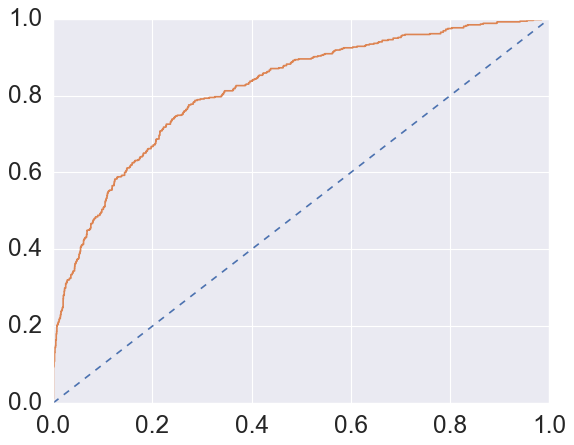

In [1465]:
#AUC and ROC for the training data
# predict probabilities
probs = LR_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr)

In [1466]:
## Performance Matrix on test data set
y_test_predict = LR_model.predict(X_test)
model_score = LR_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8696369636963697
[[991  27]
 [131  63]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      1018
           1       0.70      0.32      0.44       194

    accuracy                           0.87      1212
   macro avg       0.79      0.65      0.68      1212
weighted avg       0.85      0.87      0.85      1212



In [1467]:
from sklearn.metrics import accuracy_score 
lr_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
df
lr_test_acc= accuracy_score(y_test, y_test_predict)
lr_test_precision=round(df.loc["1"][0],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_f1=round(df.loc["1"][2],2)
print ('lr_test_accuracy ',lr_test_acc)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_accuracy  0.8696369636963697
lr_test_precision  0.7
lr_test_recall  0.32
lr_test_f1  0.44


AUC: 0.816


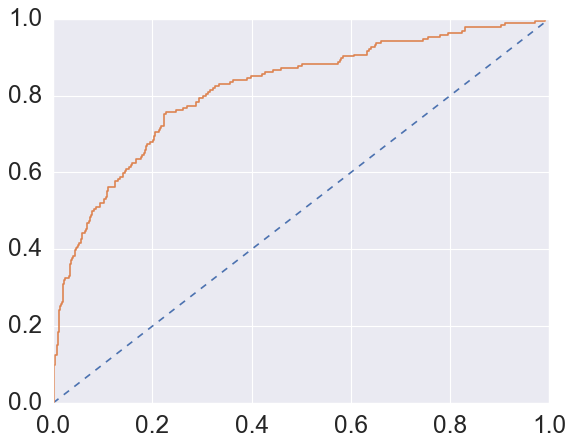

In [1468]:
# AUC and ROC for the test data
# predict probabilities
probs = LR_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
lr_test_fpr, lr_test_tpr, lr_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr)

In [1469]:
#print(LR_model.coef_, LR_model.intercept_)
pd.DataFrame(zip(X_train.columns, np.transpose(LR_model.coef_.tolist()[0])), columns=['features', 'coef']).sort_values('coef', ascending=False)

features      coef
5                      Complain  0.703838
22                       Single  0.413636
3             SatisfactionScore  0.400454
25                       Tier_3  0.380258
10                User_Activity  0.200610
23                         Male  0.188926
15                     E_wallet  0.156216
24                       Tier_2  0.138474
13                          COD  0.053845
20                       Others  0.034782
16                          UPI  0.023661
6   OrderAmountHikeFromlastYear  0.015377
1                HourSpendOnApp  0.003791
14                   Debit_Card -0.009711
7                    CouponUsed -0.033326
11                 Order_Volume -0.037451
21                      Married -0.103345
0               WarehouseToHome -0.123933
12                 Mobile_Phone -0.156196
4               NumberOfAddress -0.179876
19                       Mobile -0.194072
17                      Grocery -0.205825
2      NumberOfDeviceRegistered -0.253140
8                CashbackAmount -0.362791
9             Customer_Category -0.471709
18         Laptop_and_Accessory -0.665344

In [1470]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1]},index=index
       )
round(data,2)

LR Train  LR Test
Accuracy       0.85     0.87
AUC            0.82     0.82
Recall         0.32     0.32
Precision      0.69     0.70
F1 Score       0.44     0.44

### Decision Tree

In [1471]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [1472]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [1473]:
## Performance Matrix on train data set
y_train_predict = dt_model.predict(X_train)
model_score = dt_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[2307    0]
 [   0  518]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2307
           1       1.00      1.00      1.00       518

    accuracy                           1.00      2825
   macro avg       1.00      1.00      1.00      2825
weighted avg       1.00      1.00      1.00      2825



In [1474]:
from sklearn.metrics import accuracy_score 
dt_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(dt_metrics).transpose()
df
dt_train_acc= accuracy_score(y_train, y_train_predict)
dt_train_precision=round(df.loc["1"][0],2)
dt_train_recall=round(df.loc["1"][1],2)
dt_train_f1=round(df.loc["1"][2],2)
print ('dt_train_accuracy ',dt_train_acc)
print ('dt_train_precision ',dt_train_precision)
print ('dt_train_recall ',dt_train_recall)
print ('dt_train_f1 ',dt_train_f1)

dt_train_accuracy  1.0
dt_train_precision  1.0
dt_train_recall  1.0
dt_train_f1  1.0


AUC: 1.000


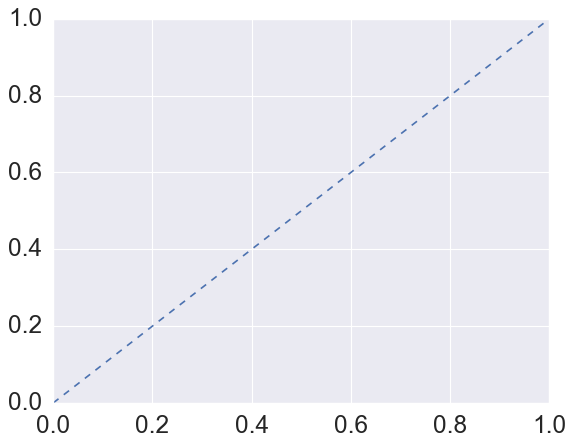

In [1475]:
#AUC and ROC for the training data
# predict probabilities
probs = dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % dt_train_auc)
# calculate roc curve
dt_train_fpr, dt_train_tpr, dt_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_train_fpr, dt_train_tpr)

In [1476]:
## Performance Matrix on test data set
y_test_predict = dt_model.predict(X_test)
model_score = dt_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9265676567656765
[[972  46]
 [ 43 151]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1018
           1       0.77      0.78      0.77       194

    accuracy                           0.93      1212
   macro avg       0.86      0.87      0.86      1212
weighted avg       0.93      0.93      0.93      1212



In [1477]:
from sklearn.metrics import accuracy_score 
dt_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(dt_metrics).transpose()
df
dt_test_acc= accuracy_score(y_test, y_test_predict)
dt_test_precision=round(df.loc["1"][0],2)
dt_test_recall=round(df.loc["1"][1],2)
dt_test_f1=round(df.loc["1"][2],2)
print ('dt_test_accuracy ',dt_test_acc)
print ('dt_test_precision ',dt_test_precision)
print ('dt_test_recall ',dt_test_recall)
print ('dt_test_f1 ',dt_test_f1)

dt_test_accuracy  0.9265676567656765
dt_test_precision  0.77
dt_test_recall  0.78
dt_test_f1  0.77


AUC: 0.867


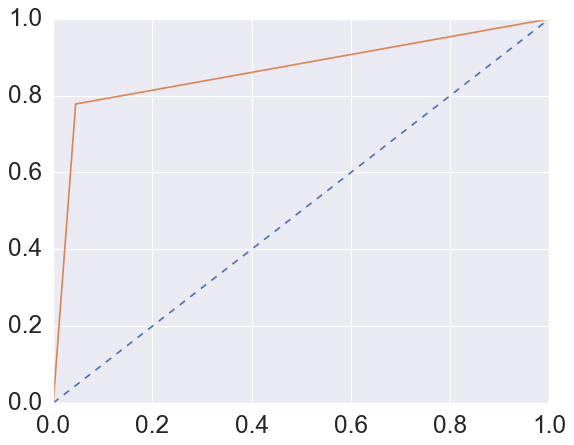

In [1478]:
# AUC and ROC for the test data
# predict probabilities
probs = dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % dt_test_auc)
# calculate roc curve
dt_test_fpr, dt_test_tpr, dt_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_test_fpr, dt_test_tpr)

In [1479]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('G:\greatlearning\Capstone_Project\CC_EC_01 - Customer Churn - E-Commerce\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

In [1480]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

pd.DataFrame({'Variable':X_train.columns,
              'Importance':dt_model.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
8                CashbackAmount    0.250792
6   OrderAmountHikeFromlastYear    0.119579
3             SatisfactionScore    0.085919
5                      Complain    0.067079
19                       Mobile    0.059033
0               WarehouseToHome    0.045019
23                         Male    0.040113
25                       Tier_3    0.035929
9             Customer_Category    0.034142
11                 Order_Volume    0.033134
12                 Mobile_Phone    0.031085
22                       Single    0.029770
16                          UPI    0.029420
14                   Debit_Card    0.024798
13                          COD    0.020540
10                User_Activity    0.018998
15                     E_wallet    0.017453
21                      Married    0.015575
18         Laptop_and_Accessory    0.013273
1                HourSpendOnApp    0.009323
7                    CouponUsed    0.009114
4               NumberOfAddress    0.006913
24                       Tier_2    0.002505
20                       Others    0.000492
2      NumberOfDeviceRegistered    0.000000
17                      Grocery    0.000000

In [1481]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'DT Train':[dt_train_acc,dt_train_auc,dt_train_recall,dt_train_precision,dt_train_f1],
        'DT Test':[dt_test_acc,dt_test_auc,dt_test_recall,dt_test_precision,dt_test_f1]},index=index
       )
round(data,2)

DT Train  DT Test
Accuracy        1.0     0.93
AUC             1.0     0.87
Recall          1.0     0.78
Precision       1.0     0.77
F1 Score        1.0     0.77

In [1482]:
eli5.explain_weights(dt_model,feature_names=list(X_train.columns)) # LR_model is the model fitted 

Explanation(estimator='DecisionTreeClassifier()', description='\nDecision tree feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='decision tree', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='CashbackAmount', weight=0.25079198177019274, std=None, value=None), FeatureWeight(feature='OrderAmountHikeFromlastYear', weight=0.11957904361281757, std=None, value=None), FeatureWeight(feature='SatisfactionScore', weight=0.08591941439851412, std=None, value=None), FeatureWeight(feature='Complain', weight=0.06707864920511754, std=None, value=None), FeatureWeight(feature='Mobile', weight=0.05903333793873538, std=None, value=None), FeatureWeight(feature='WarehouseToHome', weight=0.045019146692023455, std=None, value=None), FeatureWeight(feature='Male', weight=0.04011328276333535, std=None, value=None), FeatureWeight(feature='Tier_3', weight=0.03592882659060279, std=None, value=None), FeatureWeight(feature='Customer_Category', weight=0.03414237820432741, std=None, value=None), FeatureWeight(feature='Order_Volume', weight=0.03313400362619399, std=None, value=None), FeatureWeight(feature='Mobile_Phone', weight=0.03108462911659601, std=None, value=None), FeatureWeight(feature='Single', weight=0.029769629847717104, std=None, value=None), FeatureWeight(feature='UPI', weight=0.029419790590227046, std=None, value=None), FeatureWeight(feature='Debit_Card', weight=0.024798083229556633, std=None, value=None), FeatureWeight(feature='COD', weight=0.02054048915572678, std=None, value=None), FeatureWeight(feature='User_Activity', weight=0.018998478623962728, std=None, value=None), FeatureWeight(feature='E_wallet', weight=0.017453373405555427, std=None, value=None), FeatureWeight(feature='Married', weight=0.015574959861858145, std=None, value=None), FeatureWeight(feature='Laptop_and_Accessory', weight=0.013272787561696081, std=None, value=None), FeatureWeight(feature='HourSpendOnApp', weight=0.009323472524018056, std=None, value=None)], remaining=6), decision_tree=TreeInfo(criterion='gini', tree=NodeInfo(id=0, is_leaf=False, value=[2307.0, 518.0], value_ratio=[0.8166371681415929, 0.18336283185840707], impurity=0.29948180750254527, samples=2825, sample_ratio=1.0, feature_name='Complain', feature_id=5, threshold=0.49488145112991333, left=NodeInfo(id=1, is_leaf=False, value=[1792.0, 247.0], value_ratio=[0.8788621873467386, 0.1211378126532614], impurity=0.2129268859976895, samples=2039, sample_ratio=0.7217699115044248, feature_name='Single', feature_id=22, threshold=0.35835132002830505, left=NodeInfo(id=2, is_leaf=False, value=[1239.0, 116.0], value_ratio=[0.9143911439114392, 0.08560885608856089], impurity=0.15655995969553793, samples=1355, sample_ratio=0.479646017699115, feature_name='CashbackAmount', feature_id=8, threshold=1.6090701222419739, left=NodeInfo(id=3, is_leaf=False, value=[1157.0, 92.0], value_ratio=[0.9263410728582866, 0.07365892714171338], impurity=0.13646657918809024, samples=1249, sample_ratio=0.44212389380530975, feature_name='Tier_2', feature_id=24, threshold=2.268591485917568, left=NodeInfo(id=4, is_leaf=False, value=[1104.0, 79.0], value_ratio=[0.9332206255283179, 0.06677937447168217], impurity=0.12463977923370606, samples=1183, sample_ratio=0.41876106194690266, feature_name='SatisfactionScore', feature_id=3, threshold=1.0550417602062225, left=NodeInfo(id=5, is_leaf=False, value=[904.0, 50.0], value_ratio=[0.9475890985324947, 0.05241090146750524], impurity=0.09932799774973744, samples=954, sample_ratio=0.33769911504424777, feature_name='Debit_Card', feature_id=14, threshold=0.2116677463054657, left=NodeInfo(id=6, is_leaf=False, value=[534.0, 40.0], value_ratio=[0.9303135888501742, 0.06968641114982578], impurity=0.12966043050176645, samples=574, sample_ratio=0.2031858407079646, feature_name='Customer_Category', feature_id=9, threshold=-0.39550888538360596, left=NodeInfo(id=7, is_leaf=False, value=[148.0, 21.0], value_ratio=[0.875

In [1483]:
eli5.explain_prediction(dt_model, X_train.iloc[1], feature_names = list(X_train.columns)) 
# clf is the model fitted 
# X_train.iloc[1] is the record at index 1
# feature_names is the list of column names/features

Explanation(estimator='DecisionTreeClassifier()', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.8166371681415929, std=None, value=1.0), FeatureWeight(feature='E_wallet', weight=0.10416666666666663, std=None, value=-0.3655511022370327), FeatureWeight(feature='Customer_Category', weight=0.074112973350838, std=None, value=0.6798641929907568), FeatureWeight(feature='CashbackAmount', weight=0.06535164748232647, std=None, value=-0.555218891656406), FeatureWeight(feature='Complain', weight=0.06222501920514567, std=None, value=-0.6208728371745278), FeatureWeight(feature='SatisfactionScore', weight=0.06113398796325631, std=None, value=-0.03153970988041458), FeatureWeight(feature='Order_Volume', weight=0.04502164502164496, std=None, value=0.0864256484475479)], neg=[FeatureWeight(feature='Tier_3', weight=-0.11760797342192686, std=None, value=1.4308965513512235), FeatureWeight(feature='Single', weight=-0.07038265518299591, std=None, value=1.4206204254347439), FeatureWeight(feature='User_Activity', weight=-0.040658479226548194, std=None, value=0.7573282507586939)], pos_remaining=0, neg_remaining=0), proba=1.0, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

### RandomForestClassifier

In [1484]:
from sklearn.ensemble import RandomForestClassifier

In [1485]:
rf_model = RandomForestClassifier(n_estimators = 501)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=501)

In [1486]:
## Performance Matrix on train data set
y_train_predict = rf_model.predict(X_train)
model_score = rf_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[2307    0]
 [   0  518]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2307
           1       1.00      1.00      1.00       518

    accuracy                           1.00      2825
   macro avg       1.00      1.00      1.00      2825
weighted avg       1.00      1.00      1.00      2825



In [1487]:
from sklearn.metrics import accuracy_score 
rf_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
df
rf_train_acc= accuracy_score(y_train, y_train_predict)
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_accuracy ',rf_train_acc)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_accuracy  1.0
rf_train_precision  1.0
rf_train_recall  1.0
rf_train_f1  1.0


AUC: 1.000


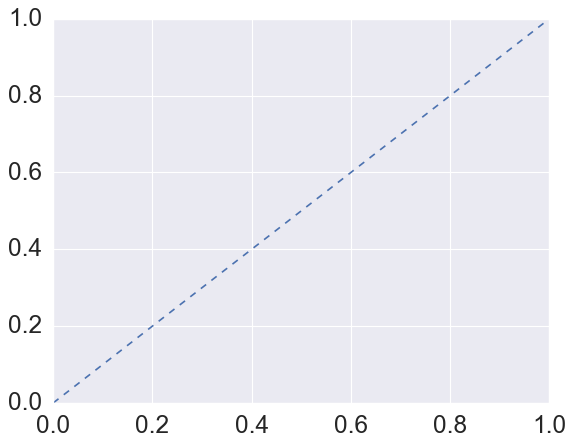

In [1488]:
#AUC and ROC for the training data
# predict probabilities
probs = rf_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr)

In [1489]:
## Performance Matrix on test data set
y_test_predict = rf_model.predict(X_test)
model_score = rf_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9364686468646864
[[1006   12]
 [  65  129]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1018
           1       0.91      0.66      0.77       194

    accuracy                           0.94      1212
   macro avg       0.93      0.83      0.87      1212
weighted avg       0.94      0.94      0.93      1212



In [1490]:
from sklearn.metrics import accuracy_score 
rf_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
df
rf_test_acc= accuracy_score(y_test, y_test_predict)
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('lr_test_accuracy ',rf_test_acc)
print ('lr_test_precision ',rf_test_precision)
print ('lr_test_recall ',rf_test_recall)
print ('lr_test_f1 ',rf_test_f1)

lr_test_accuracy  0.9364686468646864
lr_test_precision  0.91
lr_test_recall  0.66
lr_test_f1  0.77


AUC: 0.979


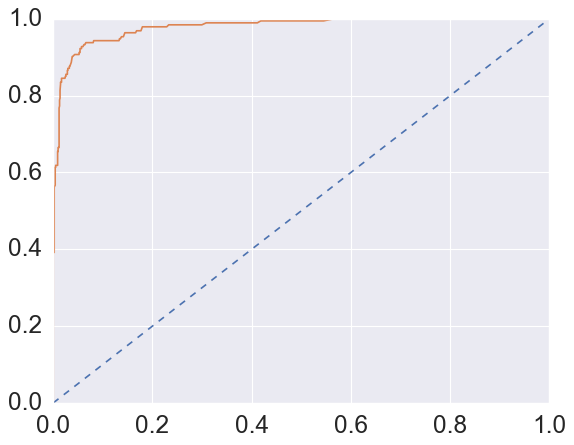

In [1491]:
# AUC and ROC for the test data
# predict probabilities
probs = rf_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rf_test_auc)
# calculate roc curve
rf_test_fpr, rf_test_tpr, rf_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr)

In [1492]:
pd.DataFrame({'Variable':X_train.columns,
              'Importance':rf_model.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
8                CashbackAmount    0.193658
6   OrderAmountHikeFromlastYear    0.125377
3             SatisfactionScore    0.083479
5                      Complain    0.079427
9             Customer_Category    0.045304
22                       Single    0.038748
11                 Order_Volume    0.035350
23                         Male    0.035089
0               WarehouseToHome    0.035059
12                 Mobile_Phone    0.033421
25                       Tier_3    0.031470
14                   Debit_Card    0.030371
10                User_Activity    0.029900
19                       Mobile    0.028579
18         Laptop_and_Accessory    0.028221
1                HourSpendOnApp    0.023317
21                      Married    0.022734
15                     E_wallet    0.020967
13                          COD    0.019100
7                    CouponUsed    0.018882
16                          UPI    0.015580
4               NumberOfAddress    0.010816
24                       Tier_2    0.010687
2      NumberOfDeviceRegistered    0.003206
20                       Others    0.001189
17                      Grocery    0.000069

In [1493]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'RF Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'RF Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1]},index=index
       )
round(data,2)

RF Train  RF Test
Accuracy        1.0     0.94
AUC             1.0     0.98
Recall          1.0     0.66
Precision       1.0     0.91
F1 Score        1.0     0.77

In [1494]:
eli5.explain_weights(rf_model,feature_names=list(X_train.columns)) # LR_model is the model fitted 

Explanation(estimator='RandomForestClassifier(n_estimators=501)', description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='CashbackAmount', weight=0.1936583758567251, std=0.026465031742995488, value=None), FeatureWeight(feature='OrderAmountHikeFromlastYear', weight=0.12537711548034292, std=0.01892796356700793, value=None), FeatureWeight(feature='SatisfactionScore', weight=0.0834787319833349, std=0.015781426805356602, value=None), FeatureWeight(feature='Complain', weight=0.07942677614095268, std=0.017537925572791036, value=None), FeatureWeight(feature='Customer_Category', weight=0.04530432810647422, std=0.012246159921095469, value=None), FeatureWeight(feature='Single', weight=0.03874830923339943, std=0.01256629879032557, value=None), FeatureWeight(feature='Order_Volume', weight=0.03534977535424482, std=0.009552753959052196, value=None), FeatureWeight(feature='Male', weight=0.03508908128885133, std=0.009282957983868034, value=None), FeatureWeight(feature='WarehouseToHome', weight=0.03505895037805089, std=0.009826548219423912, value=None), FeatureWeight(feature='Mobile_Phone', weight=0.033421411978973165, std=0.009558315650867944, value=None), FeatureWeight(feature='Tier_3', weight=0.03146972567561026, std=0.010270830625439662, value=None), FeatureWeight(feature='Debit_Card', weight=0.030370974298567104, std=0.00898055298173426, value=None), FeatureWeight(feature='User_Activity', weight=0.029899943099783024, std=0.008978722031562563, value=None), FeatureWeight(feature='Mobile', weight=0.02857888939358518, std=0.015376430789845586, value=None), FeatureWeight(feature='Laptop_and_Accessory', weight=0.02822146363519891, std=0.013437399814835615, value=None), FeatureWeight(feature='HourSpendOnApp', weight=0.02331663802857261, std=0.007339897551391809, value=None), FeatureWeight(feature='Married', weight=0.022733981805374136, std=0.010319372403354392, value=None), FeatureWeight(feature='E_wallet', weight=0.020967407495074045, std=0.008874125664311774, value=None), FeatureWeight(feature='COD', weight=0.019099589779764566, std=0.006579114440943822, value=None), FeatureWeight(feature='CouponUsed', weight=0.01888154578672775, std=0.0064503177843510005, value=None)], remaining=6), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [1495]:
eli5.explain_prediction(rf_model, X_train.iloc[1], feature_names = list(X_train.columns)) 
# clf is the model fitted 
# X_train.iloc[1] is the record at index 1
# feature_names is the list of column names/features

Explanation(estimator='RandomForestClassifier(n_estimators=501)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.8163806899475389, std=None, value=1.0), FeatureWeight(feature='CashbackAmount', weight=0.051880362982724394, std=None, value=-0.555218891656406), FeatureWeight(feature='WarehouseToHome', weight=0.0469303282791346, std=None, value=-0.6715282419703129), FeatureWeight(feature='Complain', weight=0.045381012631112015, std=None, value=-0.6208728371745278), FeatureWeight(feature='Customer_Category', weight=0.028315760980248544, std=None, value=0.6798641929907568), FeatureWeight(feature='E_wallet', weight=0.028034062652734067, std=None, value=-0.3655511022370327), FeatureWeight(feature='Laptop_and_Accessory', weight=0.025308157539484757, std=None, value=1.0124670887168465), FeatureWeight(feature='Mobile', weight=0.022951026105242207, std=None, value=-0.8098890549698189), FeatureWeight(feature='Debit_Card', weight=0.021067743877212063, std=None, value=1.233823905008907), FeatureWeight(feature='Male', weight=0.015348059343021506, std=None, value=-1.2365661293682622), FeatureWeight(feature='SatisfactionScore', weight=0.0109485221052505, std=None, value=-0.03153970988041458), FeatureWeight(feature='Order_Volume', weight=0.00912431935986557, std=None, value=0.0864256484475479), FeatureWeight(feature='COD', weight=0.005342345367095355, std=None, value=-0.3244111072546255), FeatureWeight(feature='OrderAmountHikeFromlastYear', weight=0.004179695164075367, std=None, value=-0.17996844891391725), FeatureWeight(feature='Mobile_Phone', weight=0.0031914743971131012, std=None, value=0.6428114834861389), FeatureWeight(feature='UPI', weight=0.0016466958215784456, std=None, value=-0.3040077745576462)], neg=[FeatureWeight(feature='Tier_3', weight=-0.057021339755315974, std=None, value=1.4308965513512235), FeatureWeight(feature='Single', weight=-0.048707109714120074, std=None, value=1.4206204254347439), FeatureWeight(feature='User_Activity', weight=-0.03415770398664137, std=None, value=0.7573282507586939), FeatureWeight(feature='CouponUsed', weight=-0.029312303976308133, std=None, value=-2.1103715202939872), FeatureWeight(feature='Married', weight=-0.01757094674000392, std=None, value=-1.0504759053396613), FeatureWeight(feature='NumberOfAddress', weight=-0.00324322429850399, std=None, value=-0.2554090558731642), FeatureWeight(feature='HourSpendOnApp', weight=-0.0024278807671347176, std=None, value=0.5483241941811313), FeatureWeight(feature='NumberOfDeviceRegistered', weight=-0.0011692456411608568, std=None, value=-0.17719571257495778), FeatureWeight(feature='Tier_2', weight=-0.0003016907027522873, std=None, value=-0.21062357904982057), FeatureWeight(feature='Others', weight=-2.4968438981508292e-06, std=None, value=-0.0653139

#### Linear Discriminant Analysis

In [1496]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [1497]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8502654867256637
[[2230   77]
 [ 346  172]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2307
           1       0.69      0.33      0.45       518

    accuracy                           0.85      2825
   macro avg       0.78      0.65      0.68      2825
weighted avg       0.83      0.85      0.83      2825



In [1498]:
from sklearn.metrics import accuracy_score 
lda_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
df
lda_train_acc= accuracy_score(y_train, y_train_predict)
lda_train_precision=round(df.loc["1"][0],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_f1=round(df.loc["1"][2],2)
print ('lda_train_acc ',lda_train_acc)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_acc  0.8502654867256637
lda_train_precision  0.69
lda_train_recall  0.33
lda_train_f1  0.45


AUC: 0.813


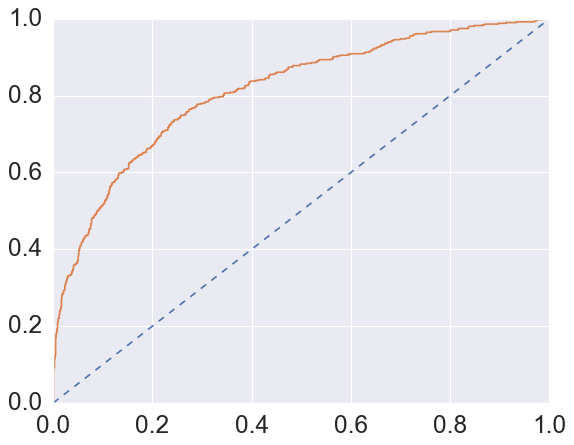

In [1499]:
#AUC and ROC for the training data
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr)

In [1500]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8696369636963697
[[986  32]
 [126  68]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1018
           1       0.68      0.35      0.46       194

    accuracy                           0.87      1212
   macro avg       0.78      0.66      0.69      1212
weighted avg       0.85      0.87      0.85      1212



In [1501]:
from sklearn.metrics import accuracy_score 
lda_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
df
lda_test_acc= accuracy_score(y_test, y_test_predict)
lda_test_precision=round(df.loc["1"][0],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_f1=round(df.loc["1"][2],2)
print ('lda_test_acc ',lda_test_acc)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_acc  0.8696369636963697
lda_test_precision  0.68
lda_test_recall  0.35
lda_test_f1  0.46


AUC: 0.817


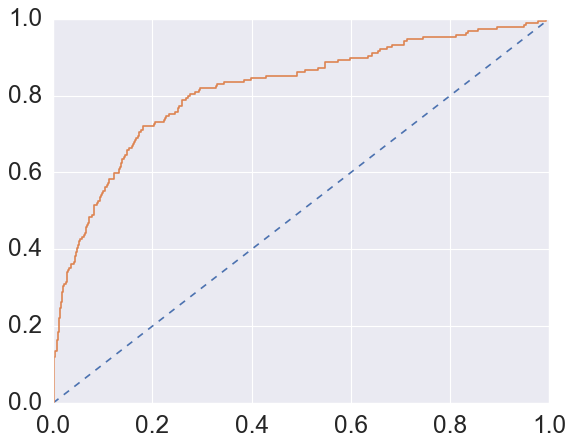

In [1502]:
# AUC and ROC for the test data
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)

In [1503]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=LDA_model).fit(X, y)

In [1504]:
selected_feat= X_train.columns[(selector.get_support())]
len(selected_feat)

9

In [1505]:
print(selected_feat)

Index(['NumberOfAddress', 'Complain', 'Customer_Category', 'COD', 'Grocery',
       'Laptop_and_Accessory', 'Others', 'Single', 'Tier_3'],
      dtype='object')


In [1506]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1]},index=index
       )
round(data,2)

LDA Train  LDA Test
Accuracy        0.85      0.87
AUC             0.81      0.82
Recall          0.33      0.35
Precision       0.69      0.68
F1 Score        0.45      0.46

#### KNN Model

In [1507]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [1508]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9111504424778761
[[2255   52]
 [ 199  319]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2307
           1       0.86      0.62      0.72       518

    accuracy                           0.91      2825
   macro avg       0.89      0.80      0.83      2825
weighted avg       0.91      0.91      0.91      2825



In [1509]:
from sklearn.metrics import accuracy_score 
knn_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
df
knn_train_acc= accuracy_score(y_train, y_train_predict)
knn_train_precision=round(df.loc["1"][0],2)
knn_train_recall=round(df.loc["1"][1],2)
knn_train_f1=round(df.loc["1"][2],2)
print ('knn_train_acc ',knn_train_acc)
print ('knn_train_precision ',knn_train_precision)
print ('knn_train_recall ',knn_train_recall)
print ('knn_train_f1 ',knn_train_f1)

knn_train_acc  0.9111504424778761
knn_train_precision  0.86
knn_train_recall  0.62
knn_train_f1  0.72


AUC: 0.960


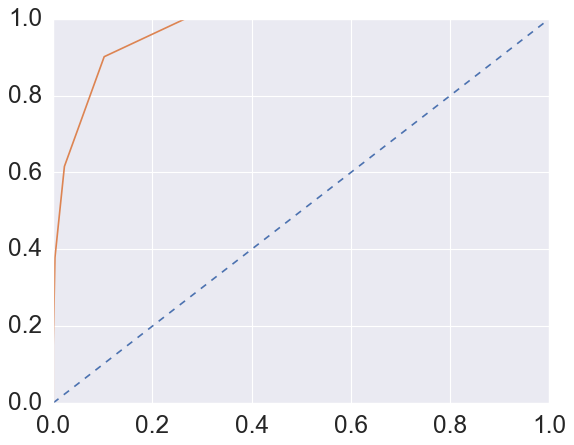

In [1510]:
#AUC and ROC for the training data
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr)

In [1511]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8737623762376238
[[978  40]
 [113  81]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1018
           1       0.67      0.42      0.51       194

    accuracy                           0.87      1212
   macro avg       0.78      0.69      0.72      1212
weighted avg       0.86      0.87      0.86      1212



In [1512]:
from sklearn.metrics import accuracy_score 
knn_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
df
knn_test_acc= accuracy_score(y_test, y_test_predict)
knn_test_precision=round(df.loc["1"][0],2)
knn_test_recall=round(df.loc["1"][1],2)
knn_test_f1=round(df.loc["1"][2],2)
print ('knn_test_acc ',knn_test_acc)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)

knn_test_acc  0.8737623762376238
knn_test_precision  0.67
knn_test_recall  0.42
knn_test_f1  0.51


AUC: 0.860


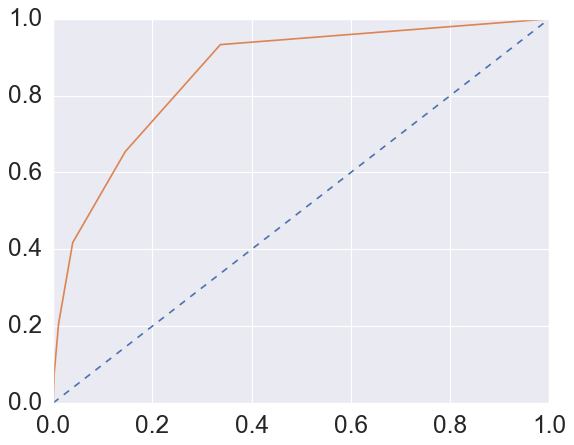

In [1513]:
# AUC and ROC for the test data
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr)

In [1514]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'KNN Train':[knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1]},index=index
       )
round(data,2)

KNN Train  KNN Test
Accuracy        0.91      0.87
AUC             0.96      0.86
Recall          0.62      0.42
Precision       0.86      0.67
F1 Score        0.72      0.51

#### Naive Bayes Model

In [1515]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [1516]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [1517]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.22194690265486725
[[ 115 2192]
 [   6  512]]
              precision    recall  f1-score   support

           0       0.95      0.05      0.09      2307
           1       0.19      0.99      0.32       518

    accuracy                           0.22      2825
   macro avg       0.57      0.52      0.21      2825
weighted avg       0.81      0.22      0.14      2825



In [1518]:
from sklearn.metrics import accuracy_score 
nb_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
df
nb_train_acc= accuracy_score(y_train, y_train_predict)
nb_train_precision=round(df.loc["1"][0],2)
nb_train_recall=round(df.loc["1"][1],2)
nb_train_f1=round(df.loc["1"][2],2)
print ('nb_train_acc ',nb_train_acc)
print ('nb_train_precision ',nb_train_precision)
print ('nb_train_recall ',nb_train_recall)
print ('nb_train_f1 ',nb_train_f1)

nb_train_acc  0.22194690265486725
nb_train_precision  0.19
nb_train_recall  0.99
nb_train_f1  0.32


AUC: 0.771


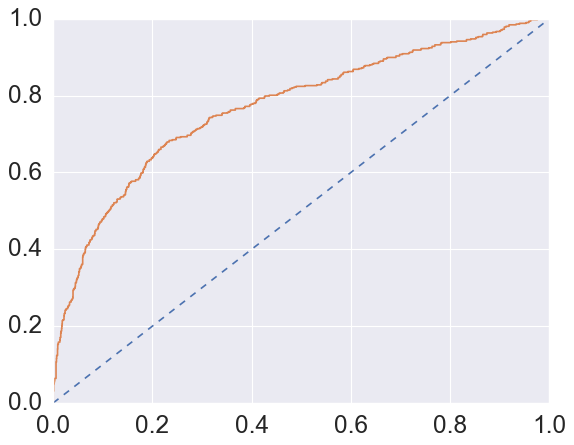

In [1519]:
#AUC and ROC for the training data
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % nb_train_auc)
# calculate roc curve
nb_train_fpr, nb_train_tpr, nb_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_train_fpr, nb_train_tpr)

In [1520]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.2070957095709571
[[ 67 951]
 [ 10 184]]
              precision    recall  f1-score   support

           0       0.87      0.07      0.12      1018
           1       0.16      0.95      0.28       194

    accuracy                           0.21      1212
   macro avg       0.52      0.51      0.20      1212
weighted avg       0.76      0.21      0.15      1212



In [1521]:
from sklearn.metrics import accuracy_score 
nb_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
df
nb_test_acc= accuracy_score(y_test, y_test_predict)
nb_test_precision=round(df.loc["1"][0],2)
nb_test_recall=round(df.loc["1"][1],2)
nb_test_f1=round(df.loc["1"][2],2)
print ('nb_test_acc ',nb_test_acc)
print ('nb_test_precision ',nb_test_precision)
print ('nb_test_recall ',nb_test_recall)
print ('nb_test_f1 ',nb_test_f1)

nb_test_acc  0.2070957095709571
nb_test_precision  0.16
nb_test_recall  0.95
nb_test_f1  0.28


AUC: 0.743


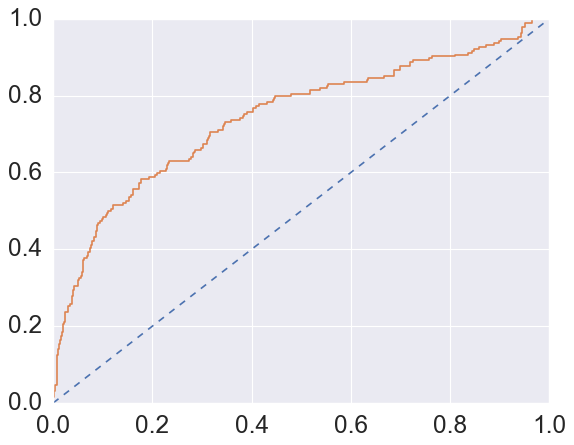

In [1522]:
# AUC and ROC for the test data
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % nb_test_auc)
# calculate roc curve
nb_test_fpr, nb_test_tpr, nb_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_test_fpr, nb_test_tpr)

In [1523]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'nb Train':[nb_train_acc,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
        'nb Test':[nb_test_acc,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1]},index=index
       )
round(data,2)

nb Train  nb Test
Accuracy       0.22     0.21
AUC            0.77     0.74
Recall         0.99     0.95
Precision      0.19     0.16
F1 Score       0.32     0.28

#### SVM 

In [1524]:
from sklearn import svm

SVM_model= svm.SVC(random_state=1,probability=True)
SVM_model.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [1525]:
## Performance Matrix on train data set
y_train_predict = SVM_model.predict(X_train)
model_score = SVM_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8973451327433628
[[2294   13]
 [ 277  241]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2307
           1       0.95      0.47      0.62       518

    accuracy                           0.90      2825
   macro avg       0.92      0.73      0.78      2825
weighted avg       0.90      0.90      0.88      2825



In [1526]:
from sklearn.metrics import accuracy_score 
svm_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(svm_metrics).transpose()
df
svm_train_acc= accuracy_score(y_train, y_train_predict)
svm_train_precision=round(df.loc["1"][0],2)
svm_train_recall=round(df.loc["1"][1],2)
svm_train_f1=round(df.loc["1"][2],2)
print ('svm_train_acc ',svm_train_acc)
print ('svm_train_precision ',svm_train_precision)
print ('svm_train_recall ',svm_train_recall)
print ('svm_train_f1 ',svm_train_f1)

svm_train_acc  0.8973451327433628
svm_train_precision  0.95
svm_train_recall  0.47
svm_train_f1  0.62


AUC: 0.938


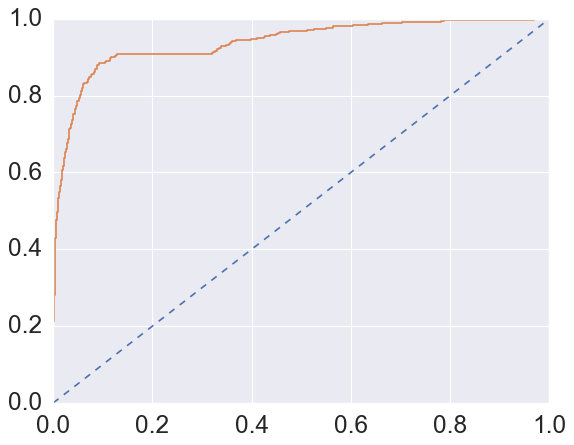

In [1527]:
#AUC and ROC for the training data
# predict probabilities
probs = SVM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % svm_train_auc)
# calculate roc curve
svm_train_fpr, svm_train_tpr, svm_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svm_train_fpr, svm_train_tpr)

In [1528]:
## Performance Matrix on test data set
y_test_predict = SVM_model.predict(X_test)
model_score = SVM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8828382838283828
[[1005   13]
 [ 129   65]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.93      1018
           1       0.83      0.34      0.48       194

    accuracy                           0.88      1212
   macro avg       0.86      0.66      0.71      1212
weighted avg       0.88      0.88      0.86      1212



In [1529]:
from sklearn.metrics import accuracy_score 
svm_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(svm_metrics).transpose()
df
svm_test_acc= accuracy_score(y_test, y_test_predict)
svm_test_precision=round(df.loc["1"][0],2)
svm_test_recall=round(df.loc["1"][1],2)
svm_test_f1=round(df.loc["1"][2],2)
print ('svm_test_acc ',svm_test_acc)
print ('svm_test_precision ',svm_test_precision)
print ('svm_test_recall ',svm_test_recall)
print ('svm_test_f1 ',svm_test_f1)

svm_test_acc  0.8828382838283828
svm_test_precision  0.83
svm_test_recall  0.34
svm_test_f1  0.48


AUC: 0.880


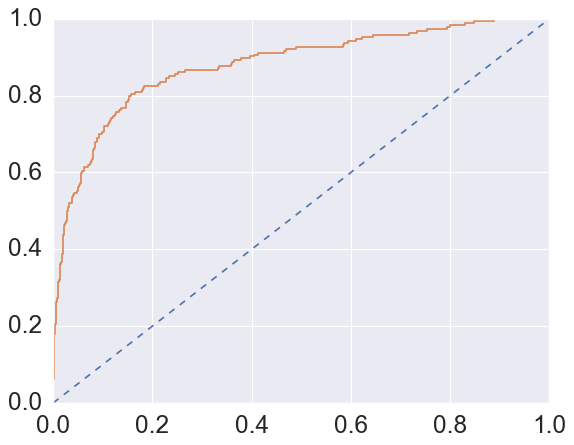

In [1530]:
# AUC and ROC for the test data
# predict probabilities
probs = SVM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % svm_test_auc)
# calculate roc curve
svm_test_fpr, svm_test_tpr, svm_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svm_test_fpr, svm_test_tpr)

In [1531]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'svm Train':[svm_train_acc,svm_train_auc,svm_train_recall,svm_train_precision,svm_train_f1],
        'svm Test':[svm_test_acc,svm_test_auc,svm_test_recall,svm_test_precision,svm_test_f1]},index=index
       )
round(data,2)

svm Train  svm Test
Accuracy        0.90      0.88
AUC             0.94      0.88
Recall          0.47      0.34
Precision       0.95      0.83
F1 Score        0.62      0.48

### Neural Network

In [1532]:
from sklearn.neural_network import MLPClassifier

In [1533]:
ann_model = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)
ann_model.fit(X_train, y_train)

Iteration 1, loss = 0.71616980
Iteration 2, loss = 0.63245368
Iteration 3, loss = 0.56583466
Iteration 4, loss = 0.52707127
Iteration 5, loss = 0.50386867
Iteration 6, loss = 0.48841791
Iteration 7, loss = 0.47724455
Iteration 8, loss = 0.46877213
Iteration 9, loss = 0.46187906
Iteration 10, loss = 0.45624127
Iteration 11, loss = 0.45112664
Iteration 12, loss = 0.44664378
Iteration 13, loss = 0.44230689
Iteration 14, loss = 0.43829811
Iteration 15, loss = 0.43484686
Iteration 16, loss = 0.43130222
Iteration 17, loss = 0.42819919
Iteration 18, loss = 0.42530485
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=21,
              solver='sgd', tol=0.01, verbose=True)

In [1534]:
## Performance Matrix on train data set
y_train_predict = ann_model.predict(X_train)
model_score = ann_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8261946902654868
[[2300    7]
 [ 484   34]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      2307
           1       0.83      0.07      0.12       518

    accuracy                           0.83      2825
   macro avg       0.83      0.53      0.51      2825
weighted avg       0.83      0.83      0.76      2825



In [1535]:
from sklearn.metrics import accuracy_score 
ann_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(ann_metrics).transpose()
df
ann_train_acc= accuracy_score(y_train, y_train_predict)
ann_train_precision=round(df.loc["1"][0],2)
ann_train_recall=round(df.loc["1"][1],2)
ann_train_f1=round(df.loc["1"][2],2)
print ('ann_train_acc ',ann_train_acc)
print ('ann_train_precision ',ann_train_precision)
print ('ann_train_recall ',ann_train_recall)
print ('ann_train_f1 ',ann_train_f1)

ann_train_acc  0.8261946902654868
ann_train_precision  0.83
ann_train_recall  0.07
ann_train_f1  0.12


AUC: 0.743


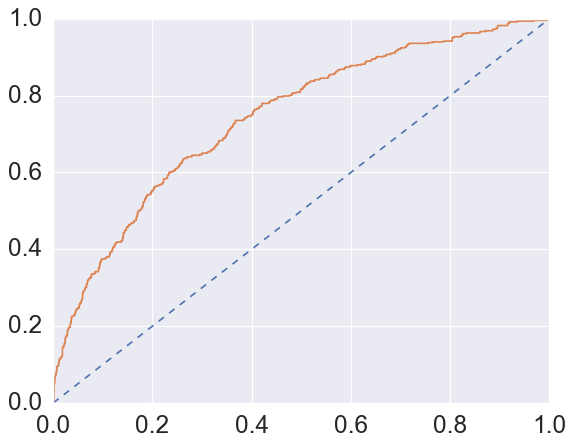

In [1536]:
#AUC and ROC for the training data
# predict probabilities
probs = ann_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ann_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ann_train_auc)
# calculate roc curve
ann_train_fpr, ann_train_tpr, ann_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_train_fpr, ann_train_tpr)

In [1537]:
## Performance Matrix on test data set
y_test_predict = ann_model.predict(X_test)
model_score = ann_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8424092409240924
[[1015    3]
 [ 188    6]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1018
           1       0.67      0.03      0.06       194

    accuracy                           0.84      1212
   macro avg       0.76      0.51      0.49      1212
weighted avg       0.82      0.84      0.78      1212



In [1538]:
from sklearn.metrics import accuracy_score 
ann_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(ann_metrics).transpose()
df
ann_test_acc= accuracy_score(y_test, y_test_predict)
ann_test_precision=round(df.loc["1"][0],2)
ann_test_recall=round(df.loc["1"][1],2)
ann_test_f1=round(df.loc["1"][2],2)
print ('ann_test_acc ',ann_test_acc)
print ('ann_test_precision ',ann_test_precision)
print ('ann_test_recall ',ann_test_recall)
print ('ann_test_f1 ',ann_test_f1)

ann_test_acc  0.8424092409240924
ann_test_precision  0.67
ann_test_recall  0.03
ann_test_f1  0.06


AUC: 0.716


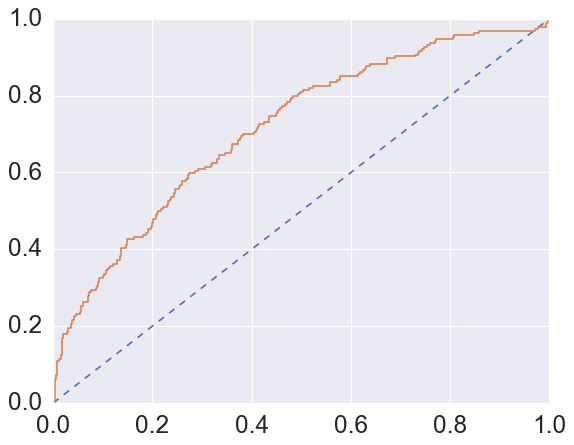

In [1539]:
# AUC and ROC for the test data
# predict probabilities
probs = ann_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ann_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ann_test_auc)
# calculate roc curve
ann_test_fpr, ann_test_tpr, ann_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_test_fpr, ann_test_tpr)

In [1540]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'ANN Train':[ann_train_acc,ann_train_auc,ann_train_recall,ann_train_precision,ann_train_f1],
        'ANN Test':[ann_test_acc,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_f1]},index=index
       )
round(data,2)

ANN Train  ANN Test
Accuracy        0.83      0.84
AUC             0.74      0.72
Recall          0.07      0.03
Precision       0.83      0.67
F1 Score        0.12      0.06

#### Basic Bagging and Boosting Models

#### Bagging

In [1541]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(random_state=1)
Bagging_model=BaggingClassifier(base_estimator=RF_model,n_estimators=50,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=50, random_state=1)

In [1542]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9904424778761062
[[2307    0]
 [  27  491]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2307
           1       1.00      0.95      0.97       518

    accuracy                           0.99      2825
   macro avg       0.99      0.97      0.98      2825
weighted avg       0.99      0.99      0.99      2825



In [1543]:
from sklearn.metrics import accuracy_score 
bag_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(bag_metrics).transpose()
df
bag_train_acc= accuracy_score(y_train, y_train_predict)
bag_train_precision=round(df.loc["1"][0],2)
bag_train_recall=round(df.loc["1"][1],2)
bag_train_f1=round(df.loc["1"][2],2)
print ('bag_train_acc ',bag_train_acc)
print ('bag_train_precision ',bag_train_precision)
print ('bag_train_recall ',bag_train_recall)
print ('bag_train_f1 ',bag_train_f1)

bag_train_acc  0.9904424778761062
bag_train_precision  1.0
bag_train_recall  0.95
bag_train_f1  0.97


AUC: 1.000


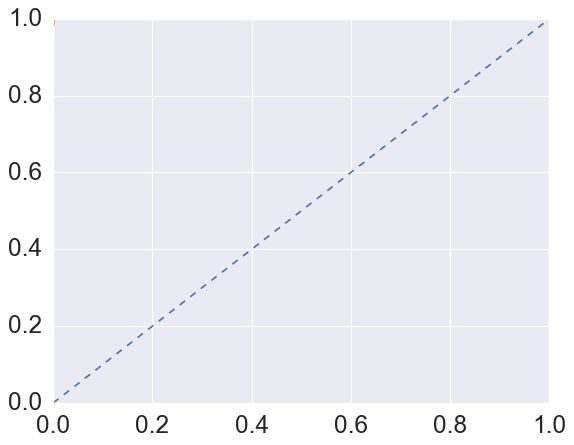

In [1544]:
#AUC and ROC for the training data
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % bag_train_auc)
# calculate roc curve
bag_train_fpr, bag_train_tpr, bag_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_train_fpr, bag_train_tpr)

In [1545]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9216171617161716
[[1012    6]
 [  89  105]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1018
           1       0.95      0.54      0.69       194

    accuracy                           0.92      1212
   macro avg       0.93      0.77      0.82      1212
weighted avg       0.92      0.92      0.91      1212



In [1546]:
from sklearn.metrics import accuracy_score 
bag_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(bag_metrics).transpose()
df
bag_test_acc= accuracy_score(y_test, y_test_predict)
bag_test_precision=round(df.loc["1"][0],2)
bag_test_recall=round(df.loc["1"][1],2)
bag_test_f1=round(df.loc["1"][2],2)
print ('bag_test_acc ',bag_test_acc)
print ('bag_test_precision ',bag_test_precision)
print ('bag_test_recall ',bag_test_recall)
print ('bag_test_f1 ',bag_test_f1)

bag_test_acc  0.9216171617161716
bag_test_precision  0.95
bag_test_recall  0.54
bag_test_f1  0.69


AUC: 0.968


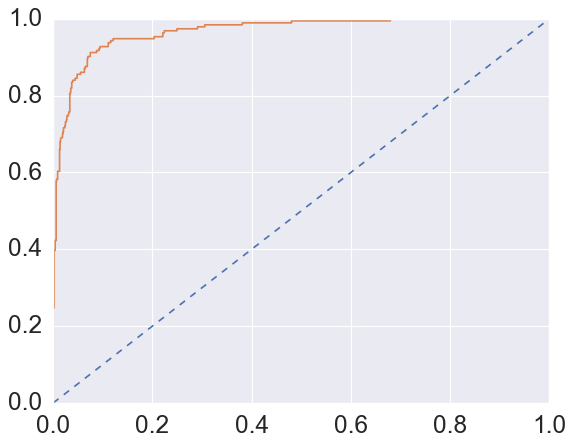

In [1547]:
# AUC and ROC for the test data
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % bag_test_auc)
# calculate roc curve
bag_test_fpr, bag_test_tpr, bag_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_test_fpr, bag_test_tpr)

In [1548]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'bag Train':[bag_train_acc,bag_train_auc,bag_train_recall,bag_train_precision,bag_train_f1],
        'bag Test':[bag_test_acc,bag_test_auc,bag_test_recall,bag_test_precision,bag_test_f1]},index=index
       )
round(data,2)

bag Train  bag Test
Accuracy        0.99      0.92
AUC             1.00      0.97
Recall          0.95      0.54
Precision       1.00      0.95
F1 Score        0.97      0.69

#### Ada Boost

In [1549]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=50,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [1550]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8552212389380531
[[2232   75]
 [ 334  184]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2307
           1       0.71      0.36      0.47       518

    accuracy                           0.86      2825
   macro avg       0.79      0.66      0.69      2825
weighted avg       0.84      0.86      0.83      2825



In [1551]:
from sklearn.metrics import accuracy_score 
adb_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(adb_metrics).transpose()
df
adb_train_acc= accuracy_score(y_train, y_train_predict)
adb_train_precision=round(df.loc["1"][0],2)
adb_train_recall=round(df.loc["1"][1],2)
adb_train_f1=round(df.loc["1"][2],2)
print ('adb_train_acc ',adb_train_acc)
print ('adb_train_precision ',adb_train_precision)
print ('adb_train_recall ',adb_train_recall)
print ('adb_train_f1 ',adb_train_f1)


adb_train_acc  0.8552212389380531
adb_train_precision  0.71
adb_train_recall  0.36
adb_train_f1  0.47


AUC: 0.841


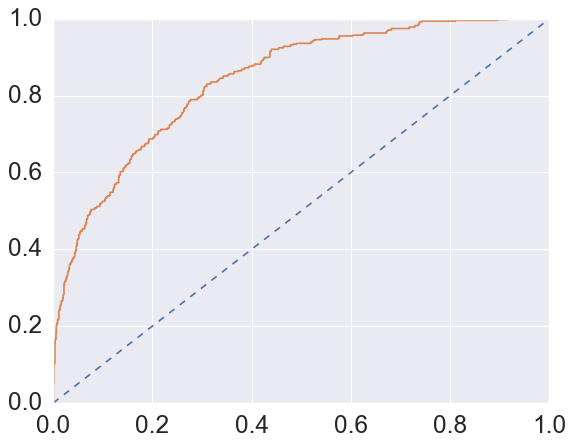

In [1552]:
#AUC and ROC for the training data
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % adb_train_auc)
# calculate roc curve
adb_train_fpr, adb_train_tpr, adb_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_train_fpr, adb_train_tpr)

In [1553]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8663366336633663
[[982  36]
 [126  68]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1018
           1       0.65      0.35      0.46       194

    accuracy                           0.87      1212
   macro avg       0.77      0.66      0.69      1212
weighted avg       0.85      0.87      0.85      1212



In [1554]:
from sklearn.metrics import accuracy_score 
adb_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(adb_metrics).transpose()
df
adb_test_acc= accuracy_score(y_test, y_test_predict)
adb_test_precision=round(df.loc["1"][0],2)
adb_test_recall=round(df.loc["1"][1],2)
adb_test_f1=round(df.loc["1"][2],2)
print ('adb_test_acc ',adb_test_acc)
print ('adb_test_precision ',adb_test_precision)
print ('adb_test_recall ',adb_test_recall)
print ('adb_test_f1 ',adb_test_f1)

adb_test_acc  0.8663366336633663
adb_test_precision  0.65
adb_test_recall  0.35
adb_test_f1  0.46


AUC: 0.824


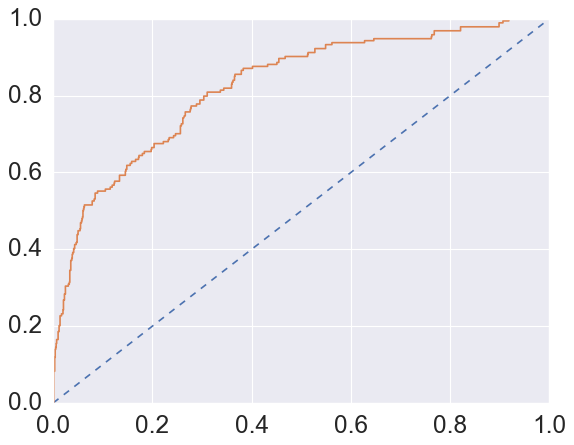

In [1555]:
# AUC and ROC for the test data
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % adb_test_auc)
# calculate roc curve
adb_test_fpr, adb_test_tpr, adb_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_test_fpr, adb_test_tpr)

In [1556]:
pd.DataFrame({'Variable':X_train.columns,
              'Importance':ADB_model.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
8                CashbackAmount        0.52
6   OrderAmountHikeFromlastYear        0.10
25                       Tier_3        0.04
3             SatisfactionScore        0.04
5                      Complain        0.04
9             Customer_Category        0.04
14                   Debit_Card        0.02
24                       Tier_2        0.02
23                         Male        0.02
22                       Single        0.02
19                       Mobile        0.02
18         Laptop_and_Accessory        0.02
0               WarehouseToHome        0.02
12                 Mobile_Phone        0.02
10                User_Activity        0.02
4               NumberOfAddress        0.02
2      NumberOfDeviceRegistered        0.02
1                HourSpendOnApp        0.00
15                     E_wallet        0.00
16                          UPI        0.00
17                      Grocery        0.00
11                 Order_Volume        0.00
20                       Others        0.00
21                      Married        0.00
7                    CouponUsed        0.00
13                          COD        0.00

In [1557]:
eli5.explain_weights(ADB_model,feature_names=list(X_train.columns)) # LR_model is the model fitted 

Explanation(estimator='AdaBoostClassifier(random_state=1)', description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='CashbackAmount', weight=0.52, std=0.4995998398718719, value=None), FeatureWeight(feature='OrderAmountHikeFromlastYear', weight=0.1, std=0.2999999999999999, value=None), FeatureWeight(feature='Tier_3', weight=0.04, std=0.19595917942265434, value=None), FeatureWeight(feature='SatisfactionScore', weight=0.04, std=0.19595917942265434, value=None), FeatureWeight(feature='Complain', weight=0.04, std=0.19595917942265437, value=None), FeatureWeight(feature='Customer_Category', weight=0.04, std=0.19595917942265434, value=None), FeatureWeight(feature='NumberOfAddress', weight=0.02, std=0.13999999999999987, value=None), FeatureWeight(feature='User_Activity', weight=0.02, std=0.13999999999999987, value=None), FeatureWeight(feature='Debit_Card', weight=0.02, std=0.13999999999999987, value=None), FeatureWeight(feature='WarehouseToHome', weight=0.02, std=0.13999999999999987, value=None), FeatureWeight(feature='Mobile_Phone', weight=0.02, std=0.1399999999999999, value=None), FeatureWeight(feature='Tier_2', weight=0.02, std=0.13999999999999996, value=None), FeatureWeight(feature='Male', weight=0.02, std=0.13999999999999987, value=None), FeatureWeight(feature='Single', weight=0.02, std=0.13999999999999985, value=None), FeatureWeight(feature='Mobile', weight=0.02, std=0.13999999999999999, value=None), FeatureWeight(feature='Laptop_and_Accessory', weight=0.02, std=0.13999999999999985, value=None), FeatureWeight(feature='NumberOfDeviceRegistered', weight=0.02, std=0.13999999999999987, value=None), FeatureWeight(feature='UPI', weight=0.0, std=0.0, value=None), FeatureWeight(feature='Married', weight=0.0, std=0.0, value=None), FeatureWeight(feature='Others', weight=0.0, std=0.0, value=None)], remaining=6), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [1558]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'AdaBoost Train':[adb_train_acc,adb_train_auc,adb_train_recall,adb_train_precision,adb_train_f1],
        'AdBoost Test':[adb_test_acc,adb_test_auc,adb_test_recall,adb_test_precision,adb_test_f1]},index=index
       )
round(data,2)

AdaBoost Train  AdBoost Test
Accuracy             0.86          0.87
AUC                  0.84          0.82
Recall               0.36          0.35
Precision            0.71          0.65
F1 Score             0.47          0.46

#### XGBoost

In [1559]:
##!pip install xgboost

In [1560]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier(n_estimators=50,random_state=1)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1561]:
## Performance Matrix on train data set
y_train_predict = XGB_model.predict(X_train)
model_score = XGB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9915044247787611
[[2306    1]
 [  23  495]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2307
           1       1.00      0.96      0.98       518

    accuracy                           0.99      2825
   macro avg       0.99      0.98      0.99      2825
weighted avg       0.99      0.99      0.99      2825



In [1562]:
from sklearn.metrics import accuracy_score 
xgb_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(xgb_metrics).transpose()
df
xgb_train_acc= accuracy_score(y_train, y_train_predict)
xgb_train_precision=round(df.loc["1"][0],2)
xgb_train_recall=round(df.loc["1"][1],2)
xgb_train_f1=round(df.loc["1"][2],2)
print ('xgb_train_acc ',xgb_train_acc)
print ('xgb_train_precision ',xgb_train_precision)
print ('xgb_train_recall ',xgb_train_recall)
print ('xgb_train_f1 ',xgb_train_f1)

xgb_train_acc  0.9915044247787611
xgb_train_precision  1.0
xgb_train_recall  0.96
xgb_train_f1  0.98


AUC: 0.999


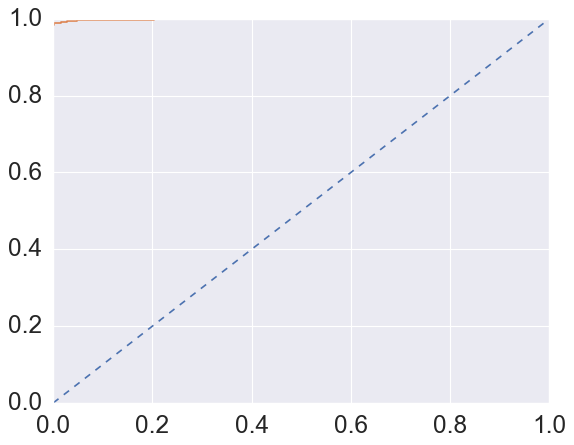

In [1563]:
#AUC and ROC for the training data
# predict probabilities
probs = XGB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % xgb_train_auc)
# calculate roc curve
xgb_train_fpr, xgb_train_tpr, xgb_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_train_fpr, xgb_train_tpr)

In [1564]:
## Performance Matrix on test data set
y_test_predict = XGB_model.predict(X_test)
model_score = XGB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9438943894389439
[[1001   17]
 [  51  143]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1018
           1       0.89      0.74      0.81       194

    accuracy                           0.94      1212
   macro avg       0.92      0.86      0.89      1212
weighted avg       0.94      0.94      0.94      1212



In [1565]:
from sklearn.metrics import accuracy_score 
xgb_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(xgb_metrics).transpose()
df
xgb_test_acc= accuracy_score(y_test, y_test_predict)
xgb_test_precision=round(df.loc["1"][0],2)
xgb_test_recall=round(df.loc["1"][1],2)
xgb_test_f1=round(df.loc["1"][2],2)
print ('xgb_test_acc ',xgb_test_acc)
print ('xgb_test_precision ',xgb_test_precision)
print ('xgb_test_recall ',xgb_test_recall)
print ('xgb_test_f1 ',xgb_test_f1)

xgb_test_acc  0.9438943894389439
xgb_test_precision  0.89
xgb_test_recall  0.74
xgb_test_f1  0.81


AUC: 0.960


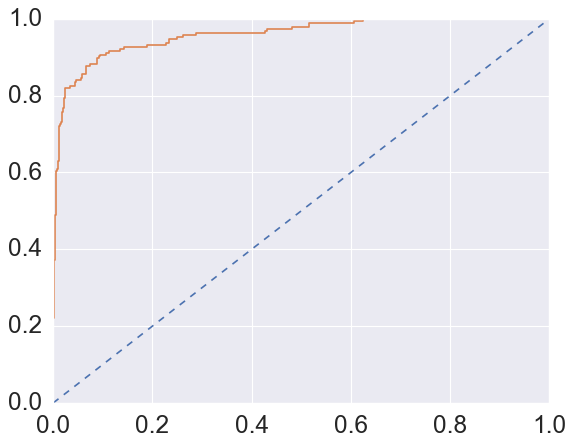

In [1566]:
# AUC and ROC for the test data
# predict probabilities
probs = XGB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % xgb_test_auc)
# calculate roc curve
xgb_test_fpr, xgb_test_tpr, xgb_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_test_fpr, xgb_test_tpr)

In [1567]:
pd.DataFrame({'Variable':X_train.columns,
              'Importance':XGB_model.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
19                       Mobile    0.190269
5                      Complain    0.106682
21                      Married    0.058205
22                       Single    0.052594
9             Customer_Category    0.045488
7                    CouponUsed    0.041966
24                       Tier_2    0.038336
25                       Tier_3    0.036843
15                     E_wallet    0.032187
16                          UPI    0.031763
13                          COD    0.031542
3             SatisfactionScore    0.030950
11                 Order_Volume    0.029225
0               WarehouseToHome    0.029199
23                         Male    0.028962
18         Laptop_and_Accessory    0.028073
10                User_Activity    0.028025
8                CashbackAmount    0.025692
4               NumberOfAddress    0.024924
14                   Debit_Card    0.024574
6   OrderAmountHikeFromlastYear    0.023245
12                 Mobile_Phone    0.023014
1                HourSpendOnApp    0.020972
2      NumberOfDeviceRegistered    0.017269
17                      Grocery    0.000000
20                       Others    0.000000

In [1568]:
eli5.explain_weights(XGB_model,feature_names=list(X_train.columns)) # LR_model is the model fitted 

Explanation(estimator="XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,\n              importance_type='gain', interaction_constraints='',\n              learning_rate=0.300000012, max_delta_step=0, max_depth=6,\n              min_child_weight=1, missing=nan, monotone_constraints='()',\n              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=1,\n              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,\n              tree_method='exact', validate_parameters=1, verbosity=None)", description='\nXGBoost feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Mobile', weight=0.19026914, std=None, value=None), FeatureWeight(feature='Complain', weight=0.10668158, std=None, value=None), FeatureWeight(feature='Married', weight=0.058205374, std=None, value=None), FeatureWeight(feature='Single', weight=0.0525944, std=None, value=None), FeatureWeight(feature='Customer_Category', weight=0.04548756, std=None, value=None), FeatureWeight(feature='CouponUsed', weight=0.041966103, std=None, value=None), FeatureWeight(feature='Tier_2', weight=0.03833621, std=None, value=None), FeatureWeight(feature='Tier_3', weight=0.03684314, std=None, value=None), FeatureWeight(feature='E_wallet', weight=0.03218652, std=None, value=None), FeatureWeight(feature='UPI', weight=0.031763148, std=None, value=None), FeatureWeight(feature='COD', weight=0.03154208, std=None, value=None), FeatureWeight(feature='SatisfactionScore', weight=0.030950496, std=None, value=None), FeatureWeight(feature='Order_Volume', weight=0.029224966, std=None, value=None), FeatureWeight(feature='WarehouseToHome', weight=0.02919919, std=None, value=None), FeatureWeight(feature='Male', weight=0.028961848, std=None, value=None), FeatureWeight(feature='Laptop_and_Accessory', weight=0.028072786, std=None, value=None), FeatureWeight(feature='User_Activity', weight=0.02802528, std=None, value=None), FeatureWeight(feature='CashbackAmount', weight=0.025692238, std=None, value=None), FeatureWeight(feature='NumberOfAddress', weight=0.024923805, std=None, value=None), FeatureWeight(feature='Debit_Card', weight=0.024574261, std=None, value=None)], remaining=6), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [1569]:
eli5.explain_prediction(XGB_model, X_train.iloc[1], feature_names = list(X_train.columns)) 
# clf is the model fitted 
# X_train.iloc[1] is the record at index 1
# feature_names is the list of column names/features

Explanation(estimator="XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,\n              importance_type='gain', interaction_constraints='',\n              learning_rate=0.300000012, max_delta_step=0, max_depth=6,\n              min_child_weight=1, missing=nan, monotone_constraints='()',\n              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=1,\n              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,\n              tree_method='exact', validate_parameters=1, verbosity=None)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=1.8202658951757653, std=None, value=1.0), FeatureWeight(feature='Complain', weight=0.5193218717748604, std=None, value=-0.6208728371745278), FeatureWeight(feature='CashbackAmount', weight=0.4830432043599218, std=None, value=-0.555218891656406), FeatureWeight(feature='Customer_Category', weight=0.46160923931846115, std=None, value=0.6798641929907568), FeatureWeight(feature='WarehouseToHome', weight=0.3071528982437479, std=None, value=-0.6715282419703129), FeatureWeight(feature='Laptop_and_Accessory', weight=0.3023198545440101, std=None, value=1.0124670887168465), FeatureWeight(feature='Mobile_Phone', weight=0.14916351637994194, std=None, value=0.6428114834861389), FeatureWeight(feature='Male', weight=0.14166260890532406, std=None, value=-1.2365661293682622), FeatureWeight(feature='Mobile', weight=0.061966116120351813, std=None, value=-0.8098890549698189), FeatureWeight(feature='E_wallet', weight=0.05231021856566431, std=None, value=-0.3655511022370327), FeatureWeight(feature='UPI', weight=0.033853355683295866, std=None, value=-0.3040077745576462), FeatureWeight(feature='COD', weight=0.029180444555144458, std=None, value=-0.3244111072546255), FeatureWeight(feature='Order_Volume', weight=0.006345670298766892, std=None, value=0.0864256484475479)], neg=[FeatureWeight(feature='Single', weight=-0.6420404670115455, std=None, value=1.4206204254347439), FeatureWeight(feature='CouponUsed', weight=-0.5902915132908182, std=None, value=-2.1103715202939872), FeatureWeight(feature='Tier_3', weight=-0.36798727415852767, std=None, value=1.4308965513512235), FeatureWeight(feature='OrderAmountHikeFromlastYear', weight=-0.36458515924049495, std=None, value=-0.17996844891391725), FeatureWeight(feature='User_Activity', weight=-0.3456466101064137, std=None, value=0.7573282507586939), FeatureWeight(feature='Debit_Card', weight=-0.23838609218868434, std=None, value=1.233823905008907), FeatureWeight(feature='SatisfactionScore', weight=-0.15553106022702912, std=None, value=-0.03153970988041458), FeatureWeight(feature='Married', weight=-0.08424818696091856, std=None, value=-1.0504759053396613), 

In [1570]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'XGBoost Train':[xgb_train_acc,xgb_train_auc,xgb_train_recall,xgb_train_precision,xgb_train_f1],
        'XGBoost Test':[xgb_test_acc,xgb_test_auc,xgb_test_recall,xgb_test_precision,xgb_test_f1]},index=index
       )
round(data,2)

XGBoost Train  XGBoost Test
Accuracy            0.99          0.94
AUC                 1.00          0.96
Recall              0.96          0.74
Precision           1.00          0.89
F1 Score            0.98          0.81

### Comparisson of basic models

In [1571]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
        'DT Train':[dt_train_acc,dt_train_auc,dt_train_recall,dt_train_precision,dt_train_f1],
        'DT Test':[dt_test_acc,dt_test_auc,dt_test_recall,dt_test_precision,dt_test_f1],
        'RF Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'RF Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
        'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
       'KNN Train':[knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
        'NB Train':[nb_train_acc,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
        'NB Test':[nb_test_acc,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],
        'SVM Train':[svm_train_acc,svm_train_auc,svm_train_recall,svm_train_precision,svm_train_f1],
        'SVM Test':[svm_test_acc,svm_test_auc,svm_test_recall,svm_test_precision,svm_test_f1],
        'ANN Train':[ann_train_acc,ann_train_auc,ann_train_recall,ann_train_precision,ann_train_f1],
        'ANN Test':[ann_test_acc,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_f1],             
        'Bag Train':[bag_train_acc,bag_train_auc,bag_train_recall,bag_train_precision,bag_train_f1],
        'Bag Test':[bag_test_acc,bag_test_auc,bag_test_recall,bag_test_precision,bag_test_f1],
        'ADB Train':[adb_train_acc,adb_train_auc,adb_train_recall,adb_train_precision,adb_train_f1],
        'ADB Test':[adb_test_acc,adb_test_auc,adb_test_recall,adb_test_precision,adb_test_f1],
        'XGB Train':[xgb_train_acc,xgb_train_auc,xgb_train_recall,xgb_train_precision,xgb_train_f1],
        'XGB Test':[xgb_test_acc,xgb_test_auc,xgb_test_recall,xgb_test_precision,xgb_test_f1]},index=index
       )
round(data,2)

LR Train  LR Test  DT Train  DT Test  RF Train  RF Test  LDA Train  \
Accuracy       0.85     0.87       1.0     0.93       1.0     0.94       0.85   
AUC            0.82     0.82       1.0     0.87       1.0     0.98       0.81   
Recall         0.32     0.32       1.0     0.78       1.0     0.66       0.33   
Precision      0.69     0.70       1.0     0.77       1.0     0.91       0.69   
F1 Score       0.44     0.44       1.0     0.77       1.0     0.77       0.45   

           LDA Test  KNN Train  KNN Test  ...  SVM Train  SVM Test  ANN Train  \
Accuracy       0.87       0.91      0.87  ...       0.90      0.88       0.83   
AUC            0.82       0.96      0.86  ...       0.94      0.88       0.74   
Recall         0.35       0.62      0.42  ...       0.47      0.34       0.07   
Precision      0.68       0.86      0.67  ...       0.95      0.83       0.83   
F1 Score       0.46       0.72      0.51  ...       0.62      0.48       0.12   

           ANN Test  Bag Train  Bag Test  ADB Train  ADB Test  XGB Train  \
Accuracy       0.84       0.99      0.92       0.86      0.87       0.99   
AUC            0.72       1.00      0.97       0.84      0.82       1.00   
Recall         0.03       0.95      0.54       0.36      0.35       0.96   
Precision      0.67       1.00      0.95       0.71      0.65       1.00   
F1 Score       0.06       0.97      0.69       0.47      0.46       0.98   

           XGB Test  
Accuracy       0.94  
AUC            0.96  
Recall         0.74  
Precision      0.89  
F1 Score       0.81  

[5 rows x 22 columns]

In [1572]:
data.to_excel('basic_model_comparisson.xlsx',index=False)

### ROC Curve for all the basic models on the Training data

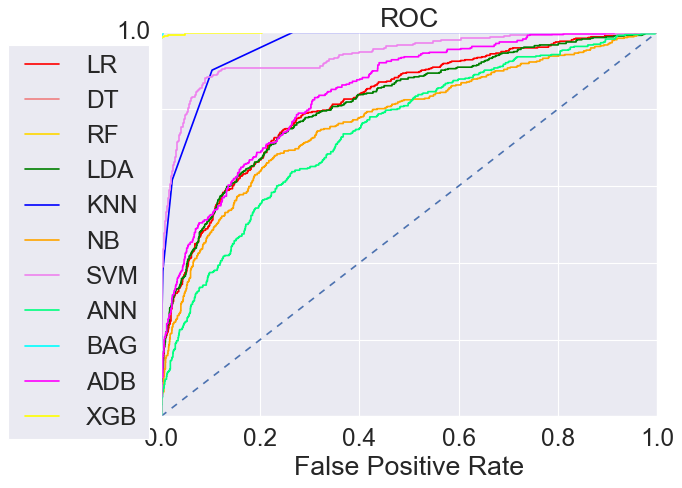

In [1573]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_train_fpr, lr_train_tpr,color='red',label="LR")
plt.plot(dt_train_fpr, dt_train_tpr,color='lightcoral',label="DT")
plt.plot(rf_train_fpr, rf_train_tpr,color='gold',label="RF")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")
plt.plot(knn_train_fpr,knn_train_tpr,color='blue',label="KNN")
plt.plot(nb_train_fpr,nb_train_tpr,color='orange',label="NB")
plt.plot(svm_train_fpr,svm_train_tpr,color='violet',label="SVM")
plt.plot(ann_train_fpr,ann_train_tpr,color='springgreen',label="ANN")
plt.plot(bag_train_fpr,bag_train_tpr,color='cyan',label="BAG")
plt.plot(adb_train_fpr,adb_train_tpr,color='magenta',label="ADB")
plt.plot(xgb_train_fpr,xgb_train_tpr,color='yellow',label="XGB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.), loc='best')

### ROC Curve for all the basic models on the Test data

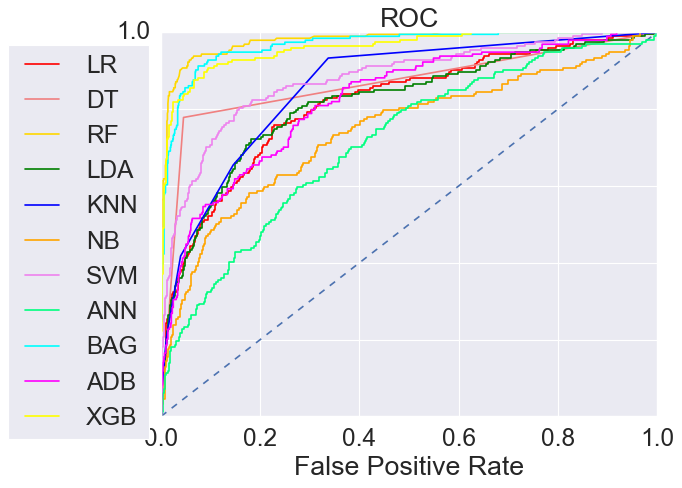

In [1574]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr,color='red',label="LR")
plt.plot(dt_test_fpr, dt_test_tpr,color='lightcoral',label="DT")
plt.plot(rf_test_fpr, rf_test_tpr,color='gold',label="RF")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LDA")
plt.plot(knn_test_fpr,knn_test_tpr,color='blue',label="KNN")
plt.plot(nb_test_fpr,nb_test_tpr,color='orange',label="NB")
plt.plot(svm_test_fpr,svm_test_tpr,color='violet',label="SVM")
plt.plot(ann_test_fpr,ann_test_tpr,color='springgreen',label="ANN")
plt.plot(bag_test_fpr,bag_test_tpr,color='cyan',label="BAG")
plt.plot(adb_test_fpr,adb_test_tpr,color='magenta',label="ADB")
plt.plot(xgb_test_fpr,xgb_test_tpr,color='yellow',label="XGB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.), loc='best')

### Model Tuninig

In [1709]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#### Logistic Regression

In [1807]:
X_train_fs = X_train[['WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'CashbackAmount',
       'Customer_Category', 'User_Activity', 'Order_Volume', 'Mobile_Phone',
       'COD', 'Debit_Card', 'E_wallet', 'UPI', 'Grocery',
       'Laptop_and_Accessory', 'Mobile', 'Others', 'Married', 'Single', 'Male',
       'Tier_2', 'Tier_3']]

X_test_fs = X_test[['WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'CashbackAmount',
       'Customer_Category', 'User_Activity', 'Order_Volume', 'Mobile_Phone',
       'COD', 'Debit_Card', 'E_wallet', 'UPI', 'Grocery',
       'Laptop_and_Accessory', 'Mobile', 'Others', 'Married', 'Single', 'Male',
       'Tier_2', 'Tier_3']]

In [1808]:
# LogisticRegression Parameters tunning 
LRM = LogisticRegression(random_state = 1)

## Search grid for optimal parameters
lr_param_grid = {"penalty" : ["l2","l1"],
              "tol" : [0.001,0.01,0.001],
              "max_iter": [10,20],
              "C" :[1,2,5],
              "intercept_scaling": [7,10,15],
              "solver":['liblinear']}


gsLRM = GridSearchCV(LRM, param_grid = lr_param_grid, scoring="recall", n_jobs= 7, verbose = 1, cv = 5)

In [1809]:
# Fit the Logistic Regression model
#lr_model = LogisticRegression(solver='liblinear',max_iter=100,verbose=True,n_jobs=1)
#model = LogisticRegression()
gsLRM.fit(X_train_fs, y_train)
lr_model_tun = gsLRM.best_estimator_
lr_model_tun

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done 278 tasks      | elapsed:    1.3s
[Parallel(n_jobs=7)]: Done 540 out of 540 | elapsed:    2.2s finished


LogisticRegression(C=1, intercept_scaling=7, max_iter=10, random_state=1,
                   solver='liblinear', tol=0.01)

In [1810]:
## Performance Matrix on train data set
y_train_predict = lr_model_tun.predict(X_train_fs)
model_score = lr_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8509734513274336
[[2238   69]
 [ 352  166]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2307
           1       0.71      0.32      0.44       518

    accuracy                           0.85      2825
   macro avg       0.79      0.65      0.68      2825
weighted avg       0.84      0.85      0.83      2825



In [1811]:
lr_tuned_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(lr_tuned_metrics).transpose()
df
lr_tuned_train_acc= accuracy_score(y_train, y_train_predict)
lr_tuned_train_precision=round(df.loc["1"][0],2)
lr_tuned_train_recall=round(df.loc["1"][1],2)
lr_tuned_train_f1=round(df.loc["1"][2],2)
print ('lr_tuned_train_acc ',lr_tuned_train_acc)
print ('lr_tuned_train_precision ',lr_tuned_train_precision)
print ('lr_tuned_train_recall ',lr_tuned_train_recall)
print ('lr_tuned_train_f1 ',lr_tuned_train_f1)

lr_tuned_train_acc  0.8509734513274336
lr_tuned_train_precision  0.71
lr_tuned_train_recall  0.32
lr_tuned_train_f1  0.44


AUC: 0.818


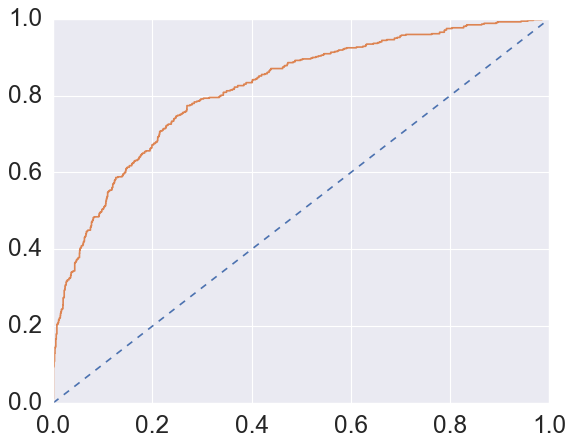

In [1812]:
#AUC and ROC for the training data
# predict probabilities
probs = lr_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_tun_train_auc)
# calculate roc curve
lr_tun_train_fpr, lr_tun_train_tpr, lr_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_tun_train_fpr, lr_tun_train_tpr)

In [1813]:
## Performance Matrix on test data set
y_test_predict = lr_model_tun.predict(X_test_fs)
model_score = lr_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8696369636963697
[[991  27]
 [131  63]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      1018
           1       0.70      0.32      0.44       194

    accuracy                           0.87      1212
   macro avg       0.79      0.65      0.68      1212
weighted avg       0.85      0.87      0.85      1212



In [1814]:
lr_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(lr_tuned_metrics).transpose()
df
lr_tuned_test_acc= accuracy_score(y_test, y_test_predict)
lr_tuned_test_precision=round(df.loc["1"][0],2)
lr_tuned_test_recall=round(df.loc["1"][1],2)
lr_tuned_test_f1=round(df.loc["1"][2],2)
print ('lr_tuned_test_acc ',lr_tuned_test_acc)
print ('lr_tuned_test_precision ',lr_tuned_test_precision)
print ('lr_tuned_test_recall ',lr_tuned_test_recall)
print ('lr_tuned_test_f1 ',lr_tuned_test_f1)

lr_tuned_test_acc  0.8696369636963697
lr_tuned_test_precision  0.7
lr_tuned_test_recall  0.32
lr_tuned_test_f1  0.44


AUC: 0.816


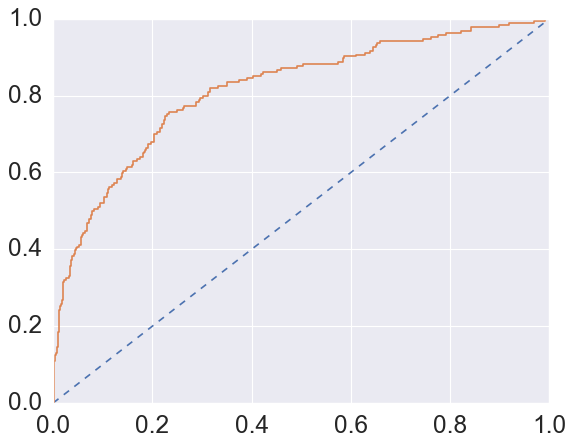

In [1815]:
# AUC and ROC for the test data
# predict probabilities
probs = lr_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_tun_test_auc)
# calculate roc curve
lr_tun_test_fpr, lr_tun_test_tpr, lr_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_tun_test_fpr, lr_tun_test_tpr)

In [1816]:
pd.DataFrame(zip(X_train_fs.columns, np.transpose(lr_model_tun.coef_.tolist()[0])), columns=['features', 'coef']).sort_values('coef', ascending=False)

features      coef
5                      Complain  0.696717
22                       Single  0.405276
3             SatisfactionScore  0.399313
25                       Tier_3  0.371322
10                User_Activity  0.200063
23                         Male  0.188180
15                     E_wallet  0.161501
24                       Tier_2  0.137505
13                          COD  0.055280
20                       Others  0.033269
16                          UPI  0.021828
6   OrderAmountHikeFromlastYear  0.015480
1                HourSpendOnApp  0.005500
14                   Debit_Card -0.009150
7                    CouponUsed -0.032807
11                 Order_Volume -0.039031
21                      Married -0.112621
0               WarehouseToHome -0.122237
12                 Mobile_Phone -0.157395
17                      Grocery -0.163153
4               NumberOfAddress -0.180822
19                       Mobile -0.181897
2      NumberOfDeviceRegistered -0.257341
8                CashbackAmount -0.357278
9             Customer_Category -0.471508
18         Laptop_and_Accessory -0.648506

In [1817]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_tuned_train_acc,lr_tun_train_auc,lr_tuned_train_recall,lr_tuned_train_precision,lr_tuned_train_f1],
        'LR Test':[lr_tuned_test_acc,lr_tun_test_auc,lr_tuned_test_recall,lr_tuned_test_precision,lr_tuned_test_f1]},index=index
       )
round(data,2)

LR Train  LR Test
Accuracy       0.85     0.87
AUC            0.82     0.82
Recall         0.32     0.32
Precision      0.71     0.70
F1 Score       0.44     0.44

In [1818]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=lr_model_tun).fit(X_train_fs, y_train)

In [1819]:
selected_feat= X_train_fs.columns[(selector.get_support())]
len(selected_feat)

8

In [1820]:
print(selected_feat)

Index(['NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain',
       'CashbackAmount', 'Customer_Category', 'Laptop_and_Accessory', 'Single',
       'Tier_3'],
      dtype='object')


### Decision Tree

In [1590]:
X_train_fs = X_train[['Complain','Customer_Category', 'Mobile']]

X_test_fs = X_test[['Complain','Customer_Category', 'Mobile']]

In [1591]:
# Decision Tree Parameters tunning 
dt = DecisionTreeClassifier(random_state = 1)

## Search grid for optimal parameters
dt_param_grid = {'max_depth': [30,50,100],
                 'max_features': [1,2,3],
                 'min_samples_split':[2,3,5],
                 'min_samples_leaf':[2,3,5],
                 'criterion':['gini','entropy']}


gsDT = GridSearchCV(dt, dt_param_grid, scoring="recall", n_jobs= 7, verbose = 1)

In [1592]:
gsDT.fit(X_train_fs, y_train)
dt_model_tun = gsDT.best_estimator_
dt_model_tun

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    1.0s
[Parallel(n_jobs=7)]: Done 810 out of 810 | elapsed:    2.6s finished


DecisionTreeClassifier(max_depth=30, max_features=1, min_samples_leaf=2,
                       random_state=1)

In [1593]:
y_train_predict = dt_model_tun.predict(X_train_fs)
model_score = dt_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8368141592920354
[[2255   52]
 [ 409  109]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2307
           1       0.68      0.21      0.32       518

    accuracy                           0.84      2825
   macro avg       0.76      0.59      0.61      2825
weighted avg       0.82      0.84      0.80      2825



In [1594]:
dt_tuned_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(dt_tuned_metrics).transpose()
df
dt_tuned_train_acc= accuracy_score(y_train, y_train_predict)
dt_tuned_train_precision=round(df.loc["1"][0],2)
dt_tuned_train_recall=round(df.loc["1"][1],2)
dt_tuned_train_f1=round(df.loc["1"][2],2)
print ('dt_tuned_train_acc ',dt_tuned_train_acc)
print ('dt_tuned_train_precision ',dt_tuned_train_precision)
print ('dt_tuned_train_recall ',dt_tuned_train_recall)
print ('dt_tuned_train_f1 ',dt_tuned_train_f1)

dt_tuned_train_acc  0.8368141592920354
dt_tuned_train_precision  0.68
dt_tuned_train_recall  0.21
dt_tuned_train_f1  0.32


AUC: 0.734


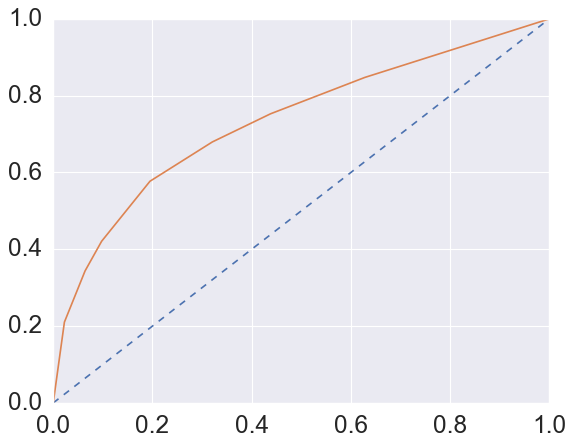

In [1595]:
#AUC and ROC for the training data
# predict probabilities
probs = dt_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % dt_tun_train_auc)
# calculate roc curve
dt_tun_train_fpr, dt_tun_train_tpr, dt_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_tun_train_fpr, dt_tun_train_tpr)

In [1596]:
y_test_predict = dt_model_tun.predict(X_test_fs)
model_score = dt_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8539603960396039
[[998  20]
 [157  37]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1018
           1       0.65      0.19      0.29       194

    accuracy                           0.85      1212
   macro avg       0.76      0.59      0.61      1212
weighted avg       0.83      0.85      0.82      1212



In [1597]:
dt_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(dt_tuned_metrics).transpose()
df
dt_tuned_test_acc= accuracy_score(y_test, y_test_predict)
dt_tuned_test_precision=round(df.loc["1"][0],2)
dt_tuned_test_recall=round(df.loc["1"][1],2)
dt_tuned_test_f1=round(df.loc["1"][2],2)
print ('dt_tuned_test_acc ',dt_tuned_test_acc)
print ('dt_tuned_test_precision ',dt_tuned_test_precision)
print ('dt_tuned_test_recall ',dt_tuned_test_recall)
print ('dt_tuned_test_f1 ',dt_tuned_test_f1)

dt_tuned_test_acc  0.8539603960396039
dt_tuned_test_precision  0.65
dt_tuned_test_recall  0.19
dt_tuned_test_f1  0.29


AUC: 0.743


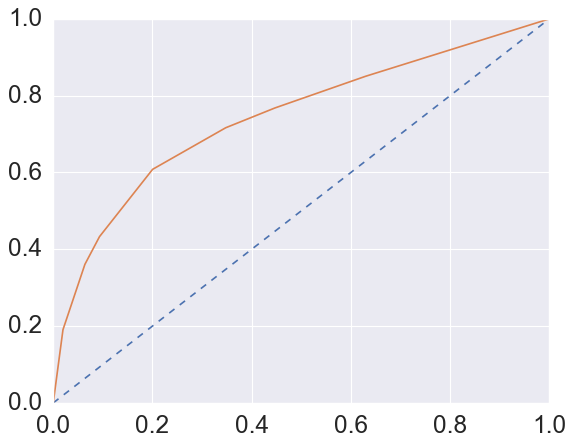

In [1598]:
# AUC and ROC for the test data
# predict probabilities
probs = dt_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % dt_tun_test_auc)
# calculate roc curve
dt_tun_test_fpr, dt_tun_test_tpr, dt_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_tun_test_fpr, dt_tun_test_tpr)

In [1599]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('G:\greatlearning\Capstone_Project\CC_EC_01 - Customer Churn - E-Commerce\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model_tun, out_file=Credit_Tree_File, feature_names = list(X_train_fs), class_names = list(train_char_label))

Credit_Tree_File.close()

In [1600]:
pd.DataFrame({'Variable':X_train_fs.columns,
              'Importance':dt_model_tun.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
0           Complain    0.422019
1  Customer_Category    0.314257
2             Mobile    0.263724

In [1601]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'DT Train':[dt_tuned_train_acc,dt_tun_train_auc,dt_tuned_train_recall,dt_tuned_train_precision,dt_tuned_train_f1],
        'DT Test':[dt_tuned_test_acc,dt_tun_test_auc,dt_tuned_test_recall,dt_tuned_test_precision,dt_tuned_test_f1]},index=index
       )
round(data,2)

DT Train  DT Test
Accuracy       0.84     0.85
AUC            0.73     0.74
Recall         0.21     0.19
Precision      0.68     0.65
F1 Score       0.32     0.29

### Random Forest

In [1602]:
X_train_fs = X_train[['Complain','Customer_Category','Mobile','Married','User_Activity','SatisfactionScore']]

X_test_fs = X_test[['Complain','Customer_Category','Mobile','Married','User_Activity','SatisfactionScore']]

In [1603]:
rf = RandomForestClassifier(random_state = 1)

## Search grid for optimal parameters
rf_param_grid = {'n_estimators': [200,300],
                 'max_depth':[4,6],
                 'min_samples_split':[2,3],
                 'min_samples_leaf':[3,4],
                 'max_features':[3,6],
                 'max_leaf_nodes':[50,60]}


gsRF = GridSearchCV(rf, rf_param_grid, scoring="recall", n_jobs= 7, verbose = 1,cv =5)

In [1604]:
gsRF.fit(X_train_fs, y_train)
rf_model_tun = gsRF.best_estimator_
rf_model_tun

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    5.4s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   33.2s
[Parallel(n_jobs=7)]: Done 320 out of 320 | elapsed:   57.1s finished


RandomForestClassifier(max_depth=6, max_features=6, max_leaf_nodes=50,
                       min_samples_leaf=4, n_estimators=200, random_state=1)

In [1605]:
## Performance Matrix on train data set
y_train_predict = rf_model_tun.predict(X_train_fs)
model_score = rf_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8477876106194691
[[2226   81]
 [ 349  169]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2307
           1       0.68      0.33      0.44       518

    accuracy                           0.85      2825
   macro avg       0.77      0.65      0.68      2825
weighted avg       0.83      0.85      0.83      2825



In [1606]:
from sklearn.metrics import accuracy_score 
rf_tun_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(rf_tun_metrics).transpose()
df
rf_tun_train_acc= accuracy_score(y_train, y_train_predict)
rf_tun_train_precision=round(df.loc["1"][0],2)
rf_tun_train_recall=round(df.loc["1"][1],2)
rf_tun_train_f1=round(df.loc["1"][2],2)
print ('rf_tun_train_acc ',rf_tun_train_acc)
print ('rf_tun_train_precision ',rf_tun_train_precision)
print ('rf_tun_train_recall ',rf_tun_train_recall)
print ('rf_tun_train_f1 ',rf_tun_train_f1)

rf_tun_train_acc  0.8477876106194691
rf_tun_train_precision  0.68
rf_tun_train_recall  0.33
rf_tun_train_f1  0.44


AUC: 1.000


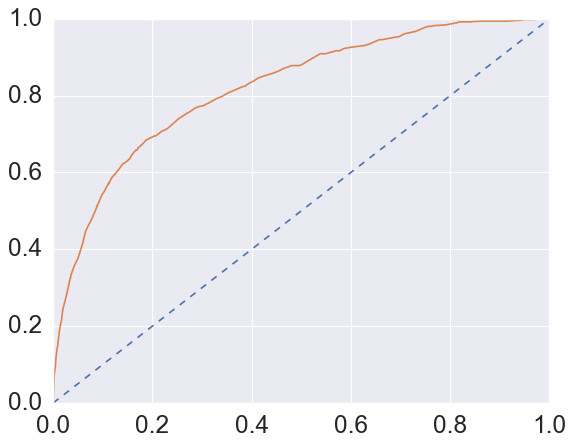

In [1607]:
#AUC and ROC for the training data
# predict probabilities
probs = rf_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
rf_tun_train_fpr, rf_tun_train_tpr, rf_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_tun_train_fpr, rf_tun_train_tpr)

In [1608]:
## Performance Matrix on test data set
y_test_predict = rf_model_tun.predict(X_test_fs)
model_score = rf_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8622112211221122
[[979  39]
 [128  66]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1018
           1       0.63      0.34      0.44       194

    accuracy                           0.86      1212
   macro avg       0.76      0.65      0.68      1212
weighted avg       0.84      0.86      0.84      1212



In [1609]:
from sklearn.metrics import accuracy_score 
rf_tun_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(rf_tun_metrics).transpose()
df
rf_tun_test_acc= accuracy_score(y_test, y_test_predict)
rf_tun_test_precision=round(df.loc["1"][0],2)
rf_tun_test_recall=round(df.loc["1"][1],2)
rf_tun_test_f1=round(df.loc["1"][2],2)
print ('rf_tun_test_acc ',rf_tun_test_acc)
print ('rf_tun_test_precision ',rf_tun_test_precision)
print ('rf_tun_test_recall ',rf_tun_test_recall)
print ('rf_tun_test_f1 ',rf_tun_test_f1)

rf_tun_test_acc  0.8622112211221122
rf_tun_test_precision  0.63
rf_tun_test_recall  0.34
rf_tun_test_f1  0.44


AUC: 0.805


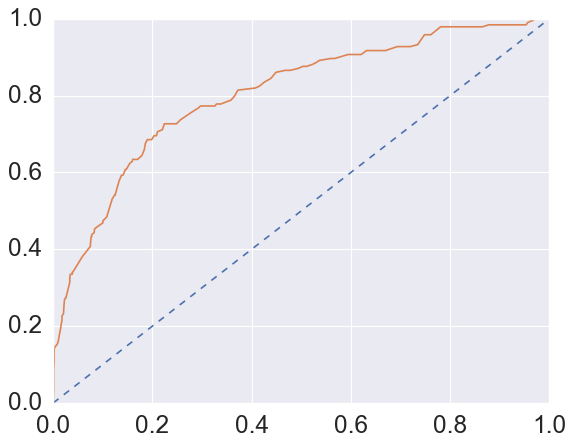

In [1610]:
# AUC and ROC for the test data
# predict probabilities
probs = rf_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rf_tun_test_auc)
# calculate roc curve
rf_tun_test_fpr, rf_tun_test_tpr, rf_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_tun_test_fpr, rf_tun_test_tpr)

In [1611]:
pd.DataFrame({'Variable':X_train_fs.columns,
              'Importance':rf_model_tun.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
0           Complain    0.250262
2             Mobile    0.236143
5  SatisfactionScore    0.185451
1  Customer_Category    0.128261
3            Married    0.125971
4      User_Activity    0.073912

In [1612]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'RF Train':[rf_tun_train_acc,rf_tun_train_auc,rf_tun_train_recall,rf_tun_train_precision,rf_tun_train_f1],
        'RF Test':[rf_tun_test_acc,rf_tun_test_auc,rf_tun_test_recall,rf_tun_test_precision,rf_tun_test_f1]},index=index
       )
round(data,2)

RF Train  RF Test
Accuracy       0.85     0.86
AUC            0.82     0.80
Recall         0.33     0.34
Precision      0.68     0.63
F1 Score       0.44     0.44

#### Linear Discriminant Analysis

In [1613]:
X_train_fs = X_train[['Customer_Category', 'CashbackAmount']]

X_test_fs = X_test[['Customer_Category', 'CashbackAmount']]

In [1614]:
LDAM = LinearDiscriminantAnalysis()

lda_param_grid = {"solver" : ["svd","lsqr", "eigen"],
              "tol" : [0.1,0.01,0.0001,0.0002,0.0003]
}

gsLDAM = GridSearchCV(LDAM, param_grid = lda_param_grid, scoring="recall", n_jobs= 7, verbose = 1, cv = 5)

In [1615]:
gsLDAM.fit(X_train_fs, y_train)
lda_model_tun = gsLDAM.best_estimator_
lda_model_tun

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  39 tasks      | elapsed:    0.6s
[Parallel(n_jobs=7)]: Done  75 out of  75 | elapsed:    0.7s finished


LinearDiscriminantAnalysis(tol=0.1)

In [1616]:
## Performance Matrix on train data set
y_train_predict = lda_model_tun.predict(X_train_fs)
model_score = lda_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8166371681415929
[[2307    0]
 [ 518    0]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2307
           1       0.00      0.00      0.00       518

    accuracy                           0.82      2825
   macro avg       0.41      0.50      0.45      2825
weighted avg       0.67      0.82      0.73      2825



In [1617]:
lda_tuned_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(lda_tuned_metrics).transpose()
df
lda_tuned_train_acc= accuracy_score(y_train, y_train_predict)
lda_tuned_train_precision=round(df.loc["1"][0],2)
lda_tuned_train_recall=round(df.loc["1"][1],2)
lda_tuned_train_f1=round(df.loc["1"][2],2)
print ('lda_tuned_train_acc ',lda_tuned_train_acc)
print ('lda_tuned_train_precision ',lda_tuned_train_precision)
print ('lda_tuned_train_recall ',lda_tuned_train_recall)
print ('lda_tuned_train_f1 ',lda_tuned_train_f1)


lda_tuned_train_acc  0.8166371681415929
lda_tuned_train_precision  0.0
lda_tuned_train_recall  0.0
lda_tuned_train_f1  0.0


AUC: 0.673


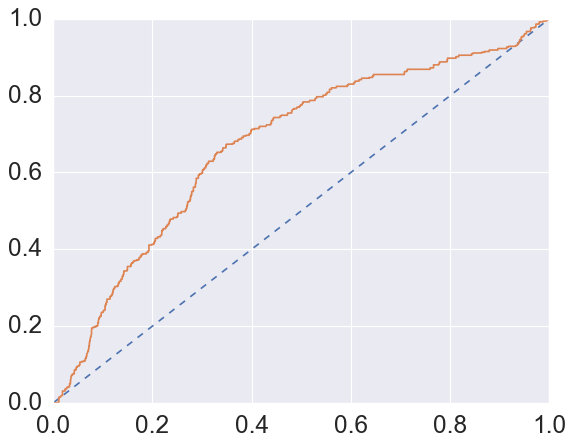

In [1618]:
#AUC and ROC for the training data
# predict probabilities
probs = lda_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_tun_train_auc)
# calculate roc curve
lda_tun_train_fpr, lda_tun_train_tpr, lda_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_tun_train_fpr, lda_tun_train_tpr)

In [1619]:
## Performance Matrix on test data set
y_test_predict = lda_model_tun.predict(X_test_fs)
model_score = lda_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8399339933993399
[[1018    0]
 [ 194    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1018
           1       0.00      0.00      0.00       194

    accuracy                           0.84      1212
   macro avg       0.42      0.50      0.46      1212
weighted avg       0.71      0.84      0.77      1212



In [1620]:
lda_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(lda_tuned_metrics).transpose()
df
lda_tuned_test_acc= accuracy_score(y_test, y_test_predict)
lda_tuned_test_precision=round(df.loc["1"][0],2)
lda_tuned_test_recall=round(df.loc["1"][1],2)
lda_tuned_test_f1=round(df.loc["1"][2],2)
print ('lda_tuned_test_acc ',lda_tuned_test_acc)
print ('lda_tuned_test_precision ',lda_tuned_test_precision)
print ('lda_tuned_test_recall ',lda_tuned_test_recall)
print ('lda_tuned_test_f1 ',lda_tuned_test_f1)

lda_tuned_test_acc  0.8399339933993399
lda_tuned_test_precision  0.0
lda_tuned_test_recall  0.0
lda_tuned_test_f1  0.0


AUC: 0.669


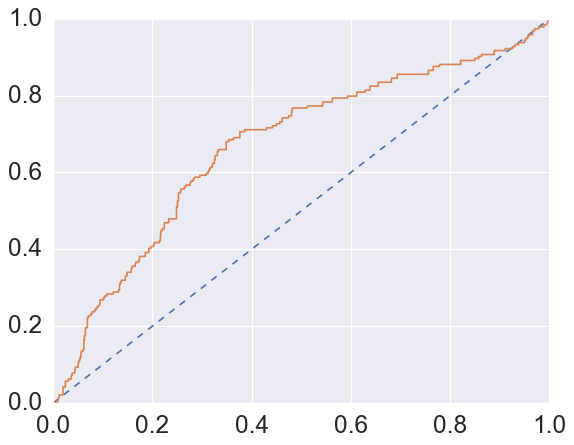

In [1621]:
# AUC and ROC for the test data
# predict probabilities
probs = lda_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_tun_test_auc)
# calculate roc curve
lda_tun_test_fpr, lda_tun_test_tpr, lda_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_tun_test_fpr, lda_tun_test_tpr)

In [1622]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=lda_model_tun).fit(X_train_fs, y_train)

In [1623]:
selected_feat= X_train_fs.columns[(selector.get_support())]
len(selected_feat)

1

In [1624]:
print(selected_feat)

Index(['Customer_Category'], dtype='object')


In [1625]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LDA Train':[lda_tuned_train_acc,lda_tun_train_auc,lda_tuned_train_recall,lda_tuned_train_precision,lda_tuned_train_f1],
        'LDA Test':[lda_tuned_test_acc,lda_tun_test_auc,lda_tuned_test_recall,lda_tuned_test_precision,lda_tuned_test_f1]},index=index
       )
round(data,2)

LDA Train  LDA Test
Accuracy        0.82      0.84
AUC             0.67      0.67
Recall          0.00      0.00
Precision       0.00      0.00
F1 Score        0.00      0.00

#### KNN Model

In [1626]:
X_train_fs = X_train[['Customer_Category', 'CashbackAmount']]

X_test_fs = X_test[['Customer_Category', 'CashbackAmount']]

In [1627]:
KNNM = KNeighborsClassifier()

knn_param_grid = {
'n_neighbors': [5,6,7],
'weights': ['uniform', 'distance'],
'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
'leaf_size' : [1,2,3] ,
'p' : [1,2]
}

gsKNNM = GridSearchCV(KNNM, param_grid = knn_param_grid, scoring="recall", n_jobs= 7, verbose = 1, cv =5)

In [1628]:
gsKNNM.fit(X_train_fs, y_train)
knn_model_tun = gsKNNM.best_estimator_
knn_model_tun

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done 190 tasks      | elapsed:    1.5s
[Parallel(n_jobs=7)]: Done 720 out of 720 | elapsed:    7.2s finished


KNeighborsClassifier(leaf_size=2, n_neighbors=6, p=1, weights='distance')

In [1629]:
## Performance Matrix on train data set
y_train_predict = knn_model_tun.predict(X_train_fs)
model_score = knn_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9808849557522124
[[2295   12]
 [  42  476]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2307
           1       0.98      0.92      0.95       518

    accuracy                           0.98      2825
   macro avg       0.98      0.96      0.97      2825
weighted avg       0.98      0.98      0.98      2825



In [1630]:
knn_tun_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(knn_tun_metrics).transpose()
df
knn_tun_train_acc= accuracy_score(y_train, y_train_predict)
knn_tun_train_precision=round(df.loc["1"][0],2)
knn_tun_train_recall=round(df.loc["1"][1],2)
knn_tun_train_f1=round(df.loc["1"][2],2)
print ('knn_tun_train_acc ',knn_tun_train_acc)
print ('knn_tun_train_precision ',knn_tun_train_precision)
print ('knn_tun_train_recall ',knn_tun_train_recall)
print ('knn_tun_train_f1 ',knn_tun_train_f1)

knn_tun_train_acc  0.9808849557522124
knn_tun_train_precision  0.98
knn_tun_train_recall  0.92
knn_tun_train_f1  0.95


AUC: 0.999


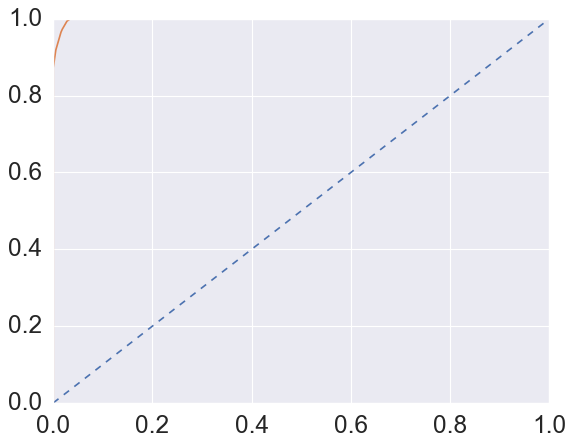

In [1631]:
#AUC and ROC for the training data
# predict probabilities
probs = knn_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % knn_tun_train_auc)
# calculate roc curve
knn_tun_train_fpr, knn_tun_train_tpr, knn_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_tun_train_fpr, knn_tun_train_tpr)

In [1632]:
## Performance Matrix on test data set
y_test_predict = knn_model_tun.predict(X_test_fs)
model_score = knn_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9018151815181518
[[954  64]
 [ 55 139]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1018
           1       0.68      0.72      0.70       194

    accuracy                           0.90      1212
   macro avg       0.82      0.83      0.82      1212
weighted avg       0.90      0.90      0.90      1212



In [1633]:
knn_tun_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(knn_tun_metrics).transpose()
df
knn_tun_test_acc= accuracy_score(y_test, y_test_predict)
knn_tun_test_precision=round(df.loc["1"][0],2)
knn_tun_test_recall=round(df.loc["1"][1],2)
knn_tun_test_f1=round(df.loc["1"][2],2)
print ('knn_tun_test_acc ',knn_tun_test_acc)
print ('knn_tun_test_precision ',knn_tun_test_precision)
print ('knn_tun_test_recall ',knn_tun_test_recall)
print ('knn_tun_test_f1 ',knn_tun_test_f1)

knn_tun_test_acc  0.9018151815181518
knn_tun_test_precision  0.68
knn_tun_test_recall  0.72
knn_tun_test_f1  0.7


AUC: 0.919


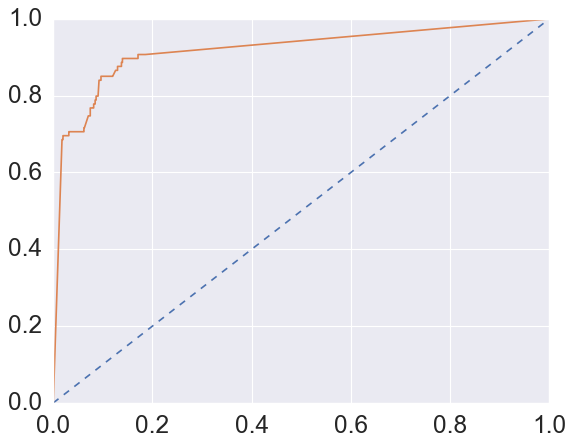

In [1634]:
# AUC and ROC for the test data
# predict probabilities
probs = knn_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_tun_test_auc)
# calculate roc curve
knn_tun_test_fpr, knn_tun_test_tpr, knn_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_tun_test_fpr, knn_tun_test_tpr)

In [1635]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'KNN Train':[knn_tun_train_acc,knn_tun_train_auc,knn_tun_train_recall,knn_tun_train_precision,knn_tun_train_f1],
        'KNN Test':[knn_tun_test_acc,knn_tun_test_auc,knn_tun_test_recall,knn_tun_test_precision,knn_tun_test_f1]},index=index
       )
round(data,2)

KNN Train  KNN Test
Accuracy        0.98      0.90
AUC             1.00      0.92
Recall          0.92      0.72
Precision       0.98      0.68
F1 Score        0.95      0.70

#### Naive Bayes Model

There are no parameters to tune for Naive Bayes

#### SVM 

In [1636]:
X_train_fs = X_train[['Customer_Category','CashbackAmount']]

X_test_fs = X_test[['Customer_Category','CashbackAmount']]

In [1637]:
SVMM= svm.SVC(random_state=1,probability=True)

svm_param_grid = {
'C': [0.01, 0.1],
'kernel': ['linear'],
'gamma': [0.1,0.01],
'tol' : [0.1,0.01]
}


gsSVMM = GridSearchCV(SVMM, param_grid = svm_param_grid, scoring="recall", n_jobs= 7, verbose = 1, cv =5)

In [1638]:
gsSVMM.fit(X_train_fs, y_train)
svm_model_tun = gsSVMM.best_estimator_
svm_model_tun

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  40 out of  40 | elapsed:    1.7s finished


SVC(C=0.01, gamma=0.1, kernel='linear', probability=True, random_state=1,
    tol=0.1)

In [1639]:
## Performance Matrix on train data set
y_train_predict = svm_model_tun.predict(X_train_fs)
model_score = svm_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8166371681415929
[[2307    0]
 [ 518    0]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2307
           1       0.00      0.00      0.00       518

    accuracy                           0.82      2825
   macro avg       0.41      0.50      0.45      2825
weighted avg       0.67      0.82      0.73      2825



In [1640]:
svm_tun_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(svm_tun_metrics).transpose()
df
svm_tun_train_acc= accuracy_score(y_train, y_train_predict)
svm_tun_train_precision=round(df.loc["1"][0],2)
svm_tun_train_recall=round(df.loc["1"][1],2)
svm_tun_train_f1=round(df.loc["1"][2],2)
print ('svm_tun_train_acc ',svm_tun_train_acc)
print ('svm_tun_train_precision ',svm_tun_train_precision)
print ('svm_tun_train_recall ',svm_tun_train_recall)
print ('svm_tun_train_f1 ',svm_tun_train_f1)

svm_tun_train_acc  0.8166371681415929
svm_tun_train_precision  0.0
svm_tun_train_recall  0.0
svm_tun_train_f1  0.0


AUC: 0.427


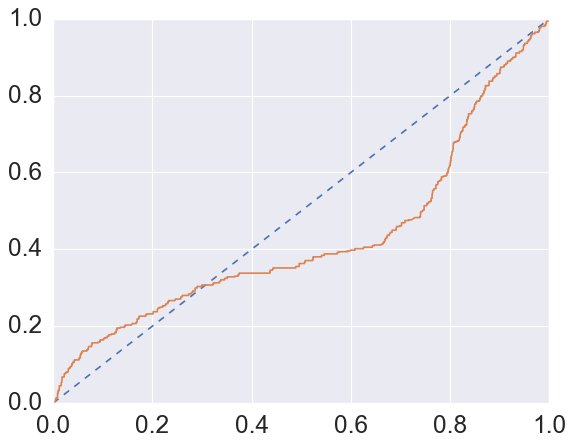

In [1641]:
#AUC and ROC for the training data
# predict probabilities
probs = svm_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % svm_tun_train_auc)
# calculate roc curve
svm_tun_train_fpr, svm_tun_train_tpr, svm_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svm_tun_train_fpr, svm_tun_train_tpr)

In [1642]:
## Performance Matrix on test data set
y_test_predict = svm_model_tun.predict(X_test_fs)
model_score = svm_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8399339933993399
[[1018    0]
 [ 194    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1018
           1       0.00      0.00      0.00       194

    accuracy                           0.84      1212
   macro avg       0.42      0.50      0.46      1212
weighted avg       0.71      0.84      0.77      1212



In [1643]:
svm_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(svm_tuned_metrics).transpose()
df
svm_tun_test_acc= accuracy_score(y_test, y_test_predict)
svm_tun_test_precision=round(df.loc["1"][0],2)
svm_tun_test_recall=round(df.loc["1"][1],2)
svm_tun_test_f1=round(df.loc["1"][2],2)
print ('svm_tun_test_acc ',svm_tun_test_acc)
print ('svm_tun_test_precision ',svm_tun_test_precision)
print ('svm_tun_test_recall ',svm_tun_test_recall)
print ('svm_tun_test_f1 ',svm_tun_test_f1)

svm_tun_test_acc  0.8399339933993399
svm_tun_test_precision  0.0
svm_tun_test_recall  0.0
svm_tun_test_f1  0.0


AUC: 0.434


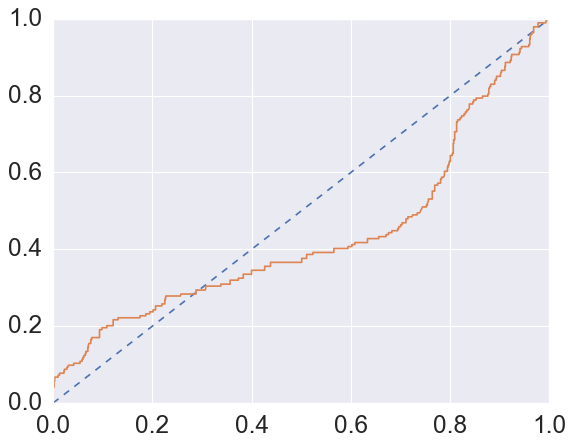

In [1644]:
# AUC and ROC for the test data
# predict probabilities
probs = svm_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % svm_tun_test_auc)
# calculate roc curve
svm_tun_test_fpr, svm_tun_test_tpr, svm_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svm_tun_test_fpr, svm_tun_test_tpr)

In [1645]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'SVM Train':[svm_tun_train_acc,svm_tun_train_auc,svm_tun_train_recall,svm_tun_train_precision,svm_tun_train_f1],
        'SVM Test':[svm_tun_test_acc,svm_tun_test_auc,svm_tun_test_recall,svm_tun_test_precision,svm_tun_test_f1]},index=index
       )
round(data,2)

SVM Train  SVM Test
Accuracy        0.82      0.84
AUC             0.43      0.43
Recall          0.00      0.00
Precision       0.00      0.00
F1 Score        0.00      0.00

### Tuned Neural Network

In [1646]:
X_train_fs = X_train[['Customer_Category','User_Activity','CashbackAmount']]

X_test_fs = X_test[['Customer_Category','User_Activity','CashbackAmount']]

In [1647]:
parameters = {'solver': ['lbfgs','sgd'], 
              'max_iter': [500,1000], 
              'alpha': 10.0 ** -np.arange(1, 10), 
              'hidden_layer_sizes':[50,100,200],
              'tol': [0.01,0.1]}

gsANNM = GridSearchCV(MLPClassifier(random_state=21), parameters, n_jobs=7,verbose=1)

In [1648]:
gsANNM.fit(X_train_fs, y_train)
ann_model_tun = gsANNM.best_estimator_
ann_model_tun

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    1.5s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    8.4s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:   20.5s
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:   36.4s
[Parallel(n_jobs=7)]: Done 1080 out of 1080 | elapsed:   51.1s finished


MLPClassifier(alpha=0.1, hidden_layer_sizes=50, max_iter=500, random_state=21,
              solver='lbfgs', tol=0.01)

In [1649]:
## Performance Matrix on train data set
y_train_predict = ann_model_tun.predict(X_train_fs)
model_score = ann_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8166371681415929
[[2307    0]
 [ 518    0]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2307
           1       0.00      0.00      0.00       518

    accuracy                           0.82      2825
   macro avg       0.41      0.50      0.45      2825
weighted avg       0.67      0.82      0.73      2825



In [1650]:
ann_tun_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(ann_tun_metrics).transpose()
df
ann_tun_train_acc= accuracy_score(y_train, y_train_predict)
ann_tun_train_precision=round(df.loc["1"][0],2)
ann_tun_train_recall=round(df.loc["1"][1],2)
ann_tun_train_f1=round(df.loc["1"][2],2)
print ('ann_tun_train_acc ',ann_tun_train_acc)
print ('ann_tun_train_precision ',ann_tun_train_precision)
print ('ann_tun_train_recall ',ann_tun_train_recall)
print ('ann_tun_train_f1 ',ann_tun_train_f1)

ann_tun_train_acc  0.8166371681415929
ann_tun_train_precision  0.0
ann_tun_train_recall  0.0
ann_tun_train_f1  0.0


AUC: 0.684


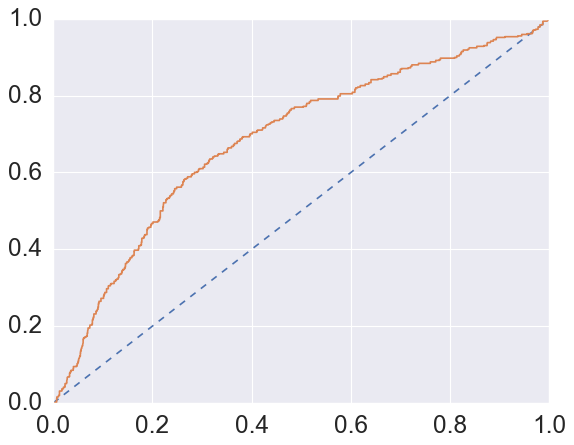

In [1651]:
#AUC and ROC for the training data
# predict probabilities
probs = ann_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ann_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ann_tun_train_auc)
# calculate roc curve
ann_tun_train_fpr, ann_tun_train_tpr, ann_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_tun_train_fpr, ann_tun_train_tpr)

In [1652]:
## Performance Matrix on test data set
y_test_predict = ann_model_tun.predict(X_test_fs)
model_score = ann_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8399339933993399
[[1018    0]
 [ 194    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1018
           1       0.00      0.00      0.00       194

    accuracy                           0.84      1212
   macro avg       0.42      0.50      0.46      1212
weighted avg       0.71      0.84      0.77      1212



In [1653]:
ann_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(ann_tuned_metrics).transpose()
df
ann_tun_test_acc= accuracy_score(y_test, y_test_predict)
ann_tun_test_precision=round(df.loc["1"][0],2)
ann_tun_test_recall=round(df.loc["1"][1],2)
ann_tun_test_f1=round(df.loc["1"][2],2)
print ('ann_tun_test_acc ',ann_tun_test_acc)
print ('ann_tun_test_precision ',ann_tun_test_precision)
print ('ann_tun_test_recall ',ann_tun_test_recall)
print ('ann_tun_test_f1 ',ann_tun_test_f1)

ann_tun_test_acc  0.8399339933993399
ann_tun_test_precision  0.0
ann_tun_test_recall  0.0
ann_tun_test_f1  0.0


AUC: 0.672


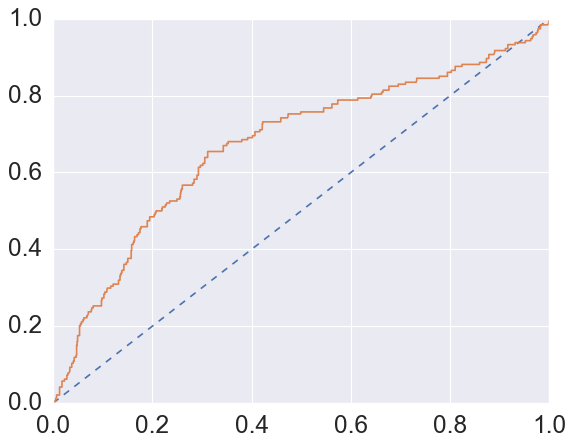

In [1654]:
# AUC and ROC for the test data
# predict probabilities
probs = ann_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ann_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ann_tun_test_auc)
# calculate roc curve
ann_tun_test_fpr, ann_tun_test_tpr, ann_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_tun_test_fpr, ann_tun_test_tpr)

In [1655]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'ANN Train':[ann_tun_train_acc,ann_tun_train_auc,ann_tun_train_recall,ann_tun_train_precision,ann_tun_train_f1],
        'ANN Test':[ann_tun_test_acc,ann_tun_test_auc,ann_tun_test_recall,ann_tun_test_precision,ann_tun_test_f1]},index=index
       )
round(data,2)

ANN Train  ANN Test
Accuracy        0.82      0.84
AUC             0.68      0.67
Recall          0.00      0.00
Precision       0.00      0.00
F1 Score        0.00      0.00

### Tuned Bagging and Boosting models

#### Bagging Model

In [1656]:
X_train_fs = X_train[['Customer_Category','CashbackAmount']]

X_test_fs = X_test[['Customer_Category','CashbackAmount']]

In [1657]:
# create the classifier
params = {'n_estimators': [40,50,60], 
          'base_estimator__max_leaf_nodes':[25,35], 
          'base_estimator__max_depth':[5,10,15]}

dt = DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=dt, oob_score=True, random_state=1) #n_estimators=70, random_state=1)

# Grid Search to determine best parameters
bc_grid = GridSearchCV(estimator=bc, param_grid=params, scoring='recall', cv=5, n_jobs=7,verbose=1)

In [1658]:
bc_grid.fit(X_train_fs, y_train)
bagging_model_tun = bc_grid.best_estimator_
bagging_model_tun

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    2.1s
[Parallel(n_jobs=7)]: Done  90 out of  90 | elapsed:    5.3s finished


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,
                                                        max_leaf_nodes=35),
                  n_estimators=60, oob_score=True, random_state=1)

In [1659]:
## Performance Matrix on train data set
y_train_predict = bagging_model_tun.predict(X_train_fs)
model_score =bagging_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8456637168141593
[[2279   28]
 [ 408  110]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2307
           1       0.80      0.21      0.34       518

    accuracy                           0.85      2825
   macro avg       0.82      0.60      0.62      2825
weighted avg       0.84      0.85      0.81      2825



In [1660]:
bagging_tun_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(bagging_tun_metrics).transpose()
df
bag_tun_train_acc= accuracy_score(y_train, y_train_predict)
bag_tun_train_precision=round(df.loc["1"][0],2)
bag_tun_train_recall=round(df.loc["1"][1],2)
bag_tun_train_f1=round(df.loc["1"][2],2)
print ('bag_tun_train_acc ',bag_tun_train_acc)
print ('bag_tun_train_precision ',bag_tun_train_precision)
print ('bag_tun_train_recall ',bag_tun_train_recall)
print ('bag_tun_train_f1 ',bag_tun_train_f1)

bag_tun_train_acc  0.8456637168141593
bag_tun_train_precision  0.8
bag_tun_train_recall  0.21
bag_tun_train_f1  0.34


AUC: 0.813


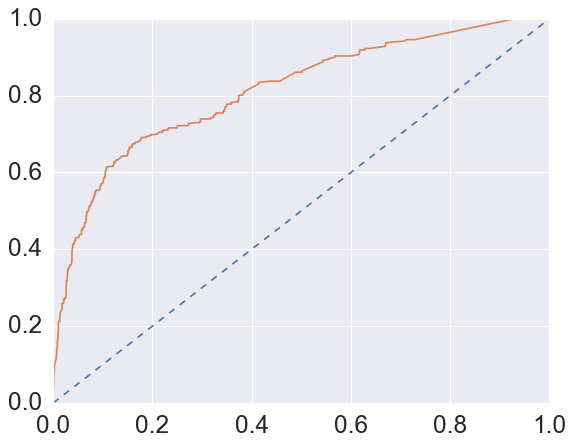

In [1661]:
#AUC and ROC for the training data
# predict probabilities
probs = bagging_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % bag_tun_train_auc)
# calculate roc curve
bag_tun_train_fpr, bag_tun_train_tpr, bag_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_tun_train_fpr, bag_tun_train_tpr)

In [1662]:
## Performance Matrix on test data set
y_test_predict = bagging_model_tun.predict(X_test_fs)
model_score = bagging_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8407590759075908
[[987  31]
 [162  32]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1018
           1       0.51      0.16      0.25       194

    accuracy                           0.84      1212
   macro avg       0.68      0.57      0.58      1212
weighted avg       0.80      0.84      0.80      1212



In [1663]:
bag_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(bag_tuned_metrics).transpose()
df
bag_tun_test_acc= accuracy_score(y_test, y_test_predict)
bag_tun_test_precision=round(df.loc["1"][0],2)
bag_tun_test_recall=round(df.loc["1"][1],2)
bag_tun_test_f1=round(df.loc["1"][2],2)
print ('bag_tun_test_acc ',bag_tun_test_acc)
print ('bag_tun_test_precision ',bag_tun_test_precision)
print ('bag_tun_test_recall ',bag_tun_test_recall)
print ('bag_tun_test_f1 ',bag_tun_test_f1)

bag_tun_test_acc  0.8407590759075908
bag_tun_test_precision  0.51
bag_tun_test_recall  0.16
bag_tun_test_f1  0.25


AUC: 0.745


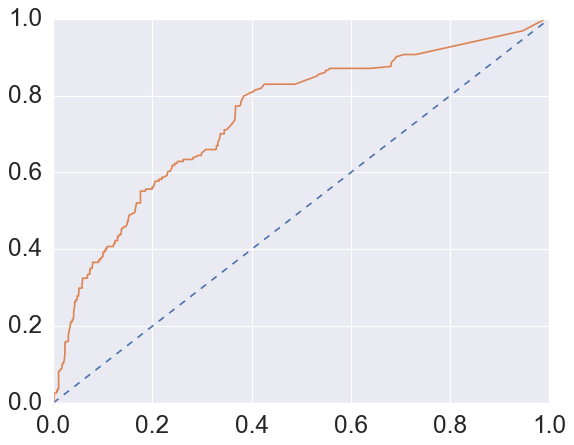

In [1664]:
# AUC and ROC for the test data
# predict probabilities
probs = bagging_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % bag_tun_test_auc)
# calculate roc curve
bag_tun_test_fpr, bag_tun_test_tpr, bag_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_tun_test_fpr, bag_tun_test_tpr)

In [1665]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Bag Train':[bag_tun_train_acc,bag_tun_train_auc,bag_tun_train_recall,bag_tun_train_precision,bag_tun_train_f1],
        'Bag Test':[bag_tun_test_acc,bag_tun_test_auc,bag_tun_test_recall,bag_tun_test_precision,bag_tun_test_f1]},index=index
       )
round(data,2)

Bag Train  Bag Test
Accuracy        0.85      0.84
AUC             0.81      0.74
Recall          0.21      0.16
Precision       0.80      0.51
F1 Score        0.34      0.25

### AdaBoost

In [1666]:
X_train_fs = X_train[['Customer_Category','CashbackAmount']]

X_test_fs = X_test[['Customer_Category','CashbackAmount']]

In [1667]:
from sklearn.ensemble import AdaBoostClassifier

ABCM = AdaBoostClassifier(DecisionTreeClassifier(random_state=1),random_state = 1)

abcm_param_grid = {"base_estimator__max_depth" :[10,20],
                   "n_estimators" :[500,1000],
                   "learning_rate":  [0.05, 0.5, 1.5, 2.5]}

gsABCM = GridSearchCV(ABCM, param_grid = abcm_param_grid, scoring="recall", n_jobs= 7, verbose = 1, cv =5)

In [1668]:
gsABCM.fit(X_train_fs, y_train)
abcm_model_tun = gsABCM.best_estimator_
abcm_model_tun

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   29.5s
[Parallel(n_jobs=7)]: Done  80 out of  80 | elapsed:  1.1min finished


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         random_state=1),
                   learning_rate=2.5, n_estimators=500, random_state=1)

In [1669]:
## Performance Matrix on train data set
y_train_predict = abcm_model_tun.predict(X_train_fs)
model_score = abcm_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.711858407079646
[[1530  777]
 [  37  481]]
              precision    recall  f1-score   support

           0       0.98      0.66      0.79      2307
           1       0.38      0.93      0.54       518

    accuracy                           0.71      2825
   macro avg       0.68      0.80      0.67      2825
weighted avg       0.87      0.71      0.74      2825



In [1670]:
adb_tun_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(adb_tun_metrics).transpose()
df
adb_tun_train_acc= accuracy_score(y_train, y_train_predict)
adb_tun_train_precision=round(df.loc["1"][0],2)
adb_tun_train_recall=round(df.loc["1"][1],2)
adb_tun_train_f1=round(df.loc["1"][2],2)
print ('adb_tun_train_acc ',adb_tun_train_acc)
print ('adb_tun_train_precision ',adb_tun_train_precision)
print ('adb_tun_train_recall ',adb_tun_train_recall)
print ('adb_tun_train_f1 ',adb_tun_train_f1)

adb_tun_train_acc  0.711858407079646
adb_tun_train_precision  0.38
adb_tun_train_recall  0.93
adb_tun_train_f1  0.54


AUC: 0.918


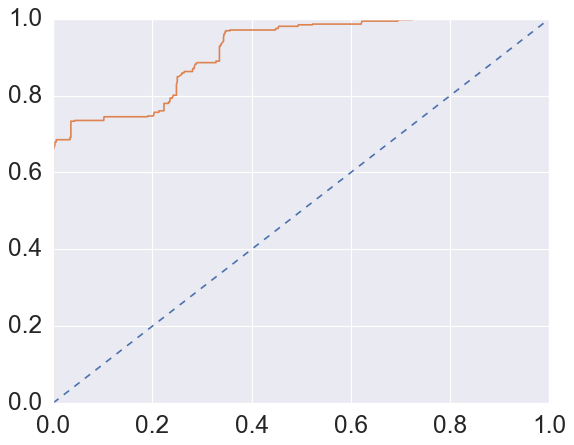

In [1671]:
#AUC and ROC for the training data
# predict probabilities
probs = abcm_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % adb_tun_train_auc)
# calculate roc curve
adb_tun_train_fpr, adb_tun_train_tpr, adb_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_tun_train_fpr, adb_tun_train_tpr)

In [1672]:
## Performance Matrix on test data set
y_test_predict = abcm_model_tun.predict(X_test_fs)
model_score = abcm_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6724422442244224
[[652 366]
 [ 31 163]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.77      1018
           1       0.31      0.84      0.45       194

    accuracy                           0.67      1212
   macro avg       0.63      0.74      0.61      1212
weighted avg       0.85      0.67      0.72      1212



In [1673]:
adb_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(adb_tuned_metrics).transpose()
df
adb_tun_test_acc= accuracy_score(y_test, y_test_predict)
adb_tun_test_precision=round(df.loc["1"][0],2)
adb_tun_test_recall=round(df.loc["1"][1],2)
adb_tun_test_f1=round(df.loc["1"][2],2)
print ('adb_tun_test_acc ',adb_tun_test_acc)
print ('adb_tun_test_precision ',adb_tun_test_precision)
print ('adb_tun_test_recall ',adb_tun_test_recall)
print ('adb_tun_test_f1 ',adb_tun_test_f1)

adb_tun_test_acc  0.6724422442244224
adb_tun_test_precision  0.31
adb_tun_test_recall  0.84
adb_tun_test_f1  0.45


AUC: 0.823


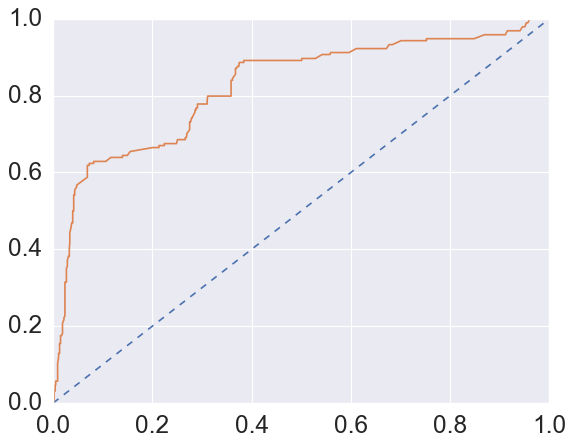

In [1674]:
# AUC and ROC for the test data
# predict probabilities
probs = abcm_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % adb_tun_test_auc)
# calculate roc curve
adb_tun_test_fpr, adb_tun_test_tpr, adb_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_tun_test_fpr, adb_tun_test_tpr)

In [1675]:
pd.DataFrame({'Variable':X_train_fs.columns,
              'Importance':abcm_model_tun.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
0  Customer_Category    0.982504
1     CashbackAmount         NaN

In [1676]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'ADB Train':[adb_tun_train_acc,adb_tun_train_auc,adb_tun_train_recall,adb_tun_train_precision,adb_tun_train_f1],
        'ADB Test':[adb_tun_test_acc,adb_tun_test_auc,adb_tun_test_recall,adb_tun_test_precision,adb_tun_test_f1]},index=index
       )
round(data,2)

ADB Train  ADB Test
Accuracy        0.71      0.67
AUC             0.92      0.82
Recall          0.93      0.84
Precision       0.38      0.31
F1 Score        0.54      0.45

#### XGBoost

In [1920]:
X_train_fs = X_train[['Complain','Customer_Category','Mobile']]

X_test_fs = X_test[['Complain','Customer_Category','Mobile']]

In [1921]:
import xgboost as xgb

XGBM = xgb.XGBClassifier(random_state=1)

xgbm_param_grid = {'n_estimators': [50,100,500],
                    'max_depth': [2,5,7],
                   'learning_rate':[0.1,0.3]}

gsXGBM = GridSearchCV(XGBM, param_grid = xgbm_param_grid, scoring="recall", n_jobs= 7, verbose = 1, cv =5)

In [1922]:
gsXGBM.fit(X_train_fs, y_train)
xgbm_model_tun = gsXGBM.best_estimator_
xgbm_model_tun

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  90 out of  90 | elapsed:    2.2s finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1923]:
## Performance Matrix on train data set
y_train_predict = xgbm_model_tun.predict(X_train_fs)
model_score = xgbm_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8368141592920354
[[2255   52]
 [ 409  109]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2307
           1       0.68      0.21      0.32       518

    accuracy                           0.84      2825
   macro avg       0.76      0.59      0.61      2825
weighted avg       0.82      0.84      0.80      2825



In [1924]:
xgb_tun_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(xgb_tun_metrics).transpose()
df
xgb_tun_train_acc= accuracy_score(y_train, y_train_predict)
xgb_tun_train_precision=round(df.loc["1"][0],2)
xgb_tun_train_recall=round(df.loc["1"][1],2)
xgb_tun_train_f1=round(df.loc["1"][2],2)
print ('xgb_tun_train_acc ',xgb_tun_train_acc)
print ('xgb_tun_train_precision ',xgb_tun_train_precision)
print ('xgb_tun_train_recall ',xgb_tun_train_recall)
print ('xgb_tun_train_f1 ',xgb_tun_train_f1)

xgb_tun_train_acc  0.8368141592920354
xgb_tun_train_precision  0.68
xgb_tun_train_recall  0.21
xgb_tun_train_f1  0.32


AUC: 0.734


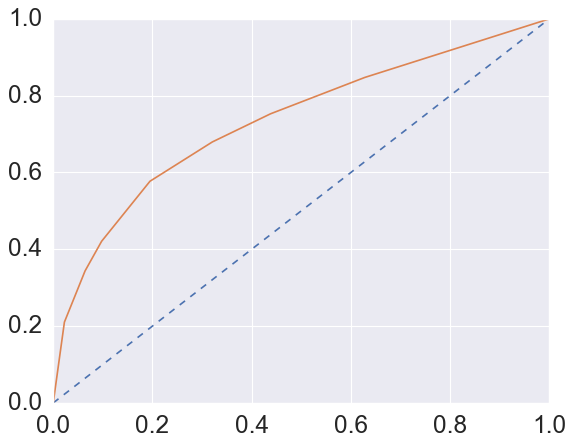

In [1925]:
#AUC and ROC for the training data
# predict probabilities
probs = xgbm_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % xgb_tun_train_auc)
# calculate roc curve
xgb_tun_train_fpr, xgb_tun_train_tpr, xgb_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_tun_train_fpr, xgb_tun_train_tpr)

In [1926]:
## Performance Matrix on test data set
y_test_predict = xgbm_model_tun.predict(X_test_fs)
model_score = xgbm_model_tun.score(X_test_fs, y_test)
print(model_score)

print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8539603960396039
[[998  20]
 [157  37]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1018
           1       0.65      0.19      0.29       194

    accuracy                           0.85      1212
   macro avg       0.76      0.59      0.61      1212
weighted avg       0.83      0.85      0.82      1212



In [1927]:
xgb_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(xgb_tuned_metrics).transpose()
df
xgb_tun_test_acc= accuracy_score(y_test, y_test_predict)
xgb_tun_test_precision=round(df.loc["1"][0],2)
xgb_tun_test_recall=round(df.loc["1"][1],2)
xgb_tun_test_f1=round(df.loc["1"][2],2)
print ('xgb_tun_test_acc ',xgb_tun_test_acc)
print ('xgb_tun_test_precision ',xgb_tun_test_precision)
print ('xgb_tun_test_recall ',xgb_tun_test_recall)
print ('xgb_tun_test_f1 ',xgb_tun_test_f1)

xgb_tun_test_acc  0.8539603960396039
xgb_tun_test_precision  0.65
xgb_tun_test_recall  0.19
xgb_tun_test_f1  0.29


AUC: 0.743


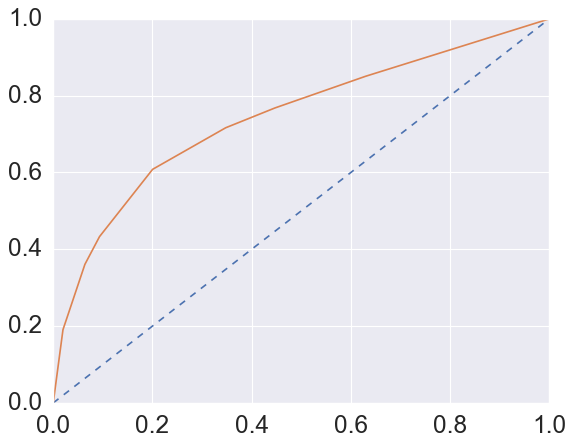

In [1928]:
# AUC and ROC for the test data
# predict probabilities
probs = xgbm_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % xgb_tun_test_auc)
# calculate roc curve
xgb_tun_test_fpr, xgb_tun_test_tpr, xgb_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_tun_test_fpr, xgb_tun_test_tpr)

In [1929]:
pd.DataFrame({'Variable':X_train_fs.columns,
              'Importance':xgbm_model_tun.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
2             Mobile    0.425551
0           Complain    0.297584
1  Customer_Category    0.276865

In [1930]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'XGB Train':[xgb_tun_train_acc,xgb_tun_train_auc,xgb_tun_train_recall,xgb_tun_train_precision,xgb_tun_train_f1],
        'XGB Test':[xgb_tun_test_acc,xgb_tun_test_auc,xgb_tun_test_recall,xgb_tun_test_precision,xgb_tun_test_f1]},index=index
       )
round(data,2)

XGB Train  XGB Test
Accuracy        0.84      0.85
AUC             0.73      0.74
Recall          0.21      0.19
Precision       0.68      0.65
F1 Score        0.32      0.29

In [1931]:
eli5.explain_weights(xgbm_model_tun,feature_names=list(X_train_fs.columns))

Explanation(estimator="XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,\n              importance_type='gain', interaction_constraints='',\n              learning_rate=0.1, max_delta_step=0, max_depth=2,\n              min_child_weight=1, missing=nan, monotone_constraints='()',\n              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=1,\n              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,\n              tree_method='exact', validate_parameters=1, verbosity=None)", description='\nXGBoost feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Mobile', weight=0.4255511, std=None, value=None), FeatureWeight(feature='Complain', weight=0.29758435, std=None, value=None), FeatureWeight(feature='Customer_Category', weight=0.27686462, std=None, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [1932]:
eli5.explain_prediction(xgbm_model_tun, X_train_fs.iloc[1], feature_names = list(X_train_fs.columns)) 

Explanation(estimator="XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,\n              importance_type='gain', interaction_constraints='',\n              learning_rate=0.1, max_delta_step=0, max_depth=2,\n              min_child_weight=1, missing=nan, monotone_constraints='()',\n              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=1,\n              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,\n              tree_method='exact', validate_parameters=1, verbosity=None)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=1.5470596904054144, std=None, value=1.0), FeatureWeight(feature='Complain', weight=0.34841573872081394, std=None, value=-0.6208728371745278), FeatureWeight(feature='Customer_Category', weight=0.27004707885254087, std=None, value=0.6798641929907568), FeatureWeight(feature='Mobile', weight=0.23244035540123012, std=None, value=-0.8098890549698189)], neg=[], pos_remaining=0, neg_remaining=0), proba=0.9166719, score=-2.3979628633799996, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

## Comparison of Tuned Models

In [1933]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_tuned_train_acc,lr_tun_train_auc,lr_tuned_train_recall,lr_tuned_train_precision,lr_tuned_train_f1],
        'LR Test':[lr_tuned_test_acc,lr_tun_test_auc,lr_tuned_test_recall,lr_tuned_test_precision,lr_tuned_test_f1],
        'DT Train':[dt_tuned_train_acc,dt_tun_train_auc,dt_tuned_train_recall,dt_tuned_train_precision,dt_tuned_train_f1],
        'DT Test':[dt_tuned_test_acc,dt_tun_test_auc,dt_tuned_test_recall,dt_tuned_test_precision,dt_tuned_test_f1],
        'RF Train':[rf_tun_train_acc,rf_tun_train_auc,rf_tun_train_recall,rf_tun_train_precision,rf_tun_train_f1],
        'RF Test':[rf_tun_test_acc,rf_tun_test_auc,rf_tun_test_recall,rf_tun_test_precision,rf_tun_test_f1],
        'LDA Train':[lda_tuned_train_acc,lda_tun_train_auc,lda_tuned_train_recall,lda_tuned_train_precision,lda_tuned_train_f1],
        'LDA Test':[lda_tuned_test_acc,lda_tun_test_auc,lda_tuned_test_recall,lda_tuned_test_precision,lda_tuned_test_f1],
       'KNN Train':[knn_tun_train_acc,knn_tun_train_auc,knn_tun_train_recall,knn_tun_train_precision,knn_tun_train_f1],
        'KNN Test':[knn_tun_test_acc,knn_tun_test_auc,knn_tun_test_recall,knn_tun_test_precision,knn_tun_test_f1],
        'SVM Train':[svm_tun_train_acc,svm_tun_train_auc,svm_tun_train_recall,svm_tun_train_precision,svm_tun_train_f1],
        'SVM Test':[svm_tun_test_acc,svm_tun_test_auc,svm_tun_test_recall,svm_tun_test_precision,svm_tun_test_f1],
        'Bag Train':[bag_tun_train_acc,bag_tun_train_auc,bag_tun_train_recall,bag_tun_train_precision,bag_tun_train_f1],
        'Bag Test':[bag_tun_test_acc,bag_tun_test_auc,bag_tun_test_recall,bag_tun_test_precision,bag_tun_test_f1],
        'ADB Train':[adb_tun_train_acc,adb_tun_train_auc,adb_tun_train_recall,adb_tun_train_precision,adb_tun_train_f1],
        'ADB Test':[adb_tun_test_acc,adb_tun_test_auc,adb_tun_test_recall,adb_tun_test_precision,adb_tun_test_f1],
        'XGB Train':[xgb_tun_train_acc,xgb_tun_train_auc,xgb_tun_train_recall,xgb_tun_train_precision,xgb_tun_train_f1],
        'XGB Test':[xgb_tun_test_acc,xgb_tun_test_auc,xgb_tun_test_recall,xgb_tun_test_precision,xgb_tun_test_f1]},index=index
       )
round(data,2)

LR Train  LR Test  DT Train  DT Test  RF Train  RF Test  LDA Train  \
Accuracy       0.85     0.87      0.84     0.85      0.85     0.86       0.82   
AUC            0.82     0.82      0.73     0.74      0.82     0.80       0.67   
Recall         0.32     0.32      0.21     0.19      0.33     0.34       0.00   
Precision      0.71     0.70      0.68     0.65      0.68     0.63       0.00   
F1 Score       0.44     0.44      0.32     0.29      0.44     0.44       0.00   

           LDA Test  KNN Train  KNN Test  SVM Train  SVM Test  Bag Train  \
Accuracy       0.84       0.98      0.90       0.82      0.84       0.85   
AUC            0.67       1.00      0.92       0.43      0.43       0.81   
Recall         0.00       0.92      0.72       0.00      0.00       0.21   
Precision      0.00       0.98      0.68       0.00      0.00       0.80   
F1 Score       0.00       0.95      0.70       0.00      0.00       0.34   

           Bag Test  ADB Train  ADB Test  XGB Train  XGB Test  
Accuracy       0.84       0.71      0.67       0.84      0.85  
AUC            0.74       0.92      0.82       0.73      0.74  
Recall         0.16       0.93      0.84       0.21      0.19  
Precision      0.51       0.38      0.31       0.68      0.65  
F1 Score       0.25       0.54      0.45       0.32      0.29

### ROC Curve for all the tuned models on the Training data

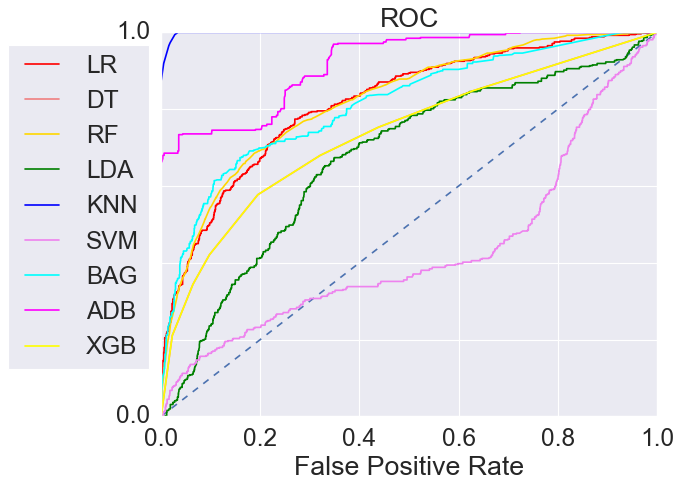

In [1934]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_tun_train_fpr, lr_tun_train_tpr,color='red',label="LR")
plt.plot(dt_tun_train_fpr, dt_tun_train_tpr,color='lightcoral',label="DT")
plt.plot(rf_tun_train_fpr, rf_tun_train_tpr,color='gold',label="RF")
plt.plot(lda_tun_train_fpr,lda_tun_train_tpr,color='green',label="LDA")
plt.plot(knn_tun_train_fpr,knn_tun_train_tpr,color='blue',label="KNN")
plt.plot(svm_tun_train_fpr,svm_tun_train_tpr,color='violet',label="SVM")
plt.plot(bag_tun_train_fpr,bag_tun_train_tpr,color='cyan',label="BAG")
plt.plot(adb_tun_train_fpr,adb_tun_train_tpr,color='magenta',label="ADB")
plt.plot(xgb_tun_train_fpr,xgb_tun_train_tpr,color='yellow',label="XGB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.), loc='best')

### ROC Curve for all the tuned models on the Test data

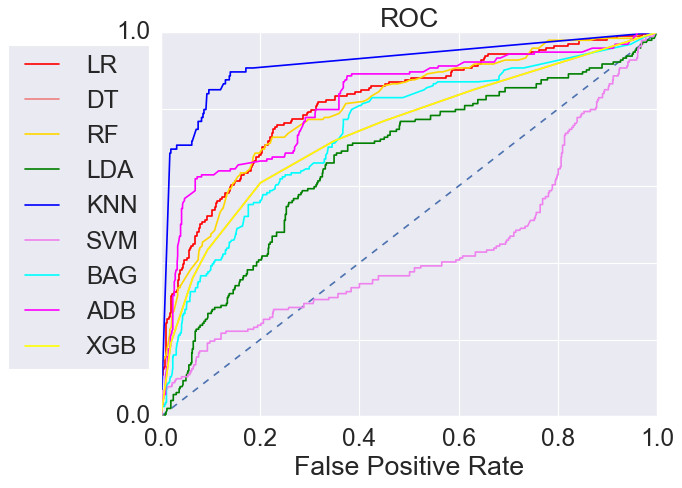

In [1935]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_tun_test_fpr, lr_tun_test_tpr,color='red',label="LR")
plt.plot(dt_tun_test_fpr, dt_tun_test_tpr,color='lightcoral',label="DT")
plt.plot(rf_tun_test_fpr, rf_tun_test_tpr,color='gold',label="RF")
plt.plot(lda_tun_test_fpr,lda_tun_test_tpr,color='green',label="LDA")
plt.plot(knn_tun_test_fpr,knn_tun_test_tpr,color='blue',label="KNN")
plt.plot(svm_tun_test_fpr,svm_tun_test_tpr,color='violet',label="SVM")
plt.plot(bag_tun_test_fpr,bag_tun_test_tpr,color='cyan',label="BAG")
plt.plot(adb_tun_test_fpr,adb_tun_test_tpr,color='magenta',label="ADB")
plt.plot(xgb_tun_test_fpr,xgb_tun_test_tpr,color='yellow',label="XGB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.), loc='best')

### Comparisson between Basic and Tuned Models

In [1936]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
        'LR Tuned Train':[lr_tuned_train_acc,lr_tun_train_auc,lr_tuned_train_recall,lr_tuned_train_precision,lr_tuned_train_f1],
        'LR Tuned Test':[lr_tuned_test_acc,lr_tun_test_auc,lr_tuned_test_recall,lr_tuned_test_precision,lr_tuned_test_f1],
        'DT Train':[dt_train_acc,dt_train_auc,dt_train_recall,dt_train_precision,dt_train_f1],
        'DT Test':[dt_test_acc,dt_test_auc,dt_test_recall,dt_test_precision,dt_test_f1],
        'DT Tuned Train':[dt_tuned_train_acc,dt_tun_train_auc,dt_tuned_train_recall,dt_tuned_train_precision,dt_tuned_train_f1],
        'DT Tuned Test':[dt_tuned_test_acc,dt_tun_test_auc,dt_tuned_test_recall,dt_tuned_test_precision,dt_tuned_test_f1],
        'RF Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'RF Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
        'RF Tuned Train':[rf_tun_train_acc,rf_tun_train_auc,rf_tun_train_recall,rf_tun_train_precision,rf_tun_train_f1],
        'RF Tuned Test':[rf_tun_test_acc,rf_tun_test_auc,rf_tun_test_recall,rf_tun_test_precision,rf_tun_test_f1],
        'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
        'LDA Tuned Train':[lda_tuned_train_acc,lda_tun_train_auc,lda_tuned_train_recall,lda_tuned_train_precision,lda_tuned_train_f1],
        'LDA Tuned Test':[lda_tuned_test_acc,lda_tun_test_auc,lda_tuned_test_recall,lda_tuned_test_precision,lda_tuned_test_f1],
       'KNN Train':[knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
        'KNN Tuned Train':[knn_tun_train_acc,knn_tun_train_auc,knn_tun_train_recall,knn_tun_train_precision,knn_tun_train_f1],
        'KNN Tuned Test':[knn_tun_test_acc,knn_tun_test_auc,knn_tun_test_recall,knn_tun_test_precision,knn_tun_test_f1],
        'NB Train':[nb_train_acc,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
        'NB Test':[nb_test_acc,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],
        'SVM Train':[svm_train_acc,svm_train_auc,svm_train_recall,svm_train_precision,svm_train_f1],
        'SVM Test':[svm_test_acc,svm_test_auc,svm_test_recall,svm_test_precision,svm_test_f1],
        'ANN Tuned Train':[ann_tun_train_acc,ann_tun_train_auc,ann_tun_train_recall,ann_tun_train_precision,ann_tun_train_f1],
        'ANN Tuned Test':[ann_tun_test_acc,ann_tun_test_auc,ann_tun_test_recall,ann_tun_test_precision,ann_tun_test_f1],
        'Bag Train':[bag_train_acc,bag_train_auc,bag_train_recall,bag_train_precision,bag_train_f1],
        'Bag Test':[bag_test_acc,bag_test_auc,bag_test_recall,bag_test_precision,bag_test_f1],
        'Bag Tuned Train':[bag_tun_train_acc,bag_tun_train_auc,bag_tun_train_recall,bag_tun_train_precision,bag_tun_train_f1],
        'Bag Tuned Test':[bag_tun_test_acc,bag_tun_test_auc,bag_tun_test_recall,bag_tun_test_precision,bag_tun_test_f1],
        'ADB Train':[adb_train_acc,adb_train_auc,adb_train_recall,adb_train_precision,adb_train_f1],
        'ADB Test':[adb_test_acc,adb_test_auc,adb_test_recall,adb_test_precision,adb_test_f1],
        'ADB Tuned Train':[adb_tun_train_acc,adb_tun_train_auc,adb_tun_train_recall,adb_tun_train_precision,adb_tun_train_f1],
        'ADB Tuned Test':[adb_tun_test_acc,adb_tun_test_auc,adb_tun_test_recall,adb_tun_test_precision,adb_tun_test_f1],
        'XGB Train':[xgb_train_acc,xgb_train_auc,xgb_train_recall,xgb_train_precision,xgb_train_f1],
        'XGB Test':[xgb_test_acc,xgb_test_auc,xgb_test_recall,xgb_test_precision,xgb_test_f1],
        'XGB Tuned Train':[xgb_tun_train_acc,xgb_tun_train_auc,xgb_tun_train_recall,xgb_tun_train_precision,xgb_tun_train_f1],
        'XGB Tuned Test':[xgb_tun_test_acc,xgb_tun_test_auc,xgb_tun_test_recall,xgb_tun_test_precision,xgb_tun_test_f1]},index=index
       )
round(data,2)

LR Train  LR Test  LR Tuned Train  LR Tuned Test  DT Train  \
Accuracy       0.85     0.87            0.85           0.87       1.0   
AUC            0.82     0.82            0.82           0.82       1.0   
Recall         0.32     0.32            0.32           0.32       1.0   
Precision      0.69     0.70            0.71           0.70       1.0   
F1 Score       0.44     0.44            0.44           0.44       1.0   

           DT Test  DT Tuned Train  DT Tuned Test  RF Train  RF Test  ...  \
Accuracy      0.93            0.84           0.85       1.0     0.94  ...   
AUC           0.87            0.73           0.74       1.0     0.98  ...   
Recall        0.78            0.21           0.19       1.0     0.66  ...   
Precision     0.77            0.68           0.65       1.0     0.91  ...   
F1 Score      0.77            0.32           0.29       1.0     0.77  ...   

           Bag Tuned Train  Bag Tuned Test  ADB Train  ADB Test  \
Accuracy              0.85            0.84       0.86      0.87   
AUC                   0.81            0.74       0.84      0.82   
Recall                0.21            0.16       0.36      0.35   
Precision             0.80            0.51       0.71      0.65   
F1 Score              0.34            0.25       0.47      0.46   

           ADB Tuned Train  ADB Tuned Test  XGB Train  XGB Test  \
Accuracy              0.71            0.67       0.99      0.94   
AUC                   0.92            0.82       1.00      0.96   
Recall                0.93            0.84       0.96      0.74   
Precision             0.38            0.31       1.00      0.89   
F1 Score              0.54            0.45       0.98      0.81   

           XGB Tuned Train  XGB Tuned Test  
Accuracy              0.84            0.85  
AUC                   0.73            0.74  
Recall                0.21            0.19  
Precision             0.68            0.65  
F1 Score              0.32            0.29  

[5 rows x 38 columns]

In [1937]:
data.to_excel('model_comparisson.xlsx',index=False)

### Stacking model from the 3 best fitted model

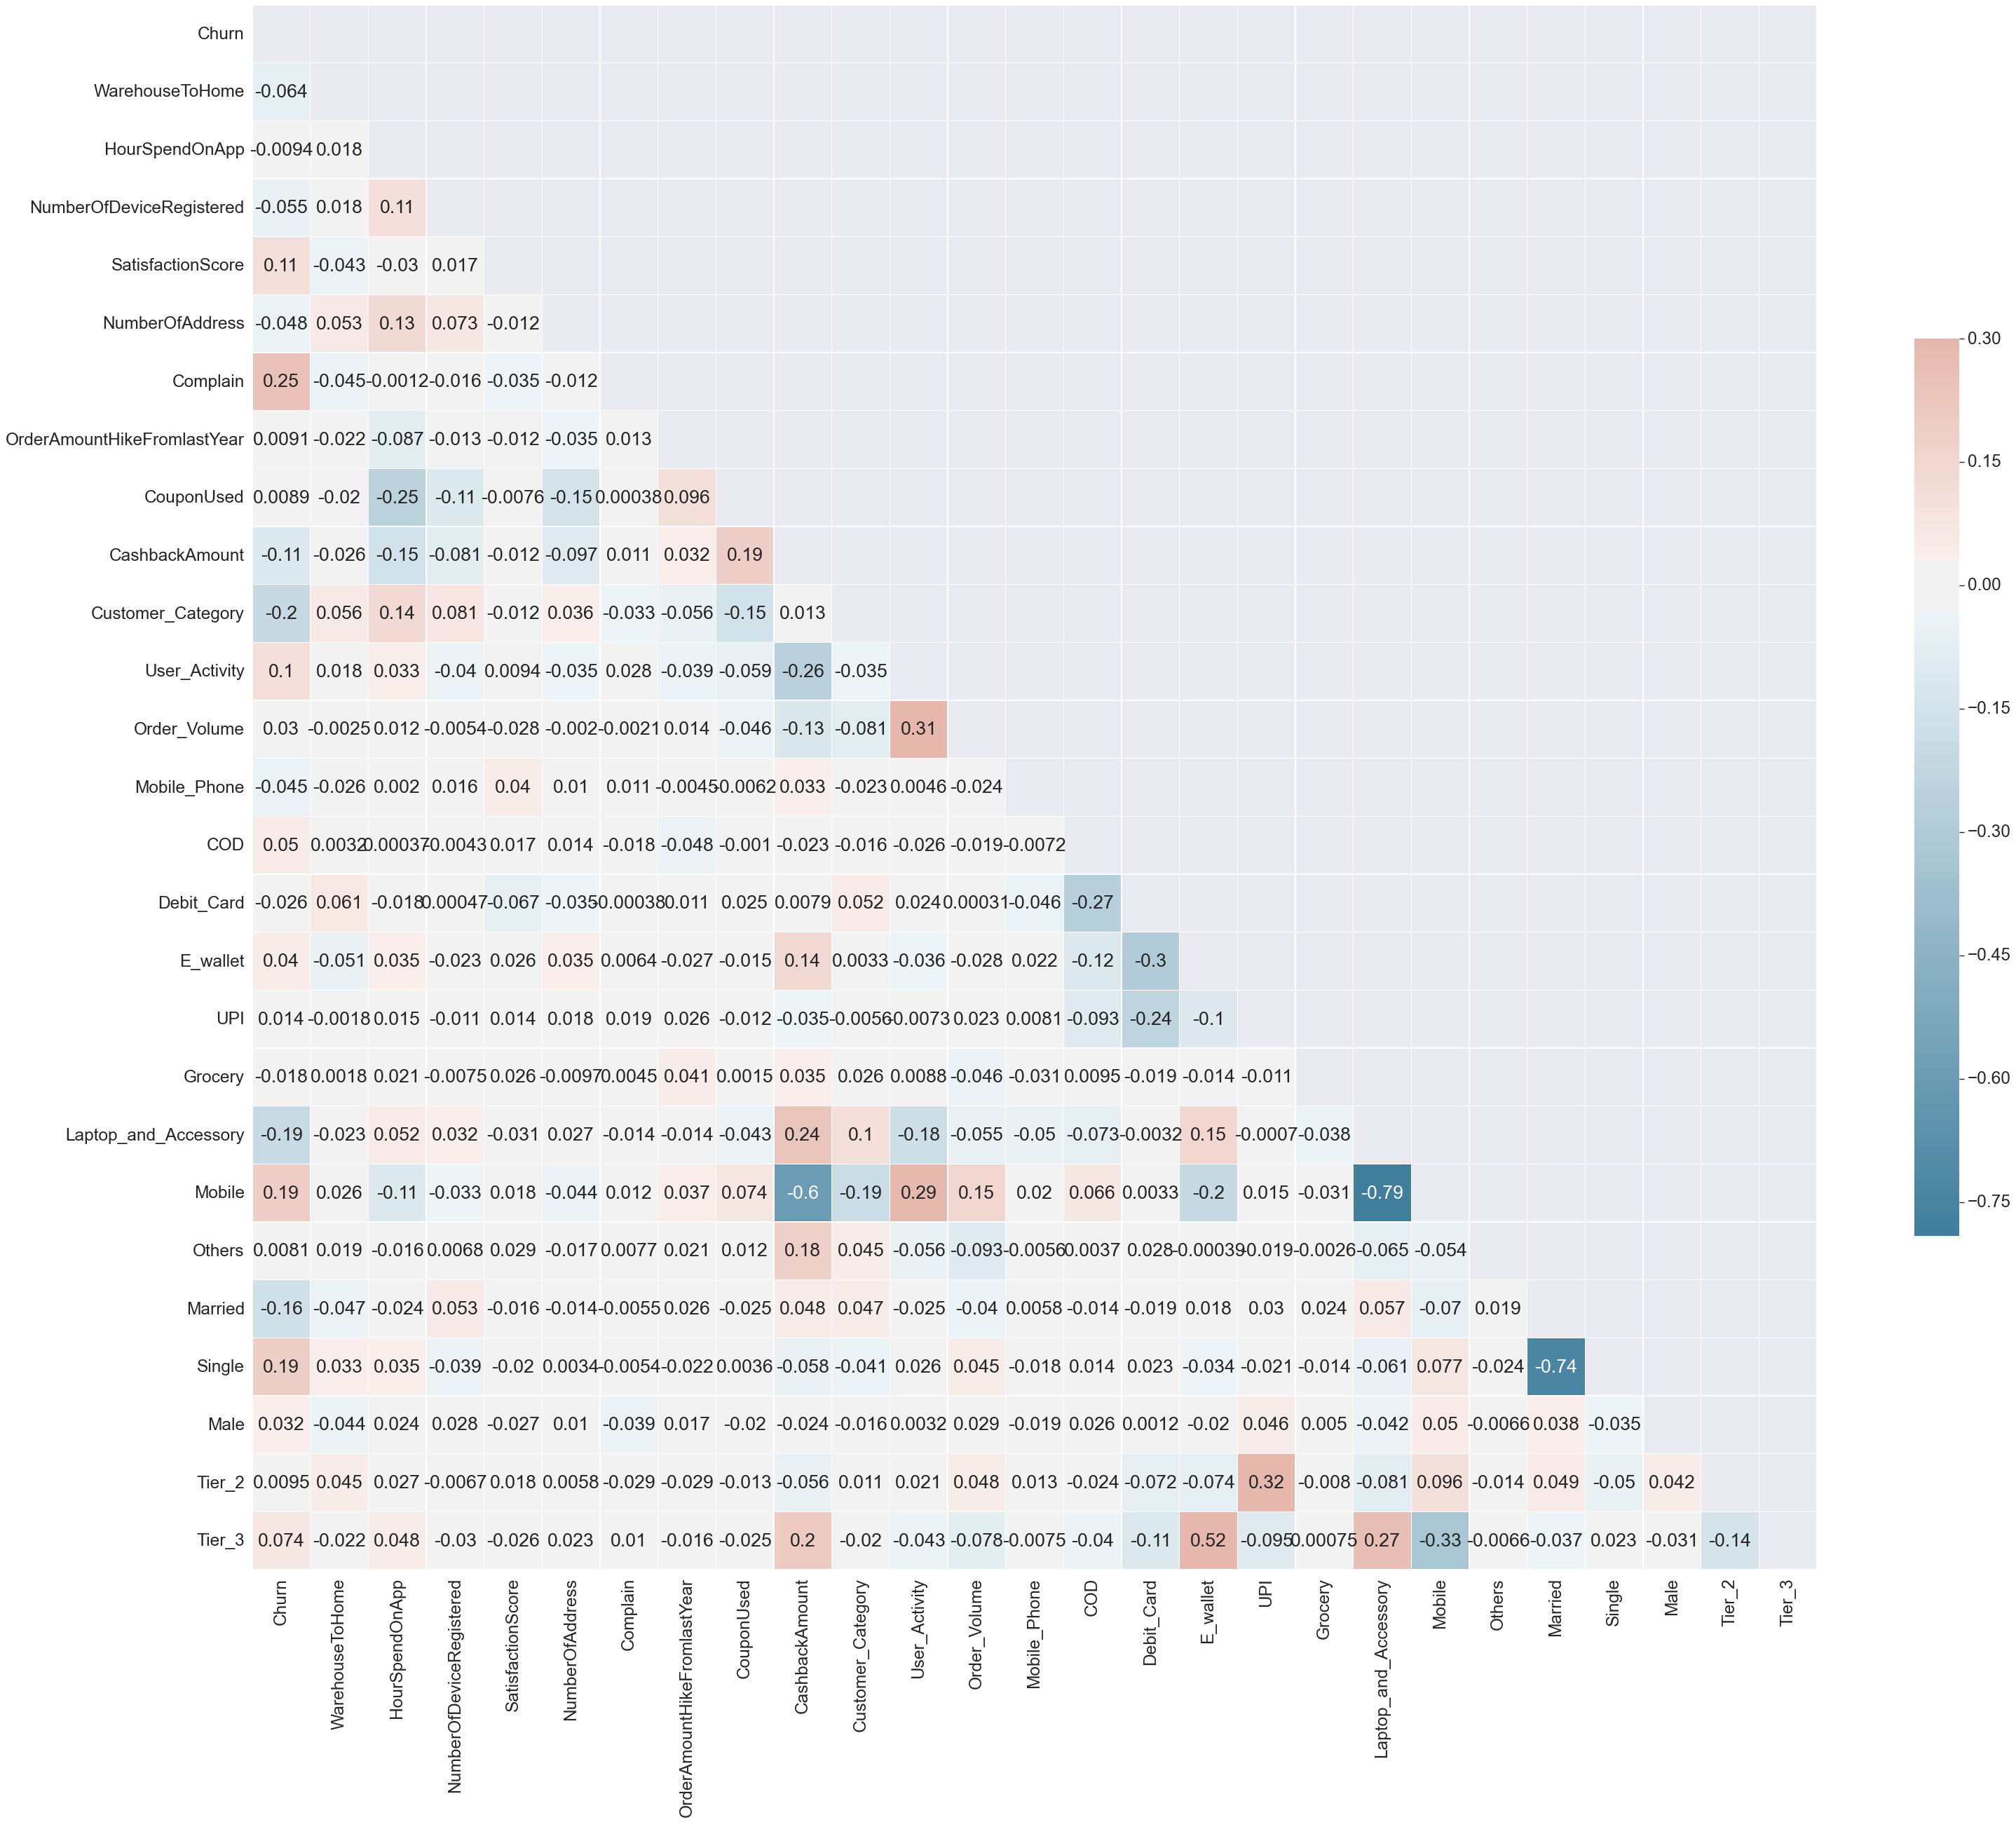

In [1695]:
# construct heatmap with only continuous variables
mask = np.triu(np.ones_like(churn.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(45,40))
sns.set(font_scale=2)
sns.heatmap(churn.corr(), annot=True,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Since the problem is to find the churned customers, the most mportant metric we should consider is recall for churn. Most of the basic and tuned models were highly overfitted with a huge difference between the train and test recall. I have chosen 3 models which I think were the most optimum without any over fitting and tried to build a stacking model from it.

1. SVM
2. ADB Tuned
3. Bagging Tuned

In [1957]:
X_train_fs = X_train[['Complain','Customer_Category','Mobile','Married','User_Activity','SatisfactionScore','CashbackAmount','Laptop_and_Accessory']]

X_test_fs = X_test[['Complain','Customer_Category','Mobile','Married','User_Activity','SatisfactionScore','CashbackAmount','Laptop_and_Accessory']]

In [1958]:
from sklearn.ensemble import StackingClassifier

In [1959]:
# define the base models
level0 = list()
level0.append(('svm', SVM_model))
level0.append(('abd', abcm_model_tun))
level0.append(('bag', bagging_model_tun))

In [1960]:
# define meta learner model
level1 = LogisticRegression()

In [1961]:
# define the stacking ensemble
stk_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)

In [1962]:
# fit the model on all available data
stk_model.fit(X_train_fs, y_train)

StackingClassifier(cv=10,
                   estimators=[('svm', SVC(probability=True, random_state=1)),
                               ('abd',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                                                         random_state=1),
                                                   learning_rate=2.5,
                                                   n_estimators=500,
                                                   random_state=1)),
                               ('bag',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,
                                                                                        max_leaf_nodes=35),
                                                  n_estimators=60,
                                                  oob_score=True,
                                                  random_

In [1963]:
## Performance Matrix on train data set
y_train_predict = stk_model.predict(X_train_fs)
model_score = stk_model.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8846017699115044
[[2279   28]
 [ 298  220]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2307
           1       0.89      0.42      0.57       518

    accuracy                           0.88      2825
   macro avg       0.89      0.71      0.75      2825
weighted avg       0.88      0.88      0.87      2825



In [1964]:
from sklearn.metrics import accuracy_score 
stk_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(stk_metrics).transpose()
df
stk_train_acc= accuracy_score(y_train, y_train_predict)
stk_train_precision=round(df.loc["1"][0],2)
stk_train_recall=round(df.loc["1"][1],2)
stk_train_f1=round(df.loc["1"][2],2)
print ('stk_train_acc ',stk_train_acc)
print ('stk_train_precision ',stk_train_precision)
print ('stk_train_recall ',stk_train_recall)
print ('stk_train_f1 ',stk_train_f1)

stk_train_acc  0.8846017699115044
stk_train_precision  0.89
stk_train_recall  0.42
stk_train_f1  0.57


AUC: 0.959


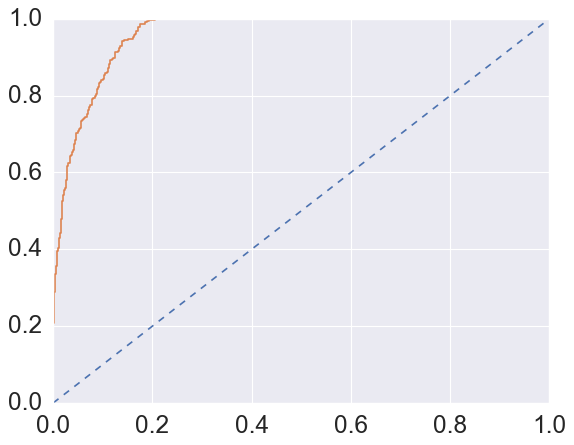

In [1965]:
#AUC and ROC for the training data
# predict probabilities
probs = stk_model.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
stk_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % stk_train_auc)
# calculate roc curve
stk_train_fpr, stk_train_tpr, stk_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(stk_train_fpr, stk_train_tpr)

In [1966]:
## Performance Matrix on test data set
y_test_predict = stk_model.predict(X_test_fs)
model_score = stk_model.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8844884488448845
[[998  20]
 [120  74]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1018
           1       0.79      0.38      0.51       194

    accuracy                           0.88      1212
   macro avg       0.84      0.68      0.72      1212
weighted avg       0.88      0.88      0.87      1212



In [1967]:
from sklearn.metrics import accuracy_score 
stk_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(stk_metrics).transpose()
df
stk_test_acc= accuracy_score(y_test, y_test_predict)
stk_test_precision=round(df.loc["1"][0],2)
stk_test_recall=round(df.loc["1"][1],2)
stk_test_f1=round(df.loc["1"][2],2)
print ('stk_test_acc ',stk_test_acc)
print ('stk_test_precision ',stk_test_precision)
print ('stk_test_recall ',stk_test_recall)
print ('stk_test_f1 ',stk_test_f1)

stk_test_acc  0.8844884488448845
stk_test_precision  0.79
stk_test_recall  0.38
stk_test_f1  0.51


AUC: 0.900


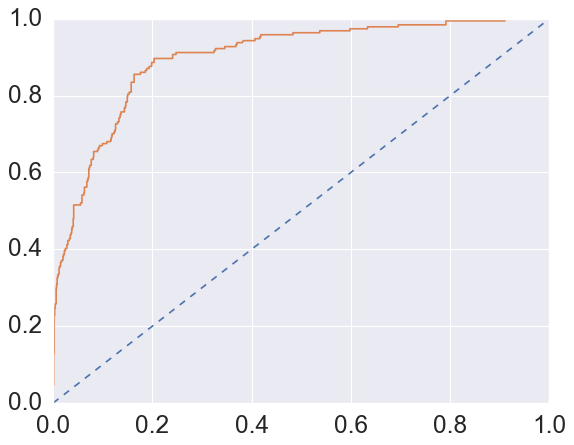

In [1968]:
# AUC and ROC for the test data
# predict probabilities
probs = stk_model.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
stk_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % stk_test_auc)
# calculate roc curve
stk_test_fpr, stk_test_tpr, stk_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(stk_test_fpr, stk_test_tpr)

In [1969]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Stacking Train':[stk_train_acc,stk_train_auc,stk_train_recall,stk_train_precision,stk_train_f1],
        'Stacking Test':[stk_test_acc,stk_test_auc,stk_test_recall,stk_test_precision,stk_test_f1]},index=index
       )
round(data,2)

Stacking Train  Stacking Test
Accuracy             0.88           0.88
AUC                  0.96           0.90
Recall               0.42           0.38
Precision            0.89           0.79
F1 Score             0.57           0.51

##### Conclusion

The objective of this model building activity was to correctly identify the customers who are going to churn. This makes recall for 1 as the main metric and on that basis I think the only model which has performed well on both training and test set is Adaptive Boosting model with 93% recall on Train set and 83% recall on Test set. Accuracy for Train set was 71% and 67% on Test set.

### Cross Validation

In [2019]:
from sklearn.model_selection import cross_val_score

In [2020]:
XGB_accuracies = cross_val_score(estimator = abcm_model_tun, X = X_train_fs, y = y_train, cv = 10)

In [2021]:
print("Mean_XGB_Acc : ", XGB_accuracies.mean())

Mean_XGB_Acc :  0.8149011352529885
